# Set-up the system

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Project_DIQ

/content/gdrive/.shortcut-targets-by-id/1D1_oIgnKlWffC18mAJXdv8o1jxX-DjlU/Project_DIQ


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/Project_DIQ/script')

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import dirty_accuracy as da

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 11.7,8.27 # figure size in inches

seed = 42
lb = LabelEncoder()

In [ ]:
#z-score

def ZS(data, threshold):
    mean = np.mean(data)
    sd = np.std(data) # calculate standard deviation
    outliers = [] # create empty list to store outliers
    outliersIndexes = []
    j = 0
    for i in data: # detect outliers
        z = (i - mean) / sd  # calculate z-score
        if abs(z) > threshold:  # identify outliers
            outliers.append(i)  # add to the empty list
            outliersIndexes.append(j)
        j += 1

    # print outliers
    print("The detected outliers are: ", str(outliers))
    return outliersIndexes

# Adult



## Import dataset



In [ ]:
adults = pd.read_csv('/content/gdrive/My Drive/Project_DIQ/datasets/adult.csv')

In [ ]:
# store dirty dataset 

if not(os.path.exists('/content/gdrive/My Drive/Project_DIQ/datasets/adult_accuracy_50.csv')) :
  %cd /content/gdrive/My Drive/Project_DIQ/datasets
  dirty_adults = []
  dirty_adults = da.injection(df_pandas=adults, seed=seed, name="adult", name_class="income")
  pd.DataFrame(dirty_adults[0]).to_csv("adult_accuracy_50.csv", index=False)
  pd.DataFrame(dirty_adults[1]).to_csv("adult_accuracy_60.csv", index=False)
  pd.DataFrame(dirty_adults[2]).to_csv("adult_accuracy_70.csv", index=False)
  pd.DataFrame(dirty_adults[3]).to_csv("adult_accuracy_80.csv", index=False)
  pd.DataFrame(dirty_adults[4]).to_csv("adult_accuracy_90.csv", index=False)
  %cd /content/gdrive/My Drive/Project_DIQ

# retrieve dirty datasets

dirty_adults = [None] * 5
dirty_adults[0] = pd.read_csv('/content/gdrive/My Drive/Project_DIQ/datasets/adult_accuracy_50.csv')
dirty_adults[1] = pd.read_csv('/content/gdrive/My Drive/Project_DIQ/datasets/adult_accuracy_60.csv')
dirty_adults[2] = pd.read_csv('/content/gdrive/My Drive/Project_DIQ/datasets/adult_accuracy_70.csv')
dirty_adults[3] = pd.read_csv('/content/gdrive/My Drive/Project_DIQ/datasets/adult_accuracy_80.csv')
dirty_adults[4] = pd.read_csv('/content/gdrive/My Drive/Project_DIQ/datasets/adult_accuracy_90.csv')

In [ ]:
# transform strings in int for ML

def adultsNoString(X):
  X = X.copy()
  X['workclass'] = lb.fit_transform(X['workclass'])
  X['education'] = lb.fit_transform(X['education'])
  X['maritial-status'] = lb.fit_transform(X['maritial-status'])
  X['occupation'] = lb.fit_transform(X['occupation'])
  X['relationship'] = lb.fit_transform(X['relationship'])
  X['race'] = lb.fit_transform(X['race'])
  X['sex'] = lb.fit_transform(X['sex'])
  X['native-country'] = lb.fit_transform(X['native-country'])
  X['income'] = lb.fit_transform(X['income'])
  
  return X

In [ ]:
# split in data and labels

def adultsSplitML(X):
  X = adultsNoString(X)
  y = X['income']
  X = X.drop('income', axis = 1)

  return X,y

In [ ]:
# testset from clear dataset
X_test, y_test = adultsSplitML(adults)

## Accuracy 50%

### ML algorithm before outlier detection

In [ ]:
X_train, y_train = adultsSplitML(dirty_adults[0])

In [ ]:
# evaluate with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.7487570434206166
Recall   : 0.001321003963011889
Precision: 0.3333333333333333
F1 score : 0.002631578947368421


In [ ]:
# evaluate with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.8147166058999006
Recall   : 0.5812417437252312
Precision: 0.6451612903225806
F1 score : 0.6115357887421821




### Z-Score



In [ ]:
currentDirtyAdultsZS = dirty_adults[0].copy()

Age

In [ ]:
data = currentDirtyAdultsZS['age'].values

outlier_index = ZS(data,0.12)
currentDirtyAdultsZS['age'].iloc[outlier_index] = np.NaN

The detected outliers are:  [344.9140624530849, -492.4383965029798, -444.6993952280889, 648.3515460488172, -532.5880887032868, 665.9908683676321, 308.7544494164302, -684.0028636465128, -337.6452235802634, 304.5901207335892, -356.6074965483624, 794.9768821659542, 690.0029958679831, -149.07014105300436, 453.9983025929637, 700.546753078637, -7.852208422795343, -370.58058837894544, -652.9845075851102, -690.6360457012431, 457.4157156827636, 159.36622607082262, 240.92607959401815, -284.3222290190964, -45.8232446859754, -532.5996906443739, 355.10458470882304, 119.94465560457836, -591.4547889851897, 431.8603598176159, 245.21495192329985, 126.2374574513504, 539.3675137653793, 593.4605566305563, 711.5848082567162, -500.668816872868, 148.92514796636462, -673.6001474499593, 14.060688483390775, -173.83820008516045, 458.03252207506125, 507.93849796401, -149.51266159098418, -165.67287560342925, -279.44791450184965, 156.12131179177828, -21.102482659884004, -15.54212630063671, -353.93513794081457, 407.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


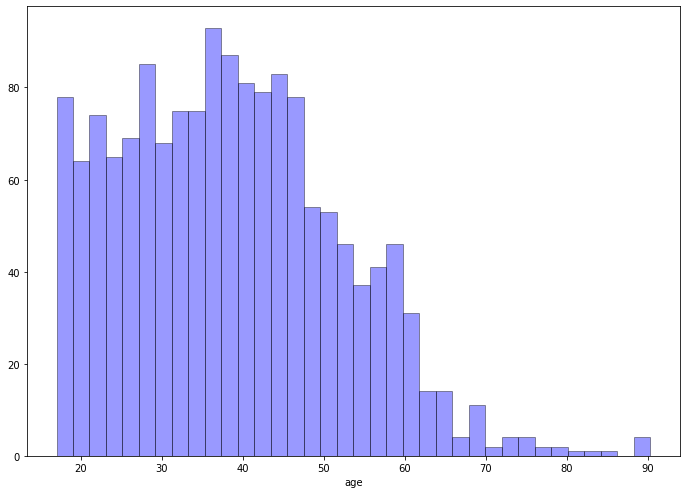

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


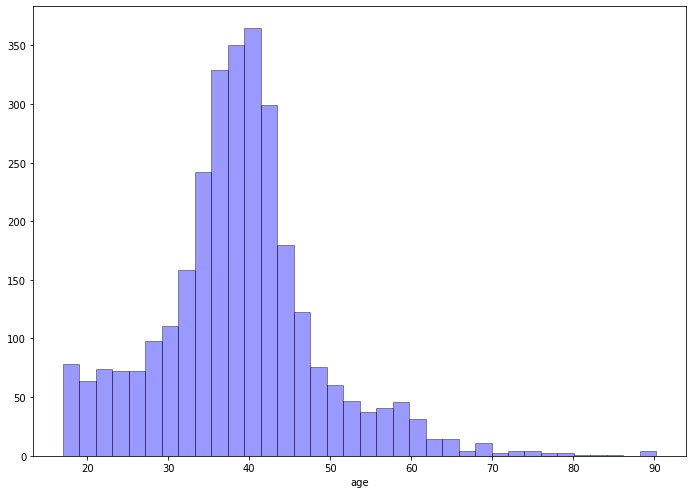

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Fnlwgt

In [ ]:
data = currentDirtyAdultsZS['fnlwgt'].values

outlier_index = ZS(data,0.095)
currentDirtyAdultsZS['fnlwgt'].iloc[outlier_index] = np.NaN

The detected outliers are:  [1939262.968450304, 1605347.7247173763, -5257050.728032894, -7588633.77232987, -8331020.657610977, 1959428.9591246173, 2997511.569974035, 2131420.303382628, 5792403.659498844, 1020090.1849467858, -4041120.668106712, 3205196.1371460124, 7170624.365075312, 3236596.062064592, 4079914.173905415, -990610.3752576428, -5410633.121929116, -5528467.818339359, -7998044.342044068, 7400420.135851072, -7880167.387865557, 6758174.215903696, -6295191.148851678, 3841069.7235767175, -3887017.553897353, 9135416.46280627, 8497271.283079311, -1978528.041284068, -9142189.9770259, 1731996.6307541302, 2136862.845226025, -4302596.609868353, -7866662.262811446, 1893178.275334012, -7123858.114386013, -4359784.06532358, 7433649.032222887, -2365896.8778750123, 5566210.367699013, -114673.91140566953, -5907148.505574735, -8558297.535541166, 2150232.7886663675, -9156756.5192387, -308239.27895131893, 5874779.857944141, -2795505.067284027, 9098989.372528773, 8729556.045465043, 2558878.54010

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


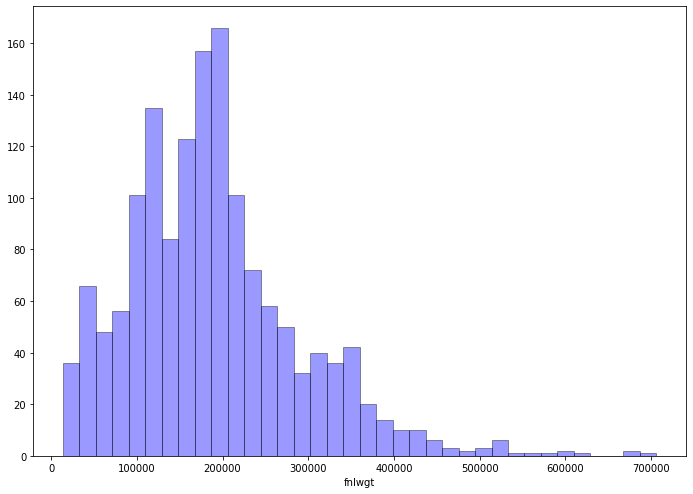

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


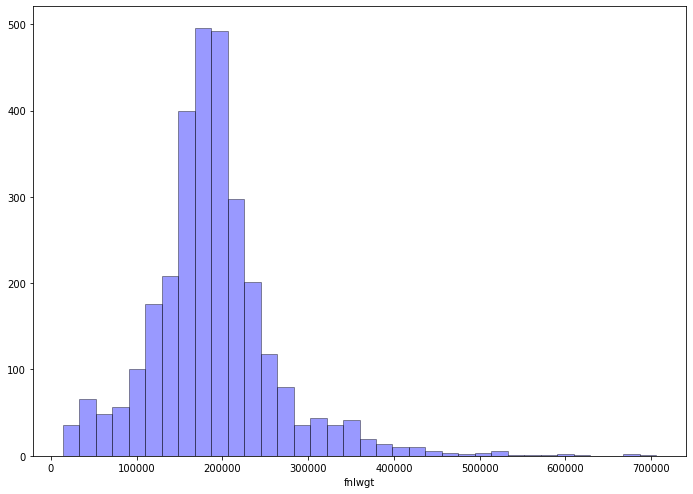

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Education-num

In [ ]:
data = currentDirtyAdultsZS['education-num'].values

outlier_index = ZS(data,0.12)
currentDirtyAdultsZS['education-num'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-97.75924470264168, -17.544903281685038, 101.74976150091608, -43.09690491482733, 134.05105861413864, 106.04828371644604, -45.74549138619267, -126.26921918208151, -35.00677289508741, 157.44776744999294, -125.55788244615124, 63.654561635255725, -132.90974297939164, -83.1526163048049, -64.46273237513431, 108.5465735531024, -116.02254377270609, -60.03277859332515, -88.8485922483387, 117.21929299370728, -40.36590116008037, -48.27401964546237, 115.74876945575448, 138.08154062779545, -112.10392778487278, -58.93899232115493, -57.352978751834, -52.34483594441879, -77.82766477746621, 114.45693691740526, 101.21382323216064, 95.90273397112146, 42.65272667359153, 79.02779670031563, 122.13507654439918, 31.57808648282236, -19.327332832345604, -141.41663705360256, -66.67759108649737, -145.78286744511456, 43.70793652342084, 117.95566684087238, 39.88664337745515, -142.19873039100935, 136.1605808177845, 91.01773131714523, 110.47012627280542, -68.1804155512416, -148.0835672993

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


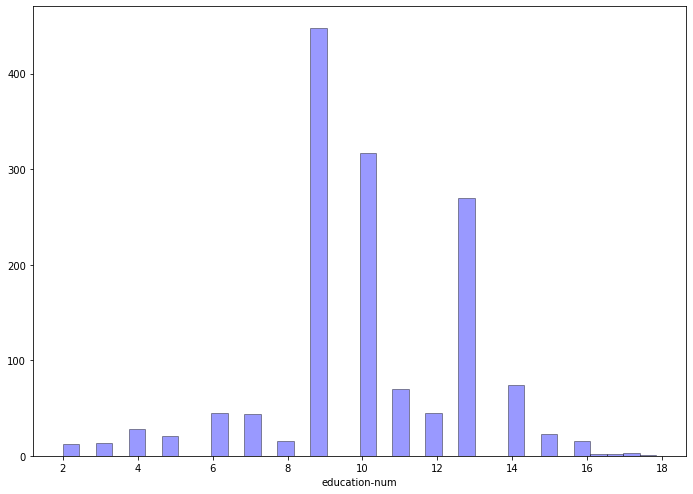

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


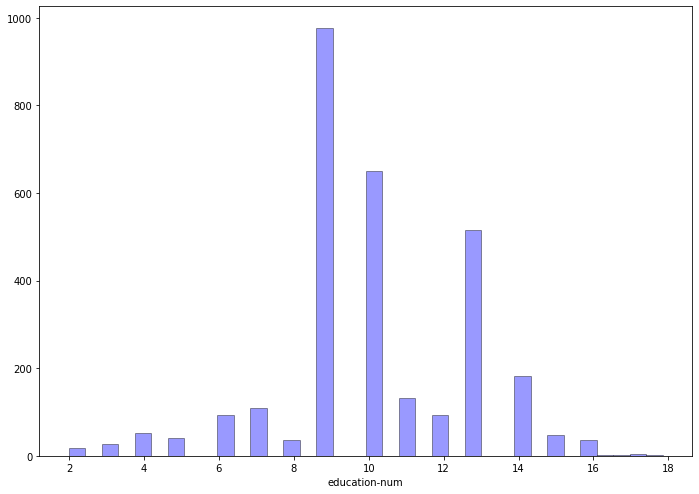

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

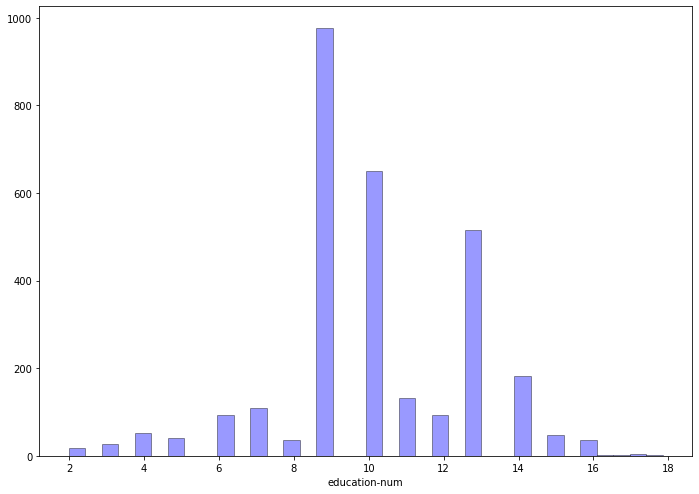

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-loss

In [ ]:
data = currentDirtyAdultsZS['capital-loss'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['capital-loss'].iloc[outlier_index] = np.NaN

The detected outliers are:  [24680.01712121567, -8719.072055998491, 14072.60121861427, -27307.04503127053, 18694.454577787496, 14856.851764080038, -25719.874247509964, -5962.709702621942, -1251.533487092387, 11920.942177594212, 29490.944175604625, -4187.658509009409, -19304.31962308876, -5210.956445608714, 6921.348018489569, -5433.060130863516, -4761.66719298351, 15257.757016233045, 26017.68228987144, 6410.3647722458745, 3209.807757927351, -1157.987826459048, -576.9387706586785, -5041.424767262583, 8434.66372592494, -26500.962322892705, -22766.73923554892, -9167.236069298891, -3844.223847497091, -14215.561047712295, 15437.987683924905, -7875.001900458879, 28813.49838707424, -6291.398422577211, -24230.24107427037, 23695.931297102878, -23253.35419187828, 11598.396277588545, 15682.85177748896, 30230.298596635806, 21497.414530188456, 26720.71377133988, 5246.595055085737, -20323.86727121755, -8328.40732938032, 3983.771479970944, -17978.73232791949, 26395.21193092487, -5797.1975178295, 27075

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


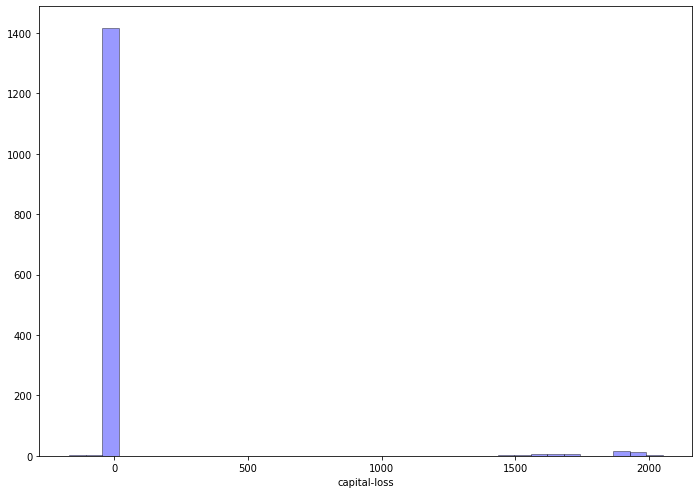

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-loss'] = currentDirtyAdultsZS['capital-loss'].mode()[0]

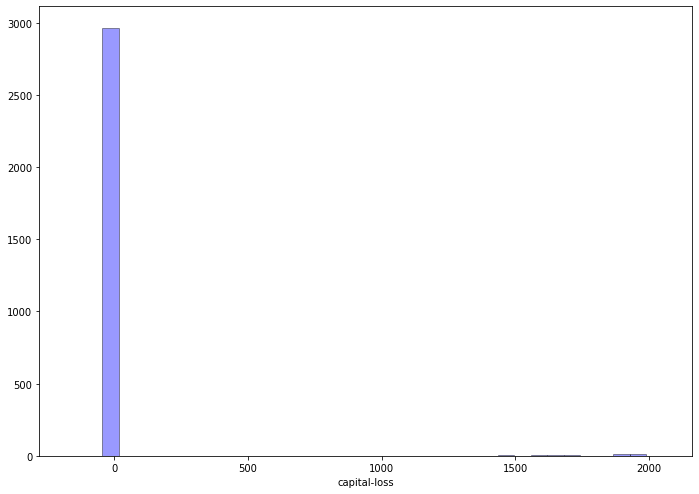

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-gain

In [ ]:
data = currentDirtyAdultsZS['capital-gain'].values

outlier_index = ZS(data,0.09)
currentDirtyAdultsZS['capital-gain'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-34391.22377768473, -926743.662768889, -423866.1758724315, 176911.1935753479, 871742.6695253388, -474804.7616455804, -341448.5700892351, 477721.46465445735, -678106.8153592394, 227893.4934121132, 140384.80545640748, -267208.4509822964, -831420.5257834413, -99468.40106146388, -569455.4398893539, 841191.8806780635, 168043.93835694098, -486027.8154628324, -521812.3007046121, -92092.48528518912, 199742.74054249923, 481741.94798383984, 380401.5789967415, 655146.4453268056, -418263.3124840151, -251239.7457909315, -27973.131664776243, -754621.1260055853, 508365.1961102077, 461508.7537623597, 904952.7816263796, -598629.2865194427, -97346.84795433842, -157560.05094203283, -988330.3402209106, -389237.2690589808, -536238.7306652236, 594326.9695352232, -543965.431902538, 99999.0, -719110.4163829645, -40829.26084855408, -232785.55816036032, -182800.830562416, 551952.7917547198, -245765.0813633992, -107731.31023923728, 151113.26961535172, -709601.0276719378, -781472.5095

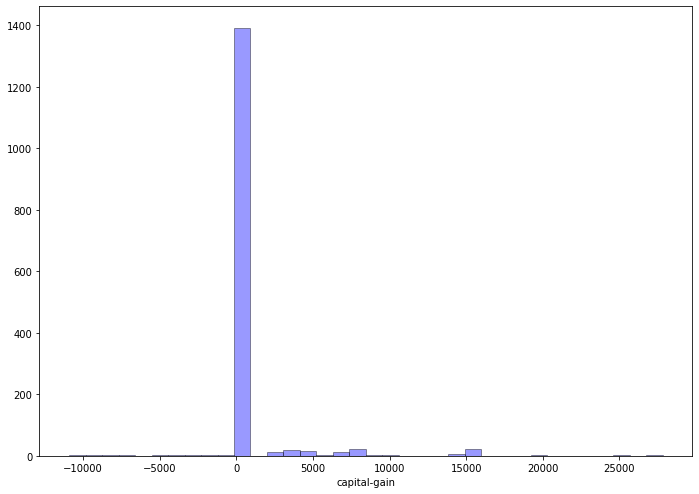

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-gain'] = currentDirtyAdultsZS['capital-gain'].mode()[0]

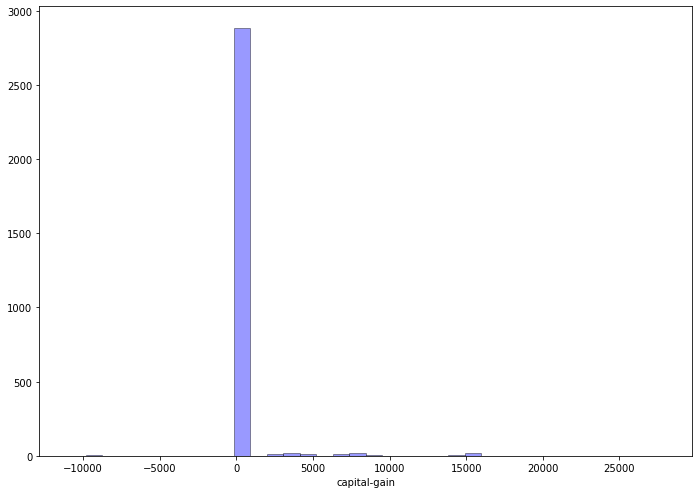

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Hours-per-week

In [ ]:
data = currentDirtyAdultsZS['hours-per-week'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['hours-per-week'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-684.6247874195521, 971.9986371304713, -259.5659697426478, -397.8919872715964, -358.41776609277906, 486.6290085277425, -827.2738065208698, 1006.21820219221, 827.8550163226203, 571.8888631745272, 831.2610864808518, -559.7923243301375, -191.43625257358485, 443.2209086341682, 409.9639273344896, 84.0, 894.1481939406013, 865.8308877853625, 891.0846336360249, -450.54038481338455, 201.68295543629853, -296.06570141067004, -403.02811400801966, -70.50723699358184, 901.5508559631472, -141.13324401561022, 619.756401793058, 885.7169038777416, 204.87283100948792, -733.0595315493404, 159.5724130311404, -607.1551568452552, 371.3505169837061, -595.9670751738938, 705.2821346326699, 753.6234061909742, 399.2396741091418, 404.9155197488751, -177.0629127747701, -291.32747980011175, 279.9203383856453, 619.8520435735616, 861.9119770208396, 927.7056538588548, 882.4424281653747, -841.9557604012132, -80.29283262350339, -646.8906106030706, 926.6114481230426, 509.72793405394447, -673.4

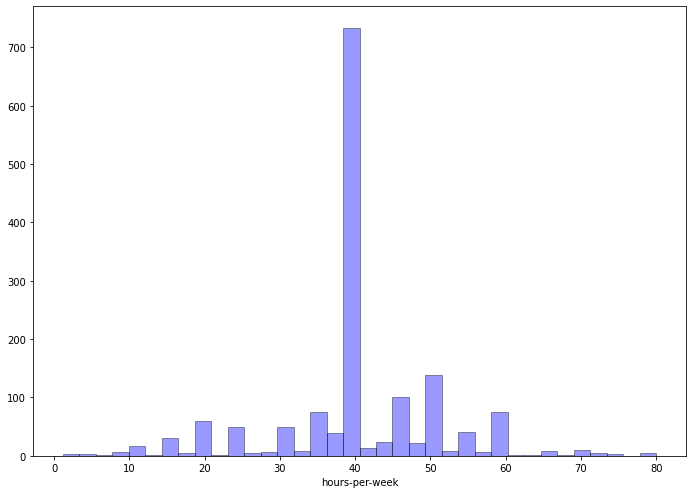

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


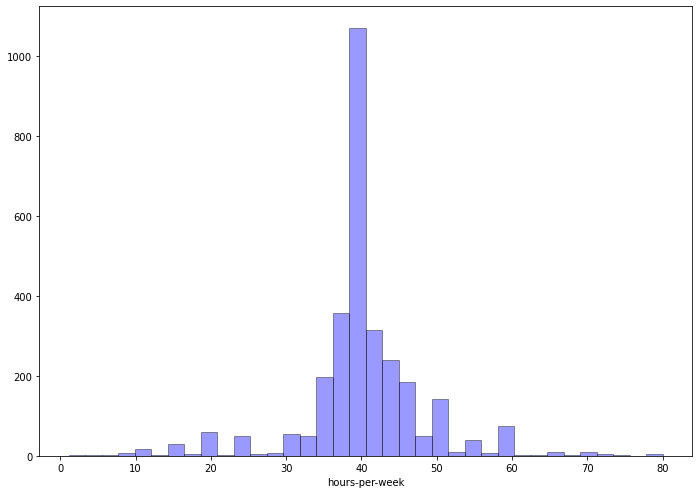

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})



### KNN



In [ ]:
# Dataset to clear

currentDirtyAdultsKNN = dirty_adults[0].copy()

Age

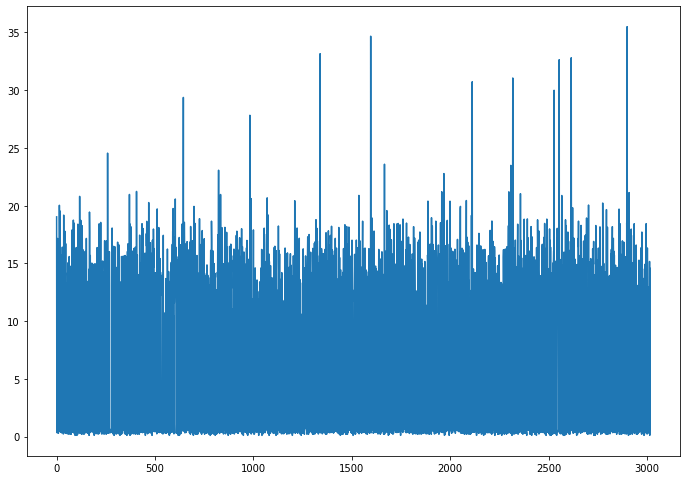

In [ ]:
Xval = currentDirtyAdultsKNN['age'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

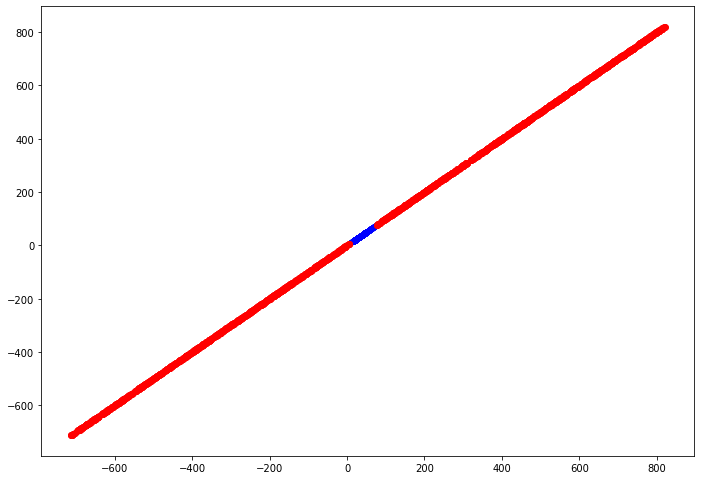

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 9)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["age"], outlier_values["age"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['age'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


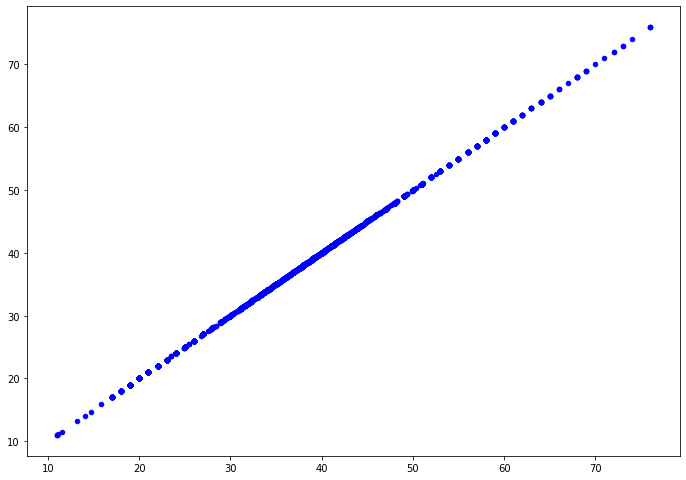

In [ ]:
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

Fnlwgt

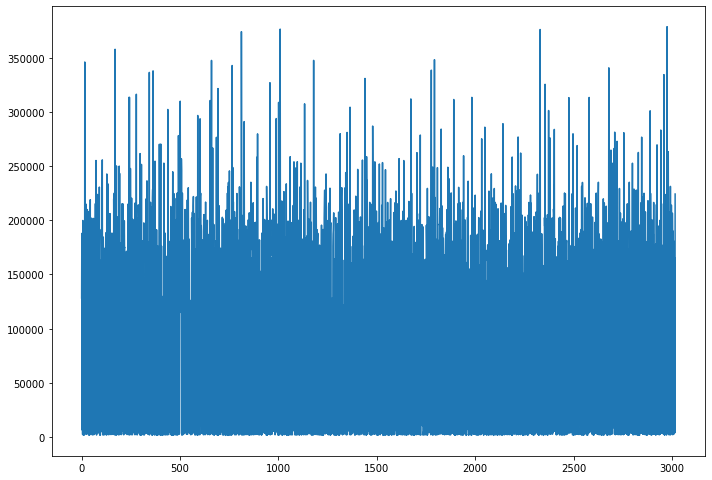

In [ ]:
Xval = currentDirtyAdultsKNN['fnlwgt'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

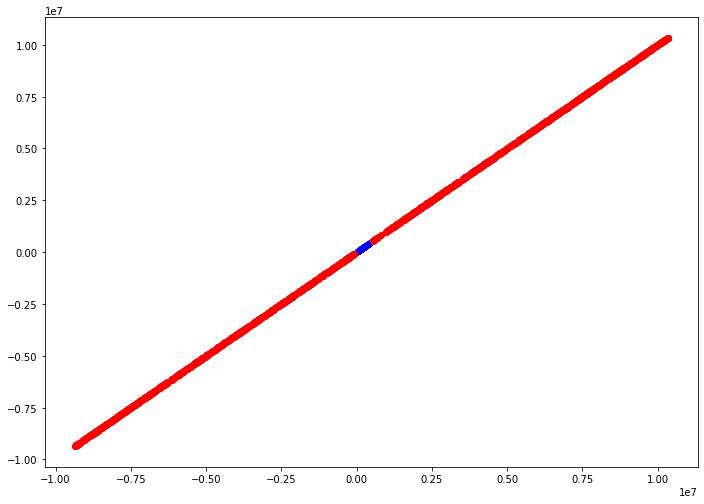

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 100000)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["fnlwgt"], outlier_values["fnlwgt"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['fnlwgt'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


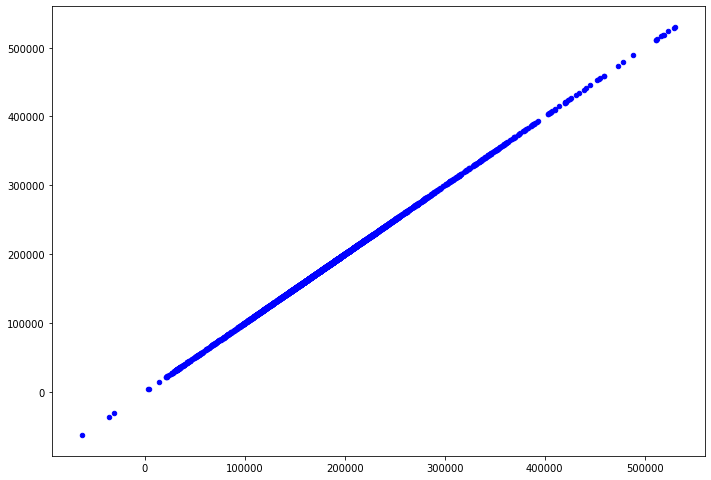

In [ ]:
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

Education-num

<ipython-input-357-3698d60971bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xval["education"] = lb.fit_transform(Xval['education'])


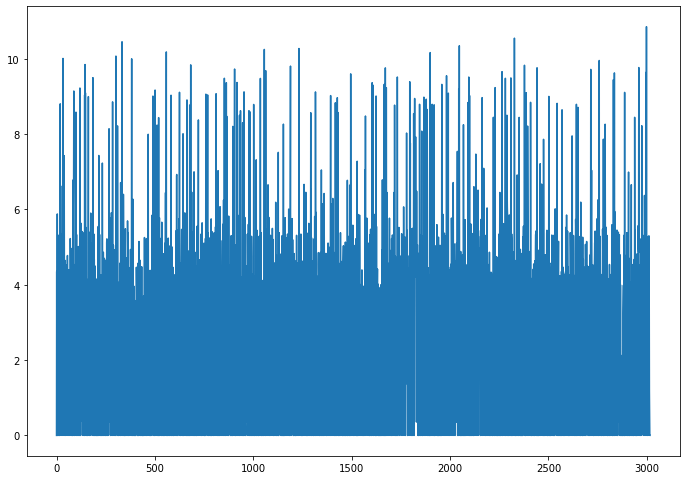

In [ ]:
Xval = currentDirtyAdultsKNN[['education-num', 'education']]
Xval["education"] = lb.fit_transform(Xval['education'])
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

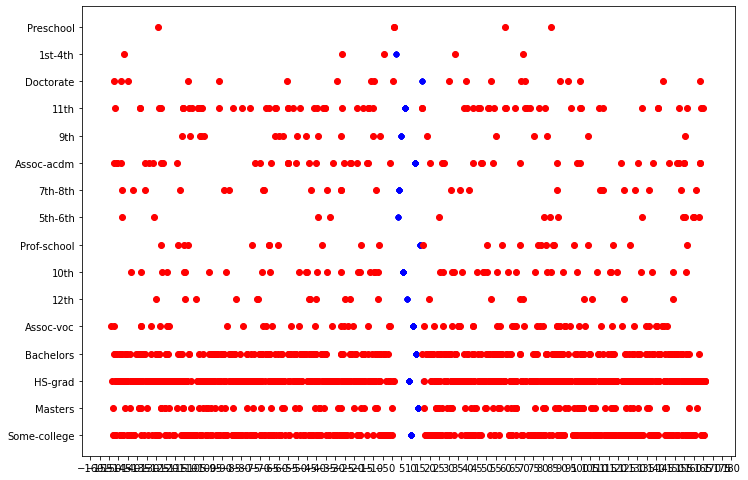

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 2.3)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# plot data
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["education-num"], outlier_values["education"], color = "r")

In [ ]:
# impute values for outliers
currentDirtyAdultsKNN['education-num'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


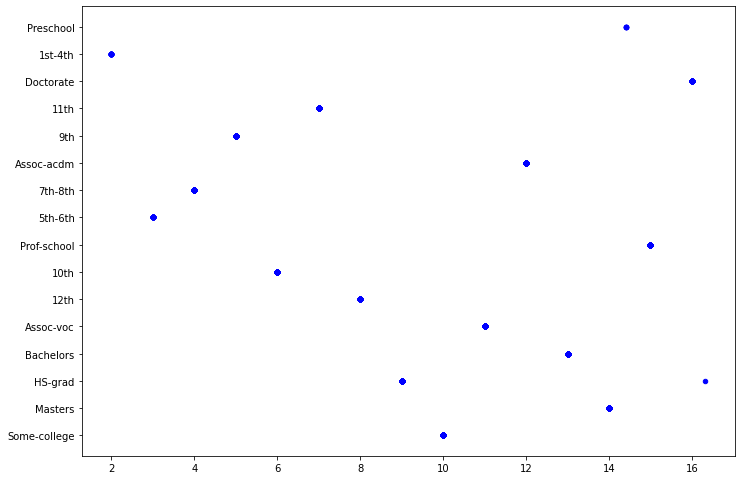

In [ ]:
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

Capital-loss

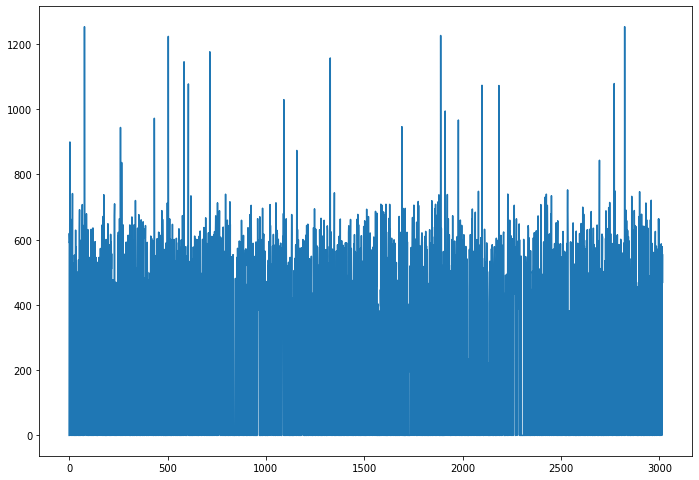

In [ ]:
Xval = currentDirtyAdultsKNN['capital-loss'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

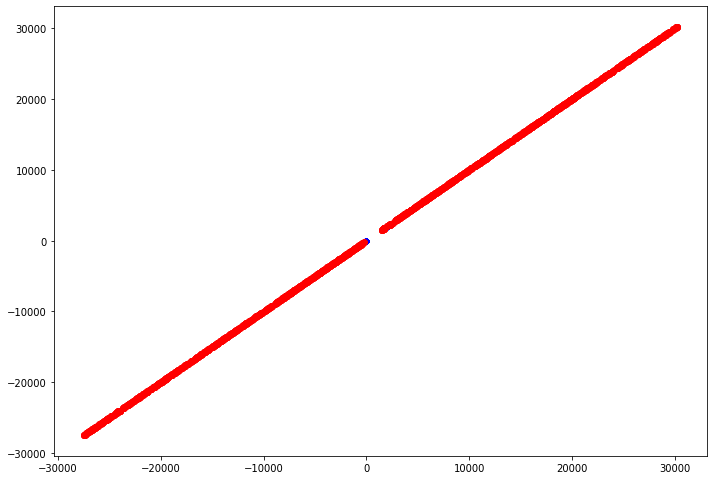

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 200)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-loss"], outlier_values["capital-loss"], color = "r")

In [ ]:
# imputation with the mode of the capital-losses

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-loss'] = currentDirtyAdultsKNN['capital-loss'].mode()[0]

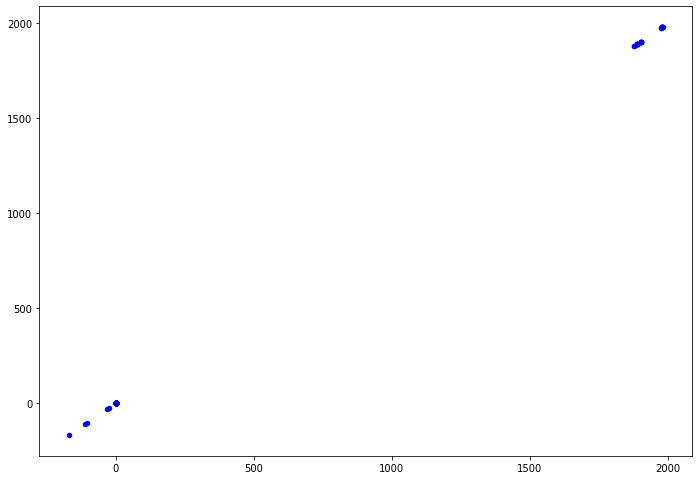

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

Capital-gain

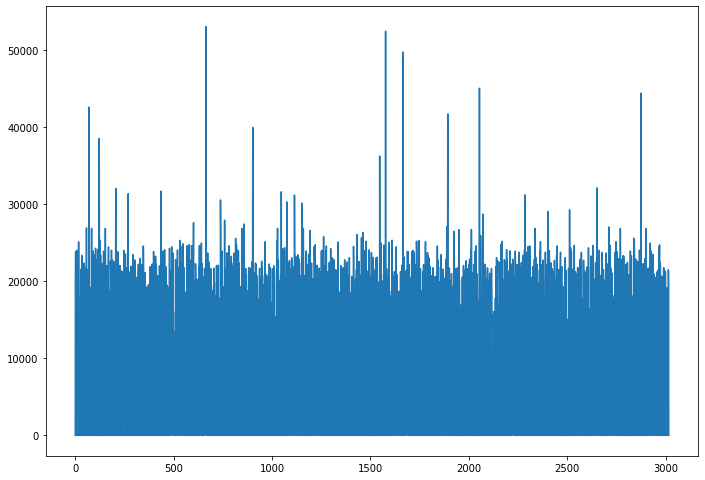

In [ ]:
Xval = currentDirtyAdultsKNN['capital-gain'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

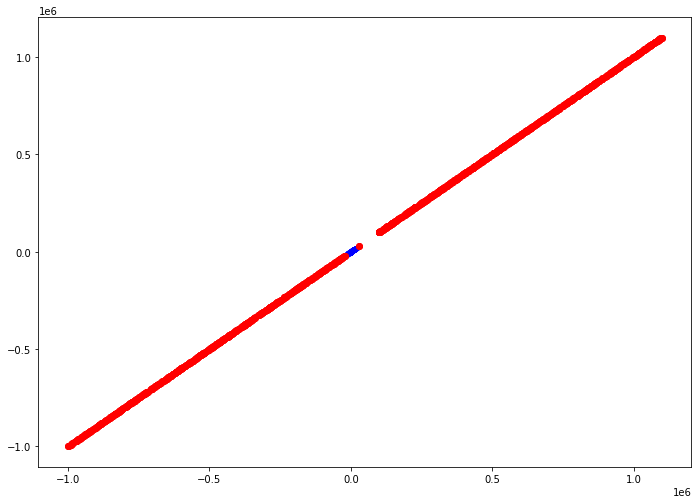

In [ ]:
#find the outliers 

outlier_index = np.where(distances.mean(axis = 1) > 13500)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-gain"], outlier_values["capital-gain"], color = "r")

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-gain'] = currentDirtyAdultsKNN['capital-gain'].mode()[0]

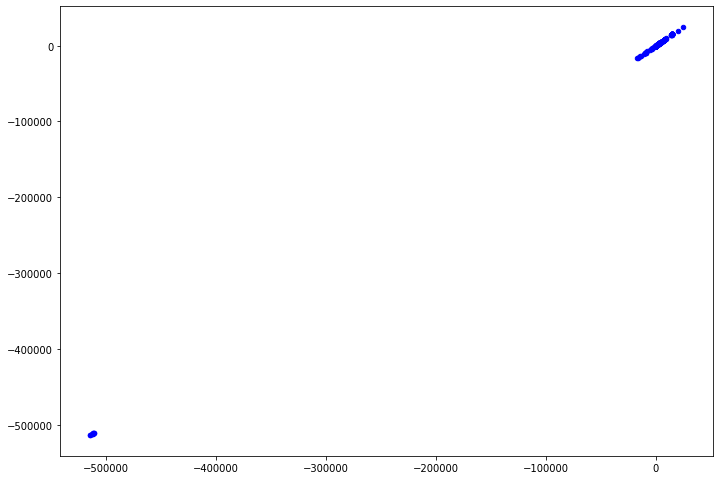

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

Hours-per-week

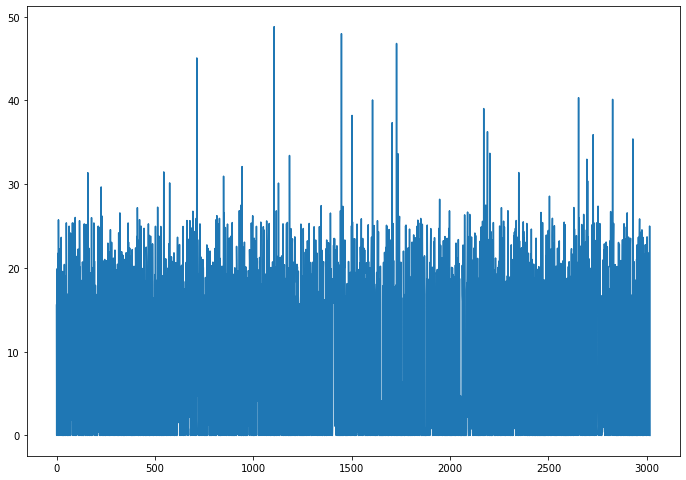

In [ ]:
Xval = currentDirtyAdultsKNN['hours-per-week'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

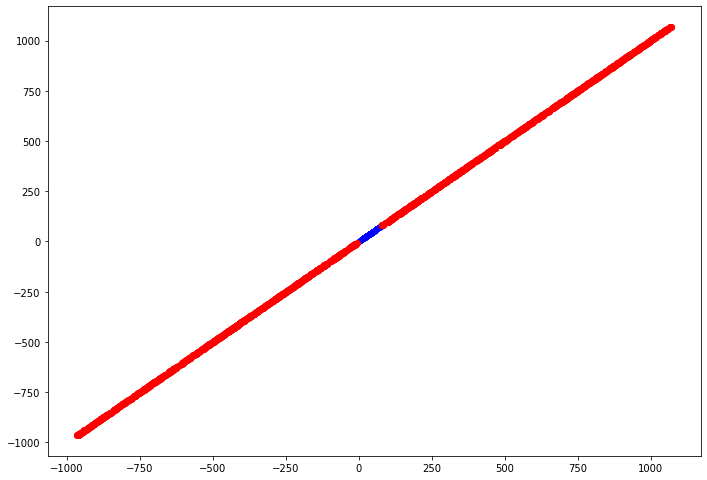

In [ ]:
#find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 12)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["hours-per-week"], outlier_values["hours-per-week"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['hours-per-week'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


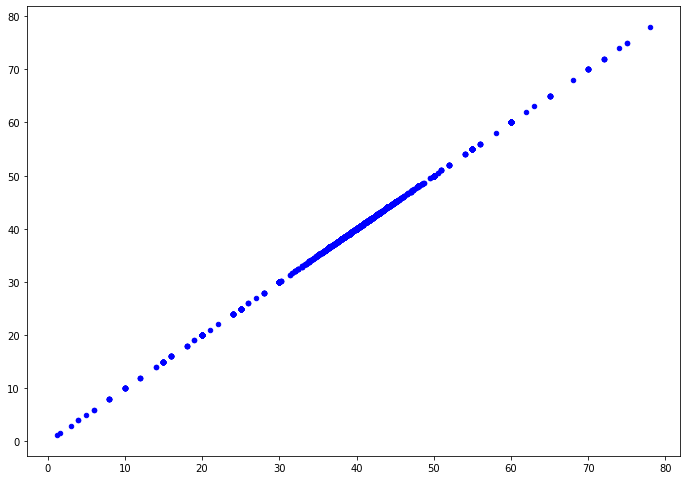

In [ ]:
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

### ML algorithm after outlier detection

Z-Score

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsZS)

In [ ]:
# evaluate ZS with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8243288034471329
Recall   : 0.45970937912813736
Precision: 0.7420042643923241
F1 score : 0.567699836867863


In [ ]:
# evaluate ZS with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.8458733841564468
Recall   : 0.7450462351387054
Precision: 0.6746411483253588
F1 score : 0.7080979284369116


KNN

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsKNN)

In [ ]:
# evaluate KNN with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.799469671859463
Recall   : 0.4187582562747688
Precision: 0.6576763485477178
F1 score : 0.5117029862792575


In [ ]:
# evaluate KNN with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.8607888631090487
Recall   : 0.7926023778071334
Precision: 0.6952491309385863
F1 score : 0.7407407407407407


## Accuracy 60%

### ML algorithm before outlier detection

In [ ]:
X_train, y_train = adultsSplitML(dirty_adults[1])

In [ ]:
# evaluate with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.7487570434206166
Recall   : 0.001321003963011889
Precision: 0.3333333333333333
F1 score : 0.002631578947368421


In [ ]:
# evaluate with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.83659264169705
Recall   : 0.6605019815059445
Precision: 0.6793478260869565
F1 score : 0.6697923643670463




### Z-Score



In [ ]:
currentDirtyAdultsZS = dirty_adults[1].copy()

Age

In [ ]:
data = currentDirtyAdultsZS['age'].values

outlier_index = ZS(data,0.11)
currentDirtyAdultsZS['age'].iloc[outlier_index] = np.NaN

The detected outliers are:  [773.7855888504056, -538.2282235508761, 105.9419263285518, 817.5794453753579, -556.9733994430704, -118.76443202623352, 364.5629798653363, 716.1201478219981, -96.34475520745968, 743.0230109140031, -290.71505446487555, 669.8180632870157, -642.8868780252819, -287.6329752525581, 182.9842858989836, 625.2210978346355, -195.56382518512729, -323.3084950310388, 201.45167303038812, 647.1941206817119, 538.2129767374358, -666.2154103518089, -127.64569438373417, 692.656068084844, 228.00953938379627, 177.5842498147365, 270.21528719120727, -271.1299067052084, -228.12054804580043, 402.37618130663, 147.09168903762583, 551.8805069555733, -169.38925866821592, 430.76873029941527, 447.2216933352532, 801.741145191733, 763.5509330762294, 774.3095556781626, 669.4889598960663, -698.7126552940373, 240.9885579023216, 2.888801057182036, -428.49557874392127, -530.3911798250921, 209.10305952830885, -174.49021650998998, 758.0087186026259, -123.56846422077842, -604.6862062208913, -338.5405

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


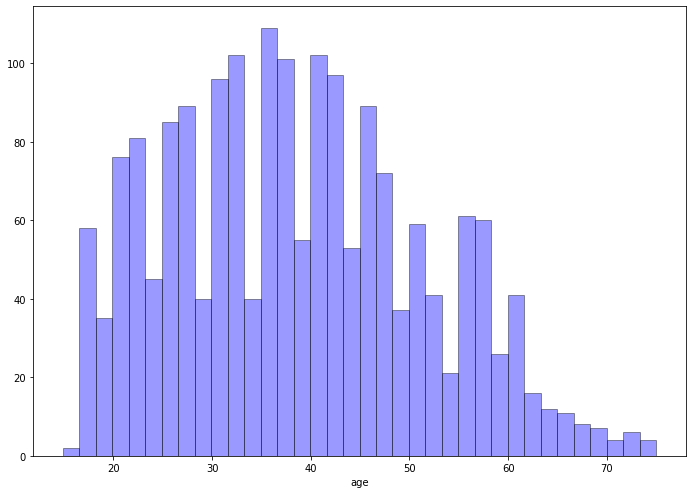

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


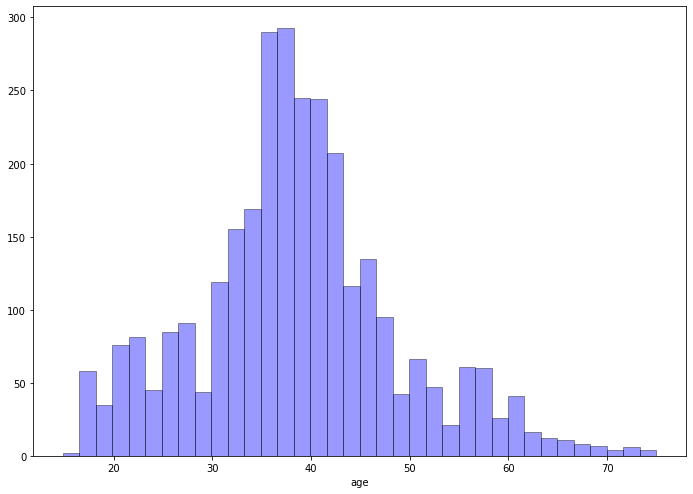

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Fnlwgt

In [ ]:
data = currentDirtyAdultsZS['fnlwgt'].values

outlier_index = ZS(data,0.09)
currentDirtyAdultsZS['fnlwgt'].iloc[outlier_index] = np.NaN

The detected outliers are:  [9159469.547786154, 5475202.705914386, 9331704.498211425, 2427681.6449865755, -5304687.187574255, 6422495.79992348, -6638290.919884079, -1472300.2143187504, -5062697.907336405, -8209767.86091157, -9131713.517742513, -983363.6131491512, -705893.9542023446, -7217751.07590807, 4236808.582454321, -6325506.572643315, -3825266.2714922726, -4345376.664429946, 5333825.255231847, -6361971.0987664405, 9889781.819288995, -3109594.806828006, -2727335.381118687, -2114304.694315541, 4553910.838574146, 1850011.6417240996, 9183702.113086458, 3440752.237701047, 5261229.408180067, -8357766.846710371, -8209746.638804099, -8170809.782866045, 3687798.978048146, -9018369.855099725, -7925115.134605634, 8122198.519950556, 6093836.113982771, 6172811.767608997, -2734224.066052315, 3048026.0722267595, -3826273.020871763, 4102148.8585315854, -6497429.996978746, 3913224.2266333015, 6273093.981830881, -7919447.244301642, 7820697.9141555345, -2516630.9987319726, -7174091.0256237695, -5014

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


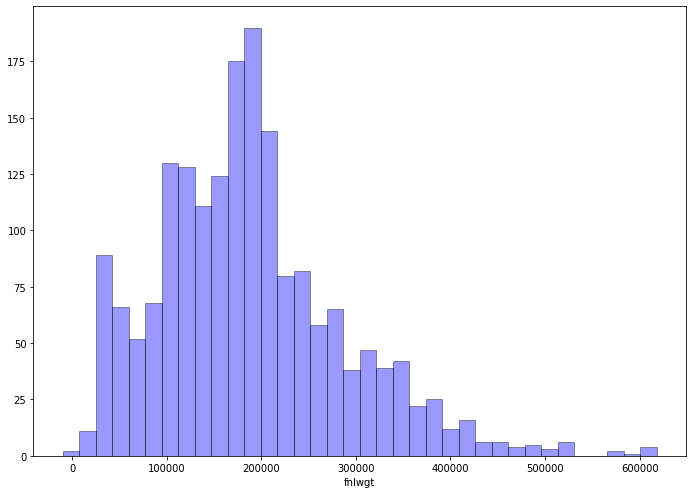

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


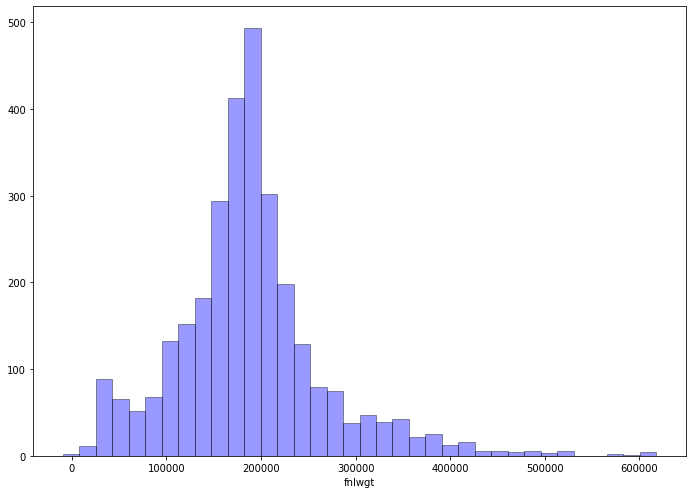

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Education-num

In [ ]:
data = currentDirtyAdultsZS['education-num'].values

outlier_index = ZS(data,0.12)
currentDirtyAdultsZS['education-num'].iloc[outlier_index] = np.NaN

The detected outliers are:  [143.97344500104242, -145.5231354040268, 55.37687187130832, 45.008477513283566, 125.8644599919938, 24.18046722382048, -121.06144827190872, 120.67000132542276, 67.61656804949514, -112.2469360333806, 109.7858113367125, 4.0, -7.324210833206763, 159.40458130450176, -62.31515515459668, 141.68873371450408, 85.82166253461803, -116.05457856753448, 141.78115935683752, 164.4108624605307, 103.27137253697656, 139.55699838985416, 39.15510720327171, -42.2894361481964, -94.71613001506306, -24.673170679085104, 4.0, -88.18380061454425, -23.41292773346372, -8.905292740044985, 101.39315335112582, 109.9049922783422, 70.82787164453589, -3.3589867429457456, -87.79716701065314, -39.24514506651359, 109.06420080290457, -22.316525513194364, -138.22054876787408, 91.05072572727092, -128.1126376329376, -142.5205611470358, 35.86928180921855, 147.25278973842603, -42.66169734191379, 125.35451045000669, 134.29930115324436, -144.3506322292872, -81.02862293775264, 145.7134989989422, -12.25776

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


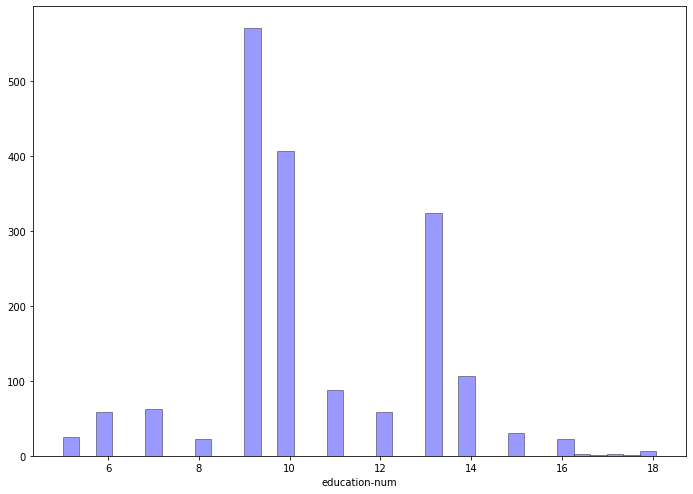

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


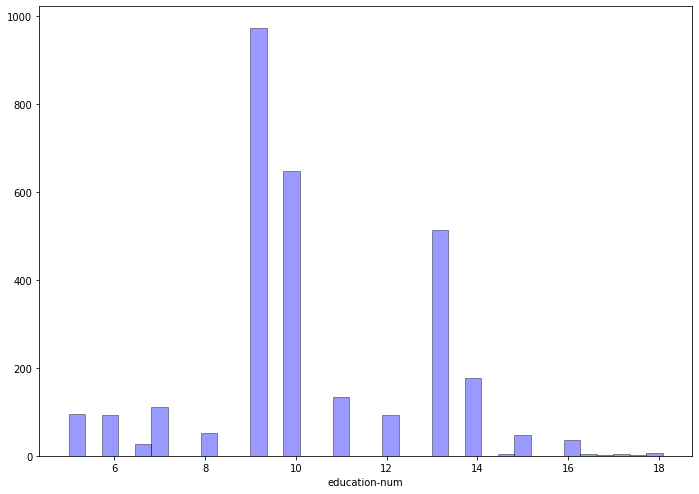

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-loss

In [ ]:
data = currentDirtyAdultsZS['capital-loss'].values

outlier_index = ZS(data,0.09)
currentDirtyAdultsZS['capital-loss'].iloc[outlier_index] = np.NaN

The detected outliers are:  [21653.10307571147, -6990.929012395049, -4250.571978087195, -16555.895480942825, 11559.684730060866, -26407.211026148623, -23151.300808400567, -9422.476280113897, -26819.184273261868, -11520.00247046915, -15307.978194095656, 1848.0, 20825.39997492697, -3713.2076023026566, -18761.14985694534, -3227.747474702668, -17079.85583091194, -18267.446265809704, -23582.965151995213, -8828.907414688449, -23979.41832620174, 14196.2310153428, -26512.63222144123, 12425.060482221132, -27391.66343555992, -11304.461970992324, 17469.51343309797, -13199.75486964277, -14559.042516786853, 7877.169076214202, 24782.684555079024, -13079.610112600874, -7911.263416506295, 26340.765490720318, 16814.00571899226, 5563.169107690745, 21599.61317154896, -5390.89898016633, -24648.05145318858, -25772.943819697884, 6050.326248599109, -14566.891516851372, -954.8280038435188, -17643.296589265527, 23184.998353155184, 29494.59453052316, 2051.0, -12171.708110490286, 20125.42768242388, 27589.6643671

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


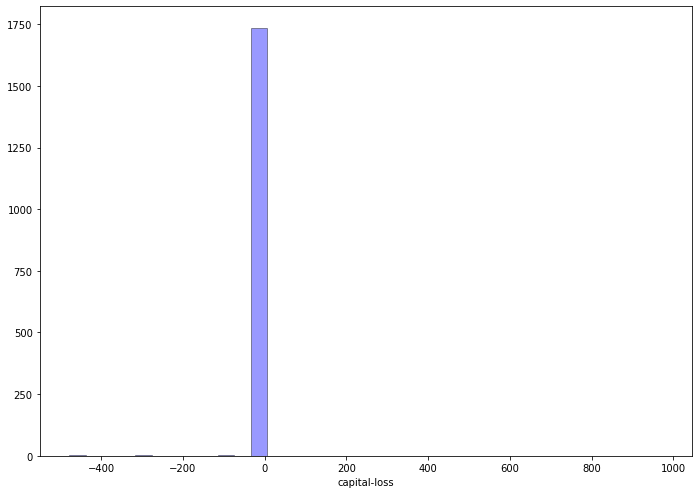

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-loss'] = currentDirtyAdultsZS['capital-loss'].mode()[0]

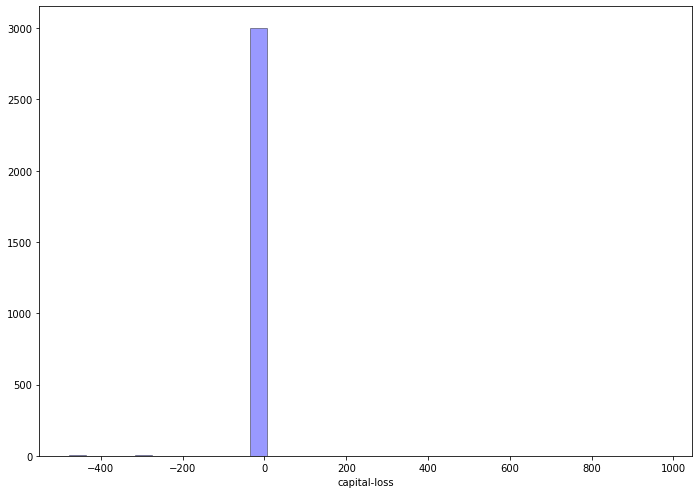

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-gain

In [ ]:
data = currentDirtyAdultsZS['capital-gain'].values

outlier_index = ZS(data,0.09)
currentDirtyAdultsZS['capital-gain'].iloc[outlier_index] = np.NaN

The detected outliers are:  [735395.0378316127, -748987.3444291214, -532042.0110136515, 766198.1988466241, 588573.7009887449, 967306.889218436, -327059.85569953336, -294927.4089655973, -965359.4669591024, 187733.8745739256, -31483.707410725765, 195951.13652718996, -366331.9775173954, 169442.2766047673, 937924.1496079484, 153099.1112171318, 212095.0279829696, 1067806.375408933, -569378.1207250925, 173040.37249235716, 571694.7775740749, 755106.2912682293, 108292.72850969258, 571039.6091793042, 190382.4874553057, 375619.2333848876, -636566.157299785, 657492.0403245351, -179826.7106336631, 875256.5449518124, -66738.54848914768, -557753.0035863926, -982266.4091563874, 945475.6635376452, 99999.0, -523021.98934438254, -568840.5794335727, -629316.560052587, 569309.300383877, 460504.2462043742, -899296.9397688103, -798573.0337830421, -276276.8335063214, -446370.8319697959, 798061.2280443899, -513632.4756272369, 702852.2789183356, 976516.4740739046, -956120.308210331, 370556.6915969848, -408589.

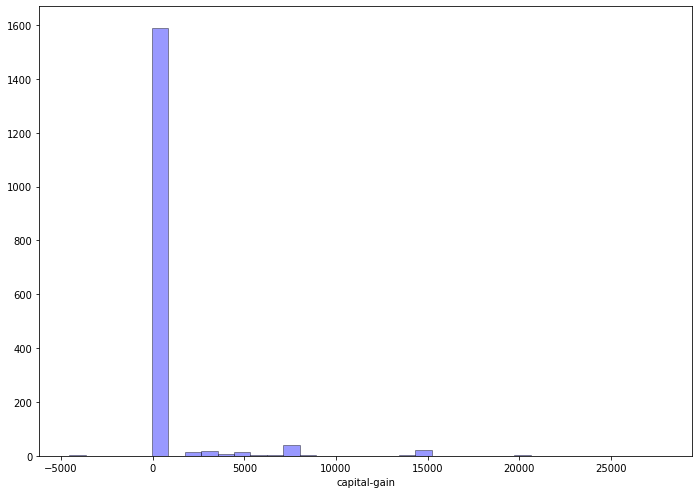

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-gain'] = currentDirtyAdultsZS['capital-gain'].mode()[0]

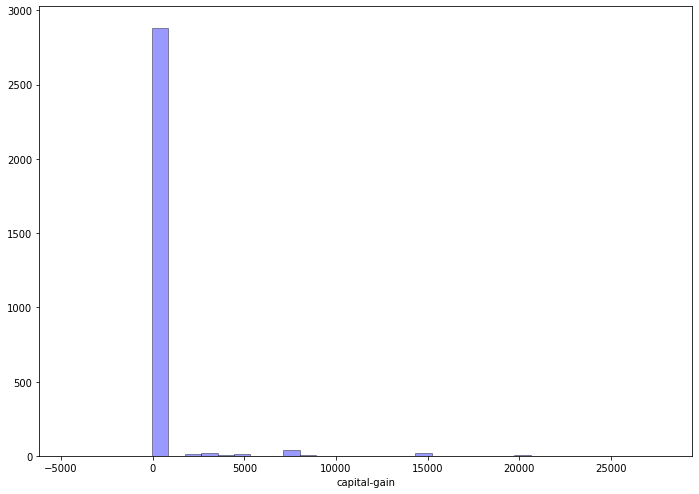

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Hours-per-week

In [ ]:
data = currentDirtyAdultsZS['hours-per-week'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['hours-per-week'].iloc[outlier_index] = np.NaN

The detected outliers are:  [990.5416396519514, -890.4897017337548, 632.6247470281872, -783.7039987546773, 616.1520348658494, -471.89250919416, 345.9732402507134, 525.2273600095969, -123.42046355557228, -799.0167060624312, 84.0, 432.56004294541367, 998.0135577324564, 612.8757926379229, -148.46688248813393, 357.29069436985526, -590.5729746865684, -261.4993664389277, 145.34118666108407, -947.0953126357856, -327.79862011294176, 728.5208882569196, 878.3044538597741, 485.5095353072881, -641.0303840754195, 1041.863801317951, 883.9682941230775, 437.2715124459203, -873.9888564948149, -151.19874729587116, 711.9425215667528, -639.1784047405862, 404.8737448869672, -400.8721157791499, 540.6872210630978, 954.0038538091844, 531.0294633122057, -486.53008172307904, -943.5830135321036, 837.8522871546304, 649.194799473568, 85.0, -262.0943792135921, 294.13905331541145, -795.2824227633974, 547.3324867059835, 894.0923570790598, 826.7038922964291, 898.5609067357766, 724.4109326922907, -780.1735156913417, 10

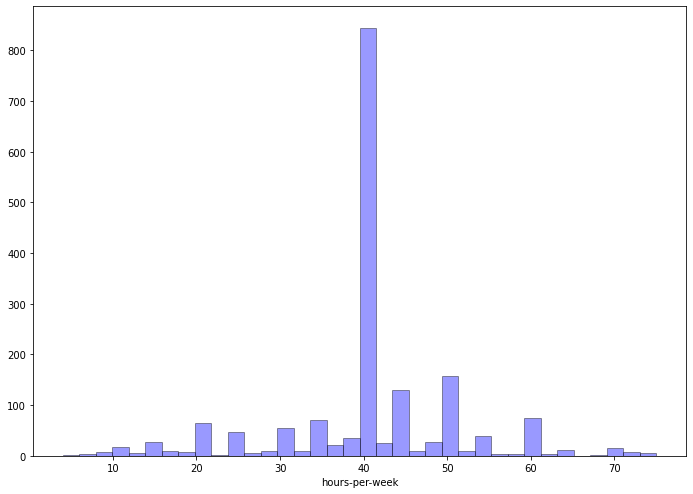

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


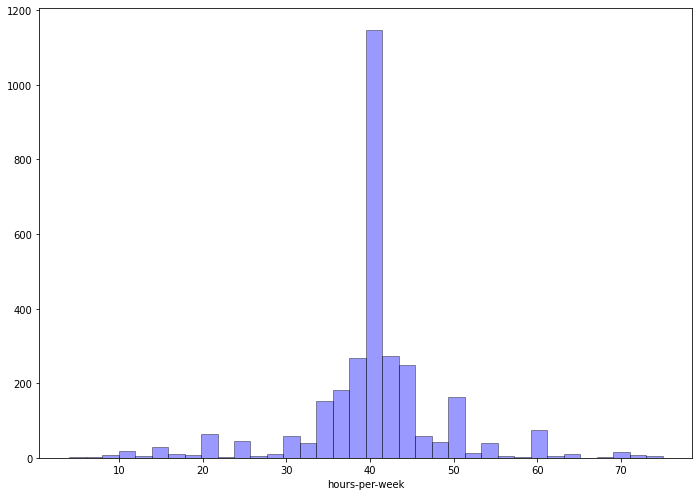

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})



### KNN



In [ ]:
# Dataset to clear

currentDirtyAdultsKNN = dirty_adults[1].copy()

Age

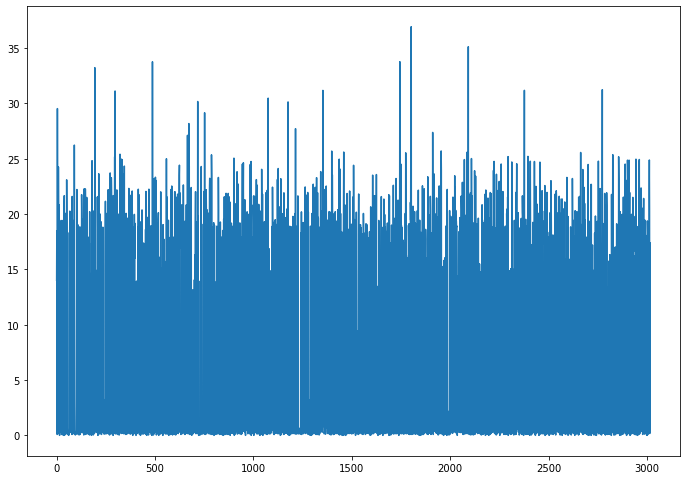

In [ ]:
Xval = currentDirtyAdultsKNN['age'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

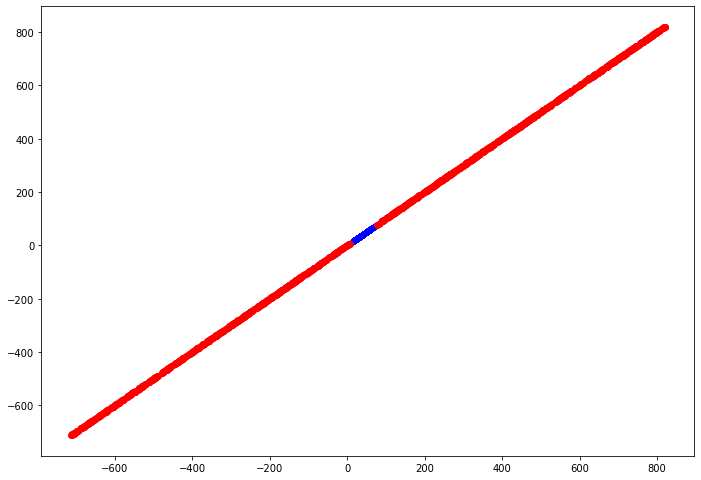

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 9)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["age"], outlier_values["age"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['age'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


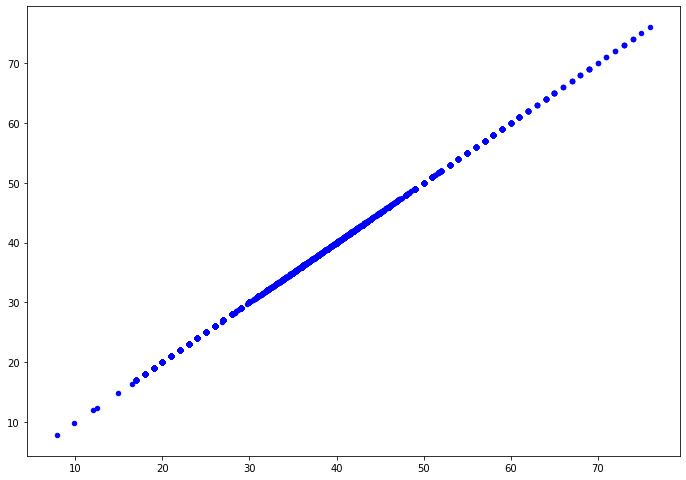

In [ ]:
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

Fnlwgt

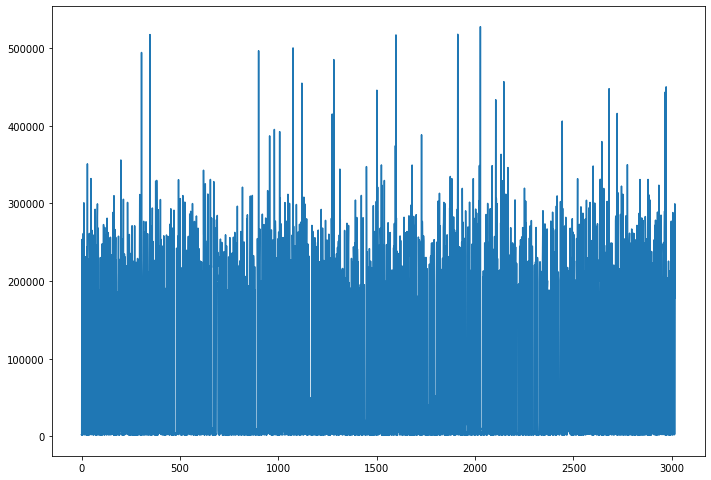

In [ ]:
Xval = currentDirtyAdultsKNN['fnlwgt'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

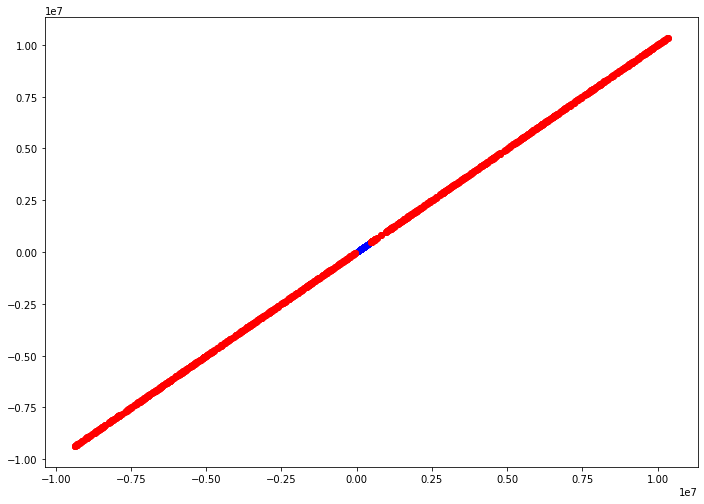

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 50000)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["fnlwgt"], outlier_values["fnlwgt"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['fnlwgt'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


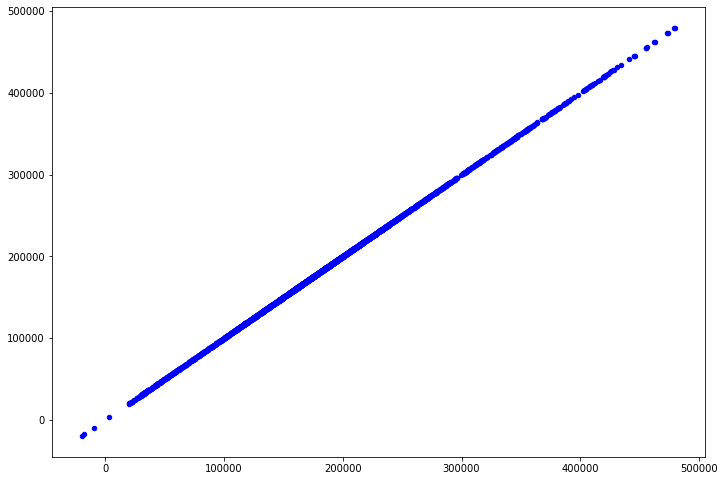

In [ ]:
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

Education-num

<ipython-input-416-3698d60971bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xval["education"] = lb.fit_transform(Xval['education'])


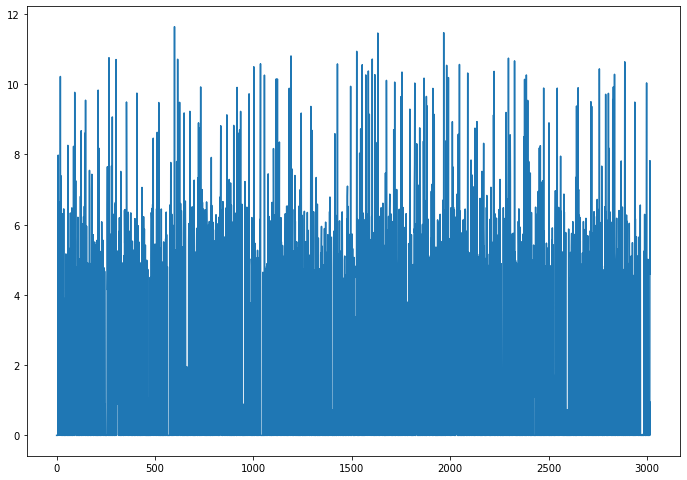

In [ ]:
Xval = currentDirtyAdultsKNN[['education-num', 'education']]
Xval["education"] = lb.fit_transform(Xval['education'])
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

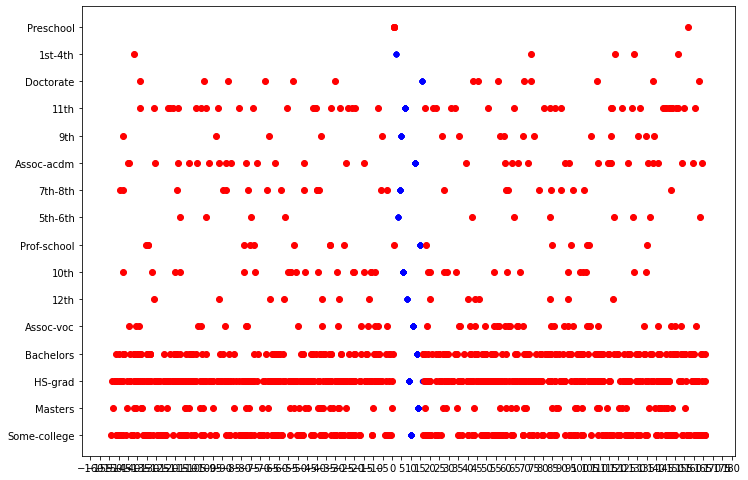

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 2)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# plot data
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["education-num"], outlier_values["education"], color = "r")

In [ ]:
# impute values for outliers
currentDirtyAdultsKNN['education-num'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


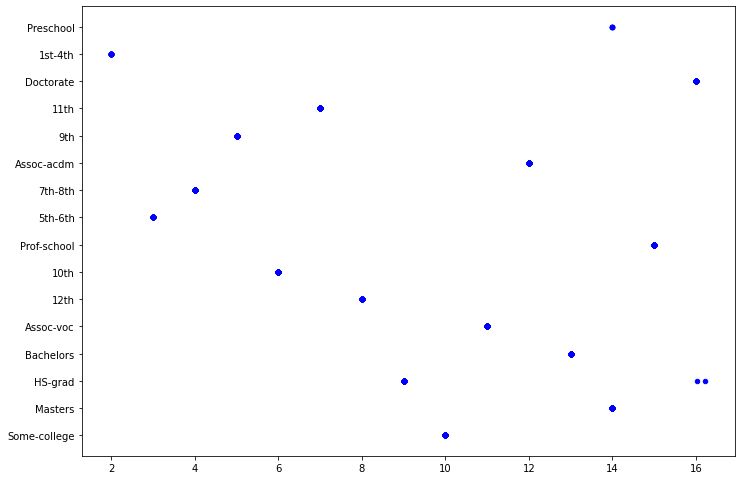

In [ ]:
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

Capital-loss

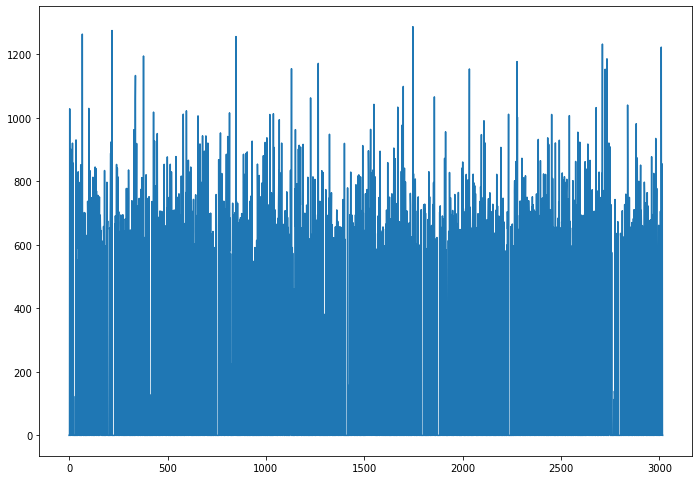

In [ ]:
Xval = currentDirtyAdultsKNN['capital-loss'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

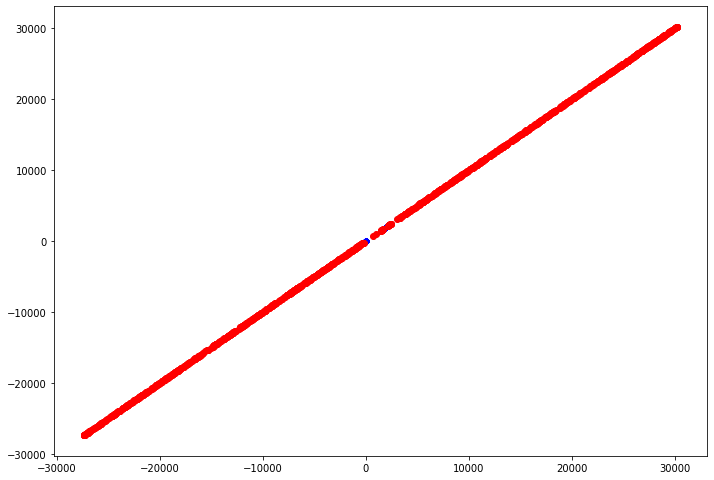

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 200)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-loss"], outlier_values["capital-loss"], color = "r")

In [ ]:
# imputation with the mode of the capital-losses

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-loss'] = currentDirtyAdultsKNN['capital-loss'].mode()[0]

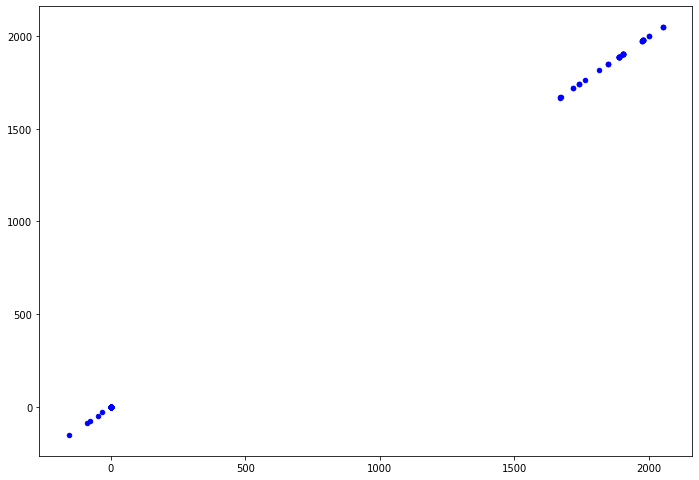

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

Capital-gain

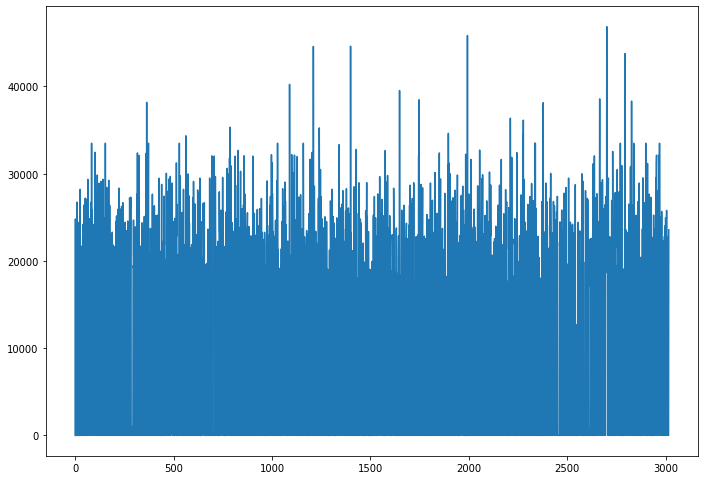

In [ ]:
Xval = currentDirtyAdultsKNN['capital-gain'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

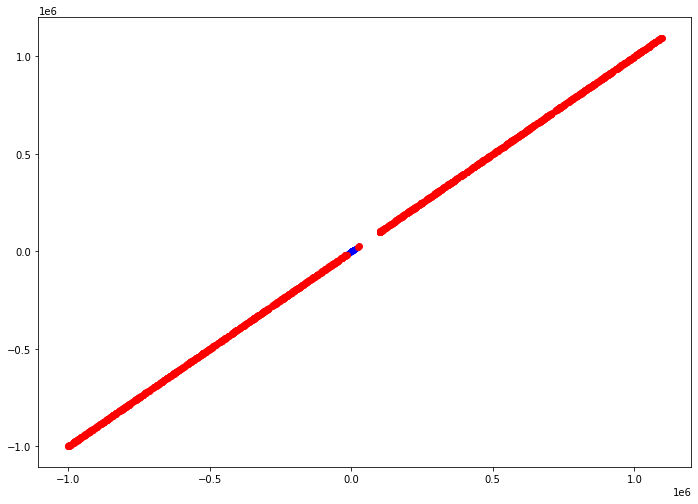

In [ ]:
#find the outliers 

outlier_index = np.where(distances.mean(axis = 1) > 13000)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-gain"], outlier_values["capital-gain"], color = "r")

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-gain'] = currentDirtyAdultsKNN['capital-gain'].mode()[0]

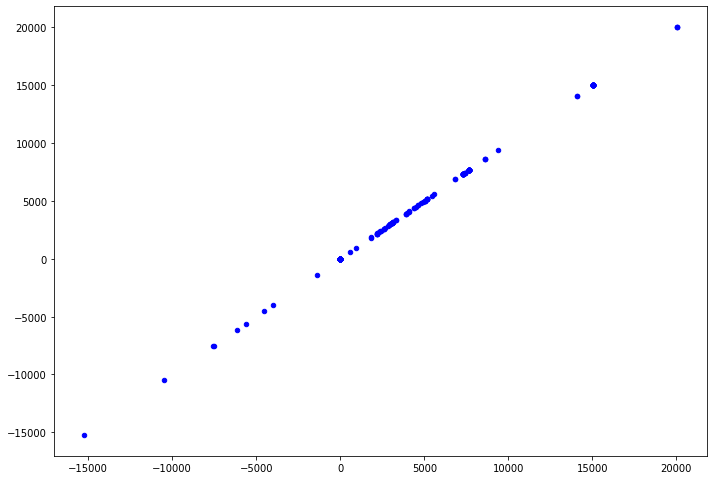

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

Hours-per-week

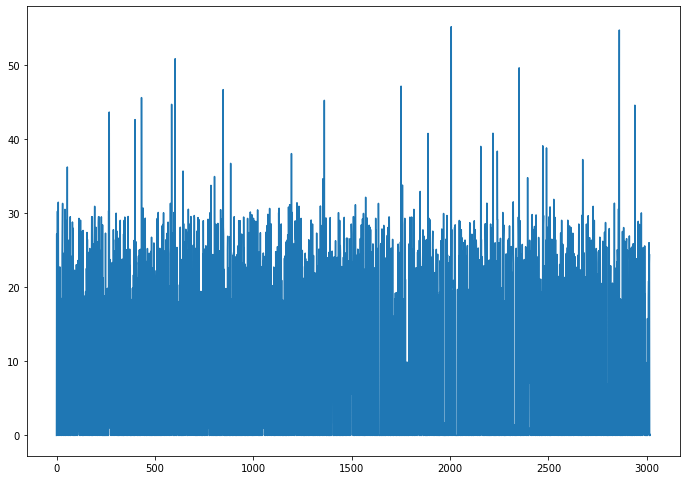

In [ ]:
Xval = currentDirtyAdultsKNN['hours-per-week'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

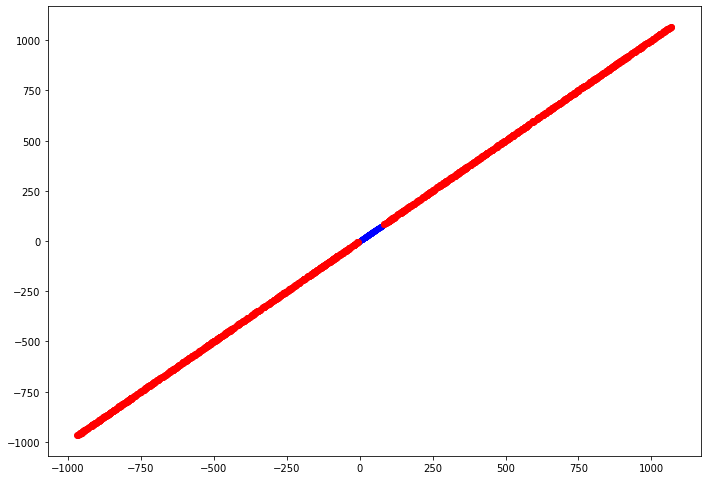

In [ ]:
#find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 12)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["hours-per-week"], outlier_values["hours-per-week"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['hours-per-week'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


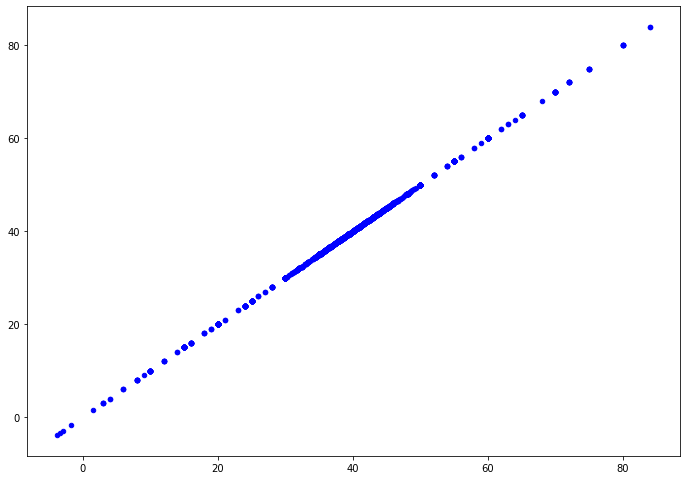

In [ ]:
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

### ML algorithm after outlier detection

Z-Score

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsZS)

In [ ]:
# evaluate ZS with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8213457076566125
Recall   : 0.48745046235138706
Precision: 0.7096153846153846
F1 score : 0.5779169929522318


In [ ]:
# evaluate ZS with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.8723897911832946
Recall   : 0.7701453104359313
Precision: 0.7342569269521411
F1 score : 0.7517730496453902


KNN

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsKNN)

In [ ]:
# evaluate KNN with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8210142525687769
Recall   : 0.46895640686922063
Precision: 0.7200811359026369
F1 score : 0.568


In [ ]:
# evaluate KNN with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.8816705336426914
Recall   : 0.7939233817701453
Precision: 0.7493765586034913
F1 score : 0.7710070558050033


## Accuracy 70%

### ML algorithm before outlier detection

In [ ]:
X_train, y_train = adultsSplitML(dirty_adults[2])

In [ ]:
# evaluate with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.7487570434206166
Recall   : 0.001321003963011889
Precision: 0.3333333333333333
F1 score : 0.002631578947368421


In [ ]:
# evaluate with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.854822671528008
Recall   : 0.714663143989432
Precision: 0.709043250327654
F1 score : 0.7118421052631579




### Z-Score



In [ ]:
currentDirtyAdultsZS = dirty_adults[2].copy()

Age

In [ ]:
data = currentDirtyAdultsZS['age'].values

outlier_index = ZS(data,0.12)
currentDirtyAdultsZS['age'].iloc[outlier_index] = np.NaN

The detected outliers are:  [2.322865753471433, 511.5571416085307, -462.2546339986757, -96.4114213478839, -243.4815512896193, 586.79587907579, -98.54145369886136, -633.8403913206156, -444.5516644916255, 255.44257110027004, -315.21791939741, -99.6355675782147, 402.61132198720287, 310.6972375317016, -79.55445995661819, 185.58859181462884, -233.24953132245585, -96.671251665177, -310.60769739865145, 531.3350717926404, -450.4756565883257, 156.24721506883026, -269.8169425024605, 644.8964966532421, 0.5808167322269355, -276.2811250425026, 737.3478632658034, 261.3588795630011, 776.2085412835307, 182.18016097110228, 346.5082003012916, 279.6254854488262, -703.0044306351903, 317.1815489325174, 334.384469501486, 722.3892817722078, 12.17937402111636, 799.6873930988307, -13.481516200863323, 219.77195120134687, 243.55919677598857, 308.62059178430127, -361.80046129792026, -419.0434094701093, -561.2537411848557, 258.73532045740296, 94.4791895091589, -235.52718090898423, 547.5838495521782, 554.5102224516

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


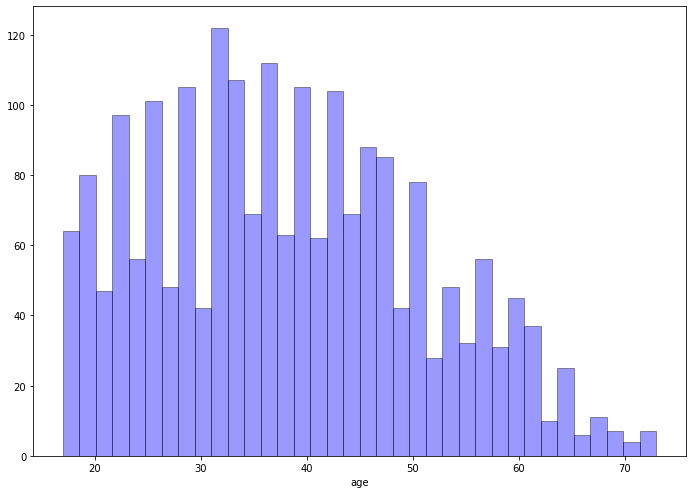

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


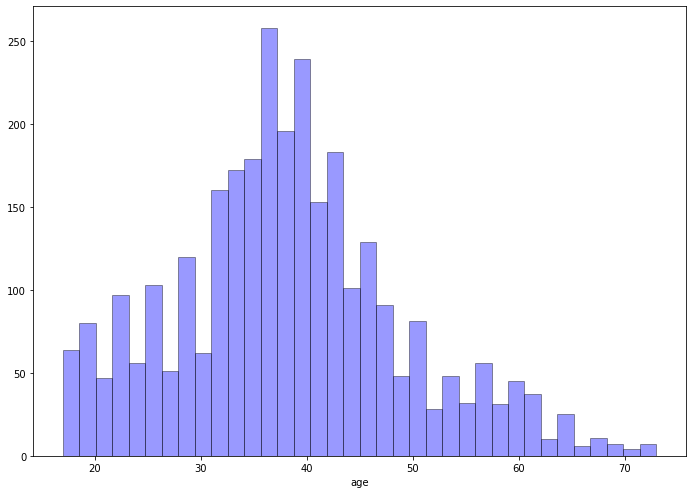

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Fnlwgt

In [ ]:
data = currentDirtyAdultsZS['fnlwgt'].values

outlier_index = ZS(data,0.095)
currentDirtyAdultsZS['fnlwgt'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-8154845.255419277, -7744674.243957052, 7139009.116083792, 3985867.157663301, 9619724.826029886, 3650730.763429355, 2282076.2418443747, 1741671.7918671025, -9051109.430384992, 5309996.388359795, -8862246.667996785, 3969612.503784878, 2287346.5054171714, 9525434.668107023, -1750097.541530881, -226129.4974587448, -695371.2289022803, -2962327.918143112, 2381660.6209959714, 6453390.410351466, -3443877.227908454, 10079174.956149502, -3125734.668991319, 5541253.600520741, 5141529.410501951, 4326305.366047315, -8129661.943825268, -5914615.386927836, -414006.1054930445, 5579802.726601886, 7618980.280427942, 7794869.482359566, -2213764.3265080024, 5219391.330736713, -2330214.6461749, -8782914.891690133, 7967383.49157453, -4834276.783783049, 5782620.020308165, 5010794.423266137, -9305810.204021975, -5059798.195525477, -2192364.3918374158, -119064.63491222076, 4734042.1305201845, -7507351.18965522, 5939728.049333969, -832606.2512296755, -4328955.81639502, 1587073.2454

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


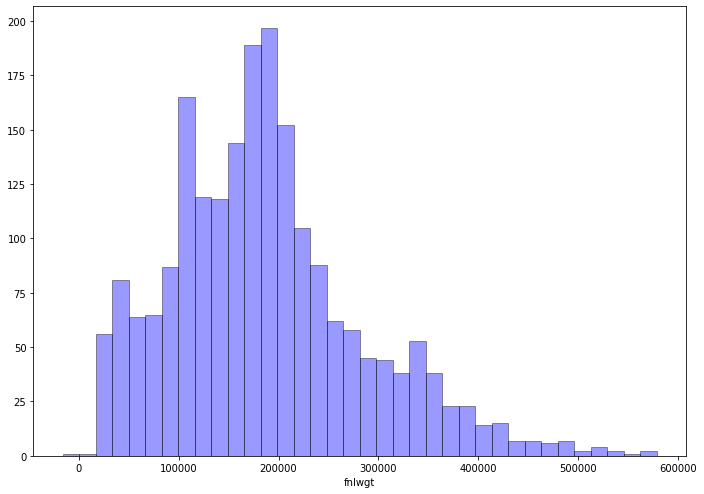

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


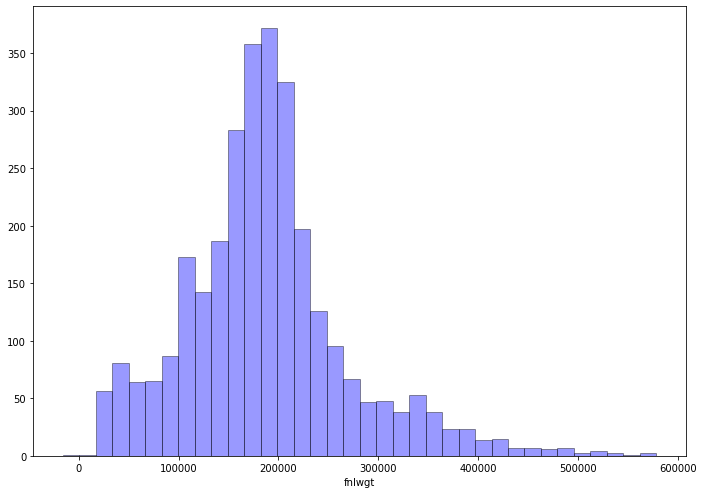

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Education-num

In [ ]:
data = currentDirtyAdultsZS['education-num'].values

outlier_index = ZS(data,0.12)
currentDirtyAdultsZS['education-num'].iloc[outlier_index] = np.NaN

The detected outliers are:  [89.16188121353287, -50.06203678022069, -7.758236766532292, 157.2476472508808, 3.0, -111.50422335292237, -65.70955179016882, -27.867510972380188, 136.48320726450797, -41.93079072720506, 47.56666116550522, -15.477028656717124, 134.9095379538257, 107.56331239856095, -47.22695959175857, 159.78986267451322, 22.05402331160334, -90.22986366262664, 118.40633781725728, 135.32934068686424, 36.25790765422413, 41.54586248399552, 41.322188997006585, -85.33420252159263, 36.12152044272169, 18.68839190174093, -101.98296382395884, 147.40580218806917, -57.71805943607376, -124.33460538434336, -97.17529041746091, -120.91925170369213, -136.93578058587318, -144.41132739979008, 150.55084818824255, -47.66742619268548, -86.67947372619628, 78.1874469718864, -39.42926659685418, 16.0, -121.415438049799, 165.7157122860588, -60.32279778282232, 2.0, -138.8706066933587, -63.10104584602735, -108.18465396738824, -77.3793123537551, -101.74775090969104, 81.87418147452718, 80.16307788729529, -

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


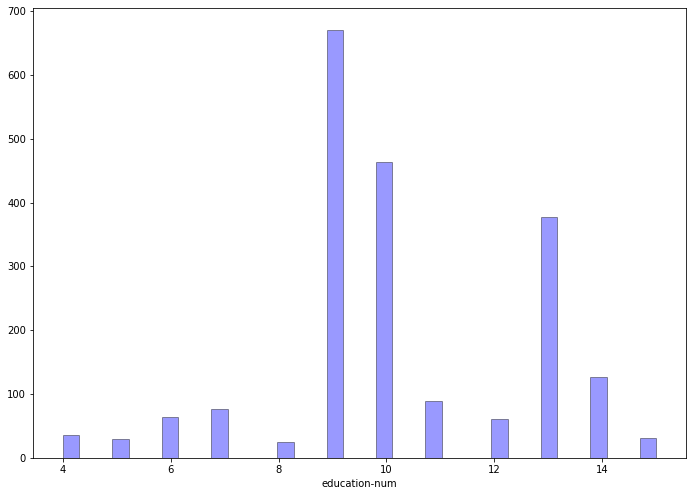

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


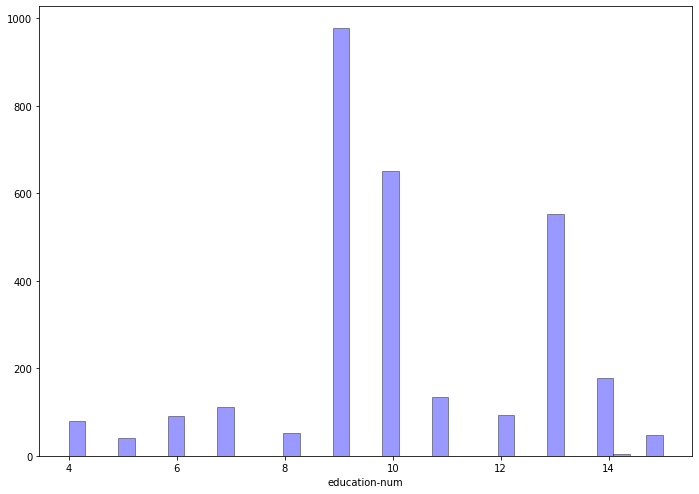

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

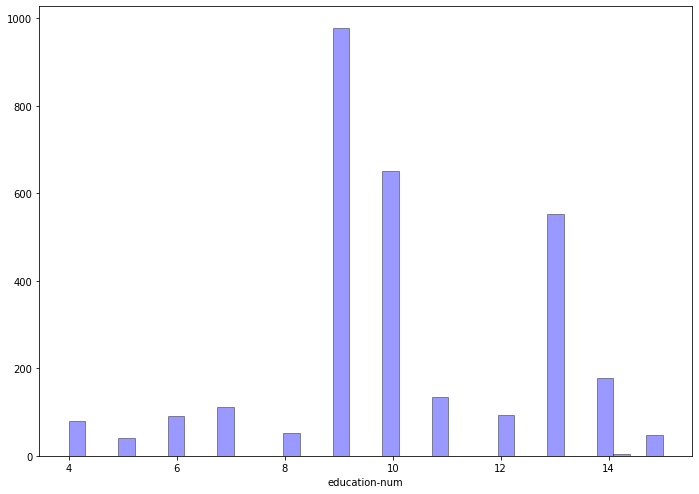

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-loss

In [ ]:
data = currentDirtyAdultsZS['capital-loss'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['capital-loss'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-14583.081945453308, 8277.968367293477, 9392.470478183586, -13935.845351679767, -7285.960782501814, -4820.7317761895065, -5905.794534963661, -15288.031688913854, -26746.36522907756, -10833.282199275083, -20564.415887158422, 1848.0, -19140.89168614961, 13301.110802409736, -21476.452265457898, -5122.475382289562, -1879.2551492340097, 25679.349596903587, -7623.0645470941745, -20596.15517794083, 18091.30012496294, 10057.377384513386, 6155.728670008008, 10205.66351826776, -6114.013570736988, 15377.142678360478, -23401.3086757783, 2968.864812334968, -13047.222643843998, 25639.546451580383, -6699.077263583091, 25616.479365407857, -5390.862039142943, -11107.098857796873, 12965.530582370757, -24497.940059339533, 9373.29820400842, -14778.875231937072, 24210.37517767355, 22019.038981060992, -25907.089525908043, 18157.612770958796, 29758.073250952268, 19025.8778254879, 4960.754763180601, 12922.80597332525, -14026.306513174544, 2051.0, -19470.14401278449, -18908.3293436

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


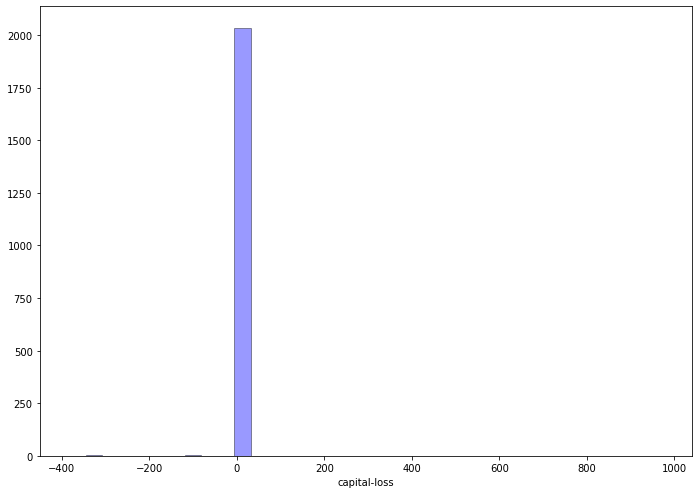

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-loss'] = currentDirtyAdultsZS['capital-loss'].mode()[0]

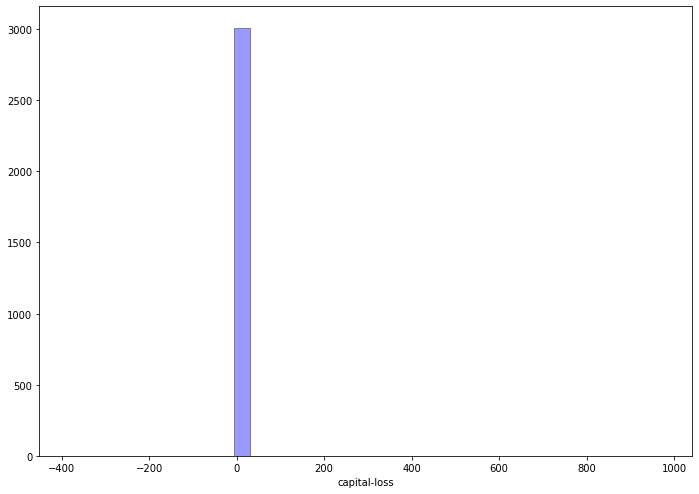

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-gain

In [ ]:
data = currentDirtyAdultsZS['capital-gain'].values

outlier_index = ZS(data,0.09)
currentDirtyAdultsZS['capital-gain'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-928849.7592362236, -265183.57977507066, 434403.8468613268, 518495.4223245544, 602523.0711824247, -108072.58909487784, -630955.1454542931, 168661.1498029629, 641793.2704354904, -186068.89612256736, 311162.5969450793, -499695.27499555727, -589603.0316934036, 708721.8036866044, -151579.98475381662, -249234.5814988865, 351489.317622222, -935023.5224188851, -487282.1217355175, 99999.0, 1082072.9176084013, 457098.09039928304, 856454.5448022078, -211461.75135439285, -989706.58080019, 568395.8182837912, 408512.03666200384, -371389.0941682834, -695980.8348432145, -454555.6557941303, -299692.85510412965, -808124.0639981164, -379942.845677656, -391487.7425526398, 132999.49899150428, -60424.73423305468, -226293.0415663867, 395463.6274654243, 964604.5678677014, -749915.6530563907, 720757.5410436572, -415360.9085975552, -862486.5294719514, 457318.7286276708, 917732.0283220564, -636909.3269316305, -786112.5920559191, -149949.629282756, -301166.7664026928, -926133.3474479

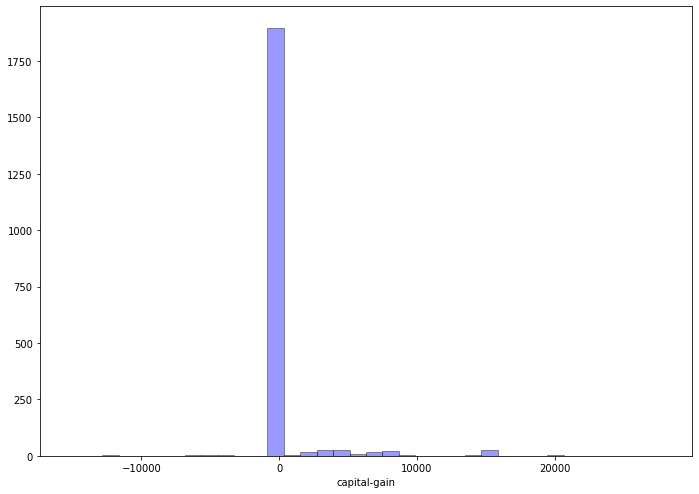

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-gain'] = currentDirtyAdultsZS['capital-gain'].mode()[0]

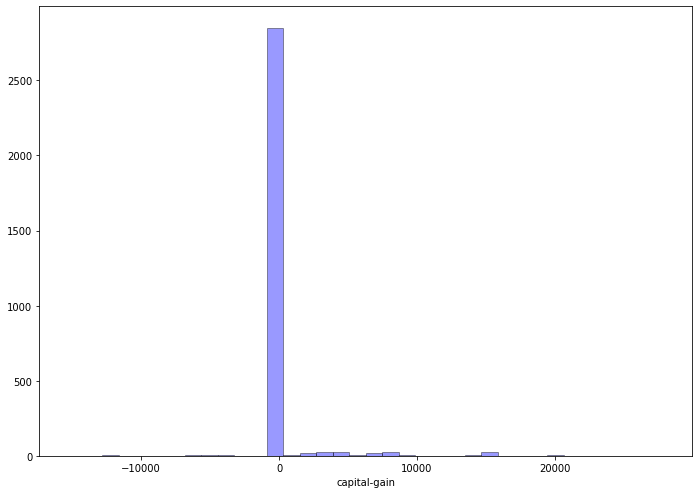

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Hours-per-week

In [ ]:
data = currentDirtyAdultsZS['hours-per-week'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['hours-per-week'].iloc[outlier_index] = np.NaN

The detected outliers are:  [1032.2869232327266, -618.2457874089532, -22.760993072122236, 517.2744730376471, -283.3558715283664, -539.6960294213411, 944.459480974552, 992.3211336972925, 953.3336086202036, 815.4897562384423, 84.0, 692.2900939154651, 486.31669026291615, -322.2432536466117, -835.4697559577221, 649.2590317834739, -744.7991099939981, -174.74844536271735, -515.5646711963664, -510.921916084659, 108.41775787028216, 187.3120361697312, -958.222885857717, 851.44737011543, -272.7382629892602, 474.6504124692941, -93.49130603856588, 165.00533120208954, -47.67210757884004, 375.1088838473361, 894.4209774419134, 619.3154083551339, -292.9070606196335, 85.0, -219.46605282471975, -294.6002338422508, 615.3369360597209, -593.2492334095784, 738.2487261940153, 328.3963784552453, -966.1113891277566, -180.4486242870536, 3.0, -844.8666070657464, 91.0, -439.5608351578159, -723.9818590507398, 259.4270714599941, 1018.1970965102968, -11.91353487288336, -608.8103152377535, -387.6402929918971, -694.79

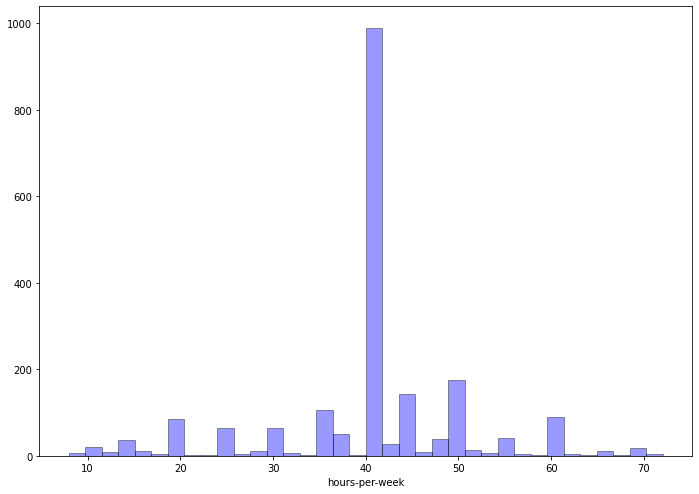

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


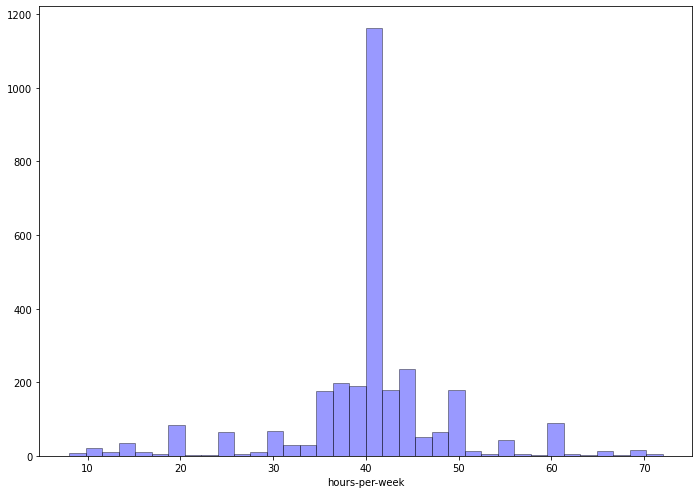

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})



### KNN



In [ ]:
# Dataset to clear

currentDirtyAdultsKNN = dirty_adults[2].copy()

Age

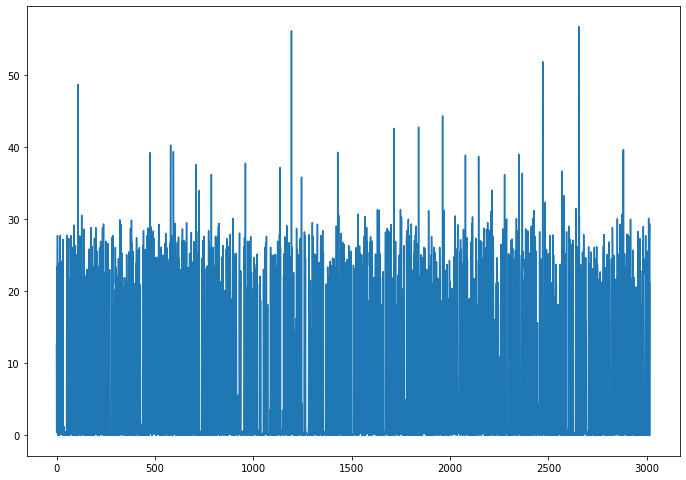

In [ ]:
Xval = currentDirtyAdultsKNN['age'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

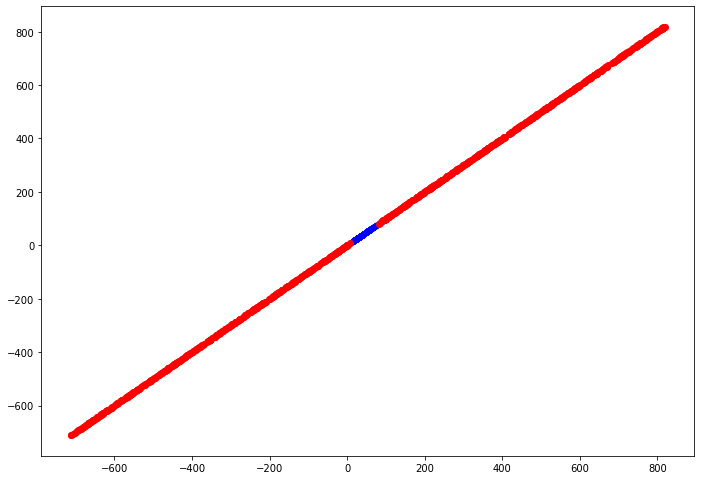

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 9)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["age"], outlier_values["age"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['age'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


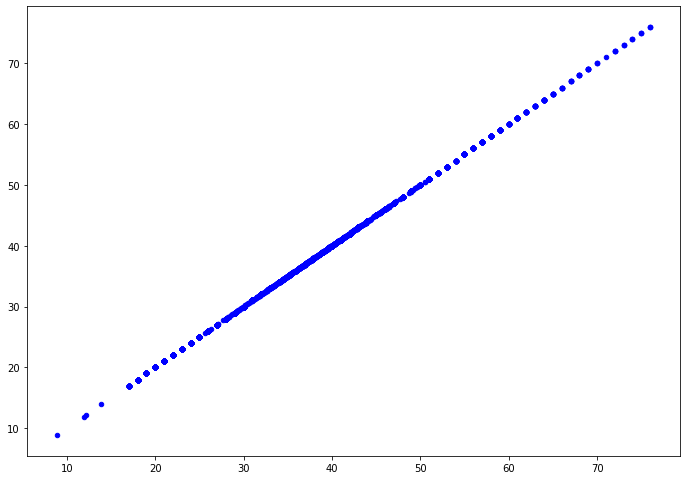

In [ ]:
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

Fnlwgt

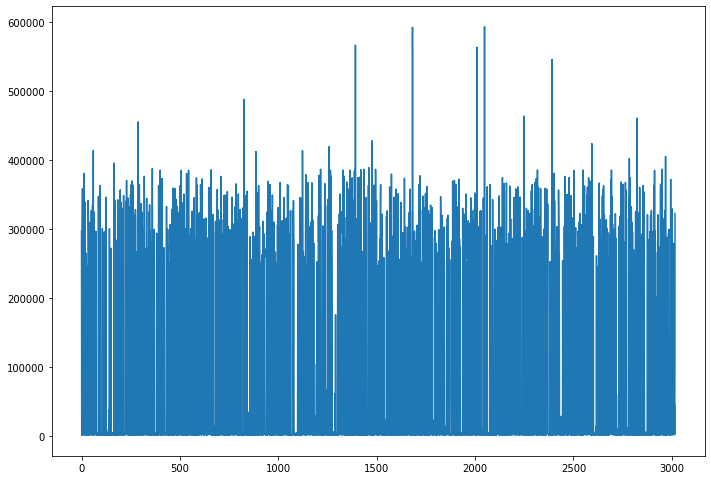

In [ ]:
Xval = currentDirtyAdultsKNN['fnlwgt'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

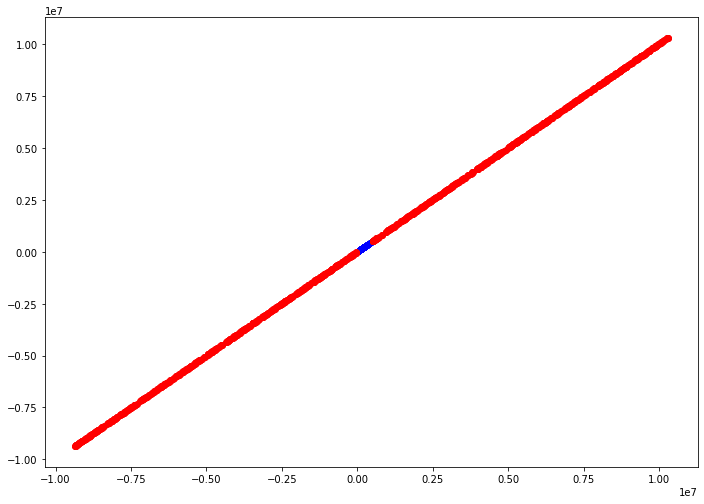

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 60000)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["fnlwgt"], outlier_values["fnlwgt"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['fnlwgt'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


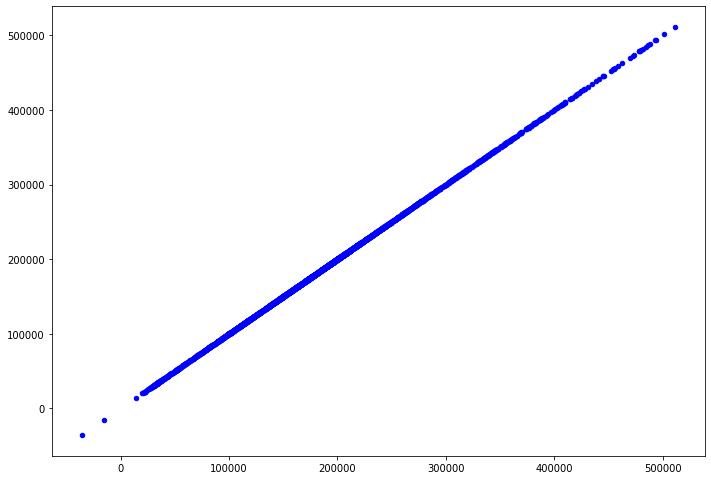

In [ ]:
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

Education-num

<ipython-input-476-3698d60971bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xval["education"] = lb.fit_transform(Xval['education'])


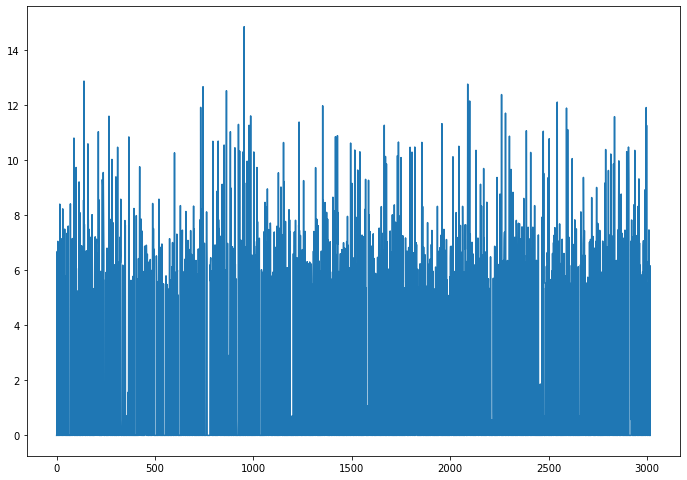

In [ ]:
Xval = currentDirtyAdultsKNN[['education-num', 'education']]
Xval["education"] = lb.fit_transform(Xval['education'])
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

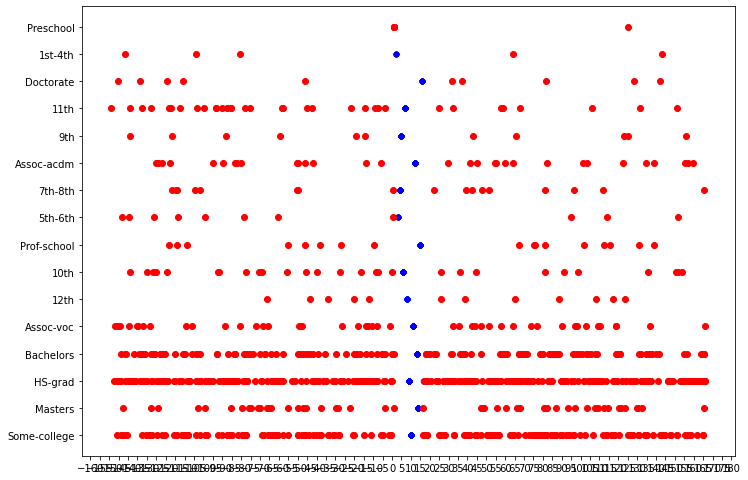

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 2)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# plot data
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["education-num"], outlier_values["education"], color = "r")

In [ ]:
# impute values for outliers
currentDirtyAdultsKNN['education-num'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


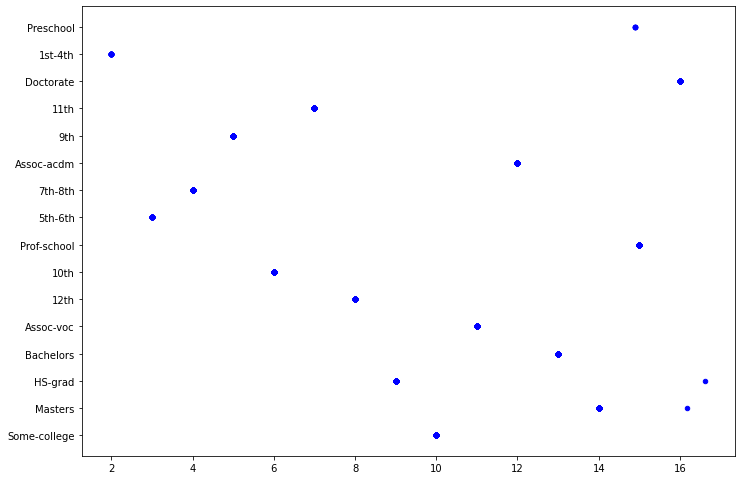

In [ ]:
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

Capital-loss

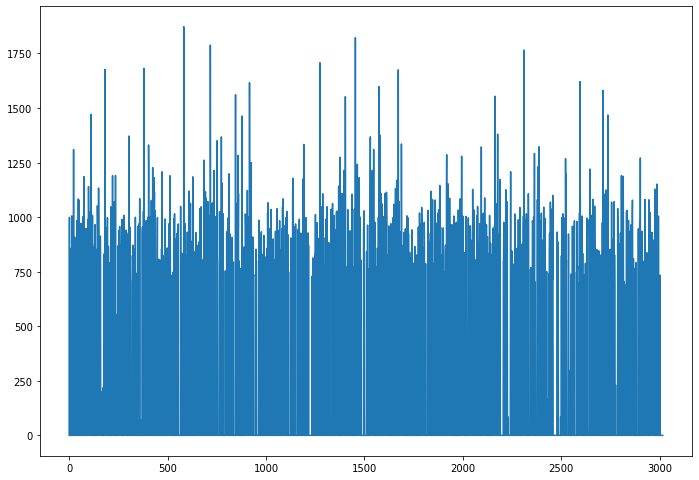

In [ ]:
Xval = currentDirtyAdultsKNN['capital-loss'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

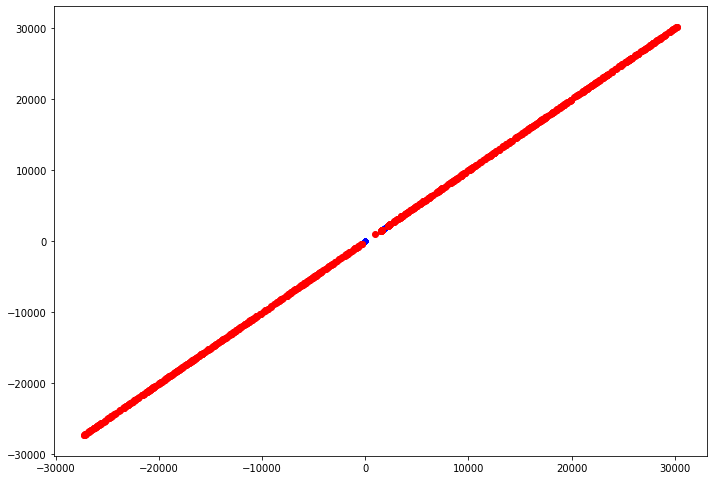

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 200)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-loss"], outlier_values["capital-loss"], color = "r")

In [ ]:
# imputation with the mode of the capital-losses

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-loss'] = currentDirtyAdultsKNN['capital-loss'].mode()[0]

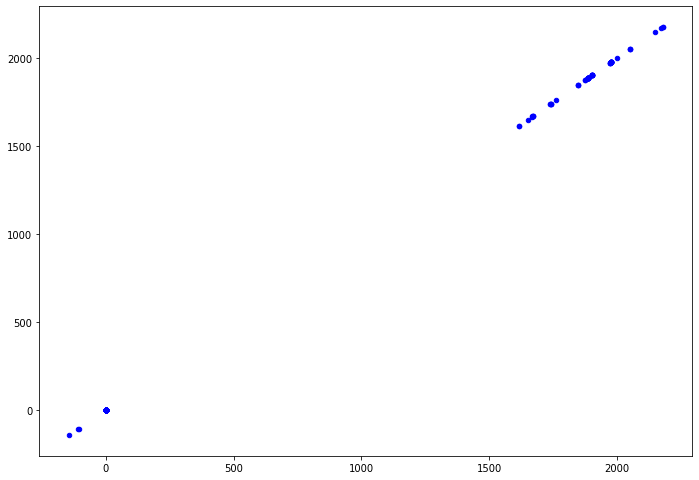

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

Capital-gain

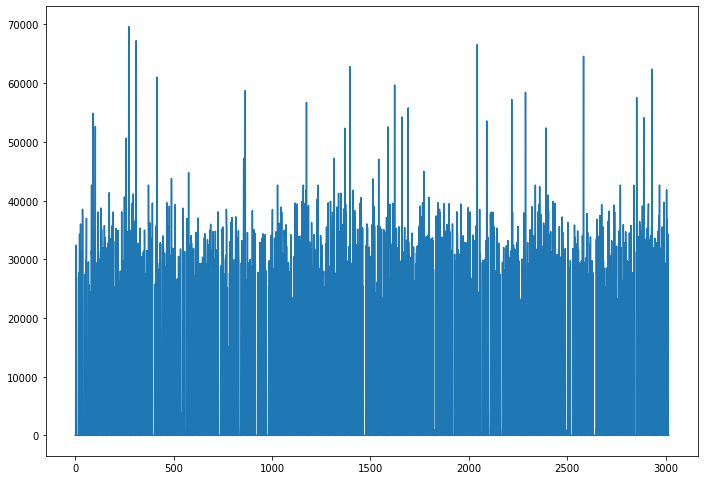

In [ ]:
Xval = currentDirtyAdultsKNN['capital-gain'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

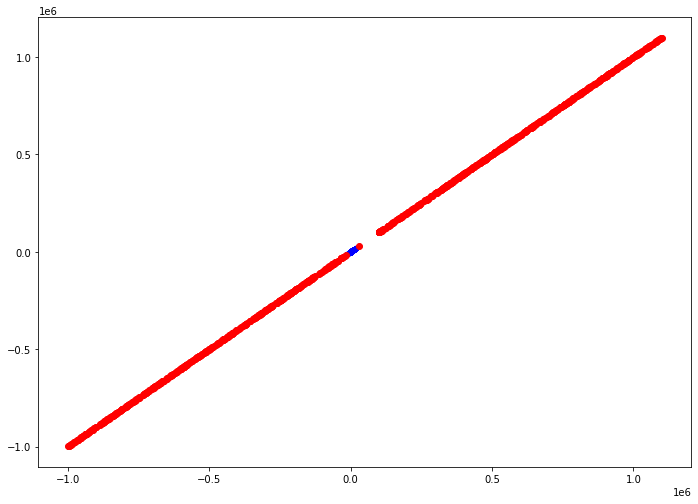

In [ ]:
#find the outliers 

outlier_index = np.where(distances.mean(axis = 1) > 13500)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-gain"], outlier_values["capital-gain"], color = "r")

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-gain'] = currentDirtyAdultsKNN['capital-gain'].mode()[0]

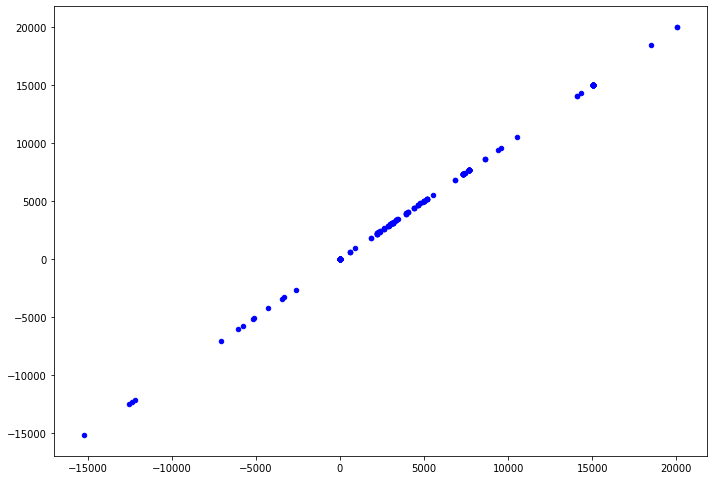

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

Hours-per-week

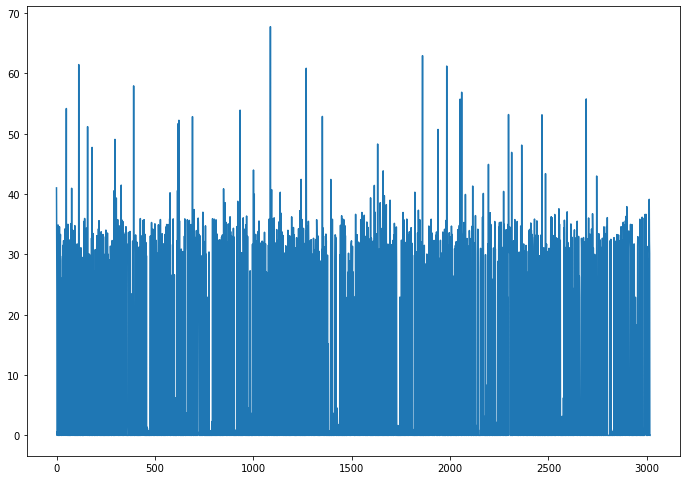

In [ ]:
Xval = currentDirtyAdultsKNN['hours-per-week'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

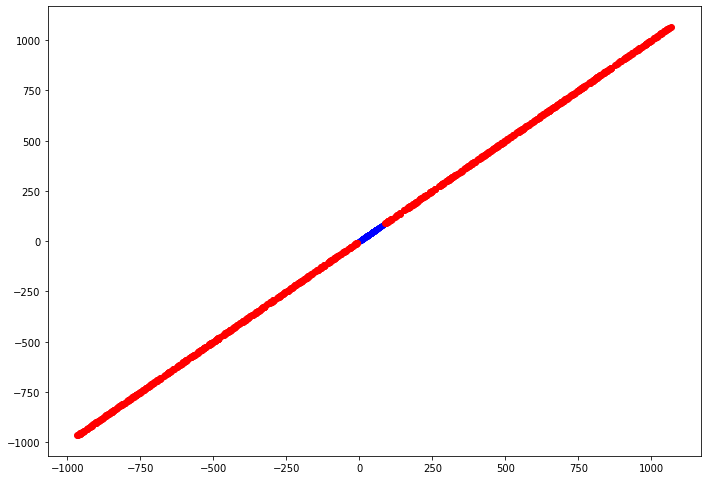

In [ ]:
#find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 12)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["hours-per-week"], outlier_values["hours-per-week"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['hours-per-week'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


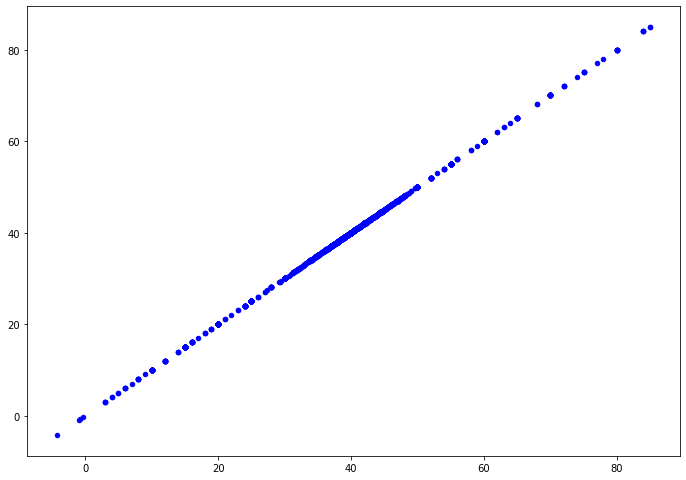

In [ ]:
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

### ML algorithm after outlier detection

Z-Score

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsZS)

In [ ]:
# evaluate ZS with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8256546237984753
Recall   : 0.4715984147952444
Precision: 0.7391304347826086
F1 score : 0.5758064516129032


In [ ]:
# evaluate ZS with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.9005634736493205
Recall   : 0.8203434610303831
Precision: 0.7910828025477707
F1 score : 0.8054474708171206


KNN

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsKNN)

In [ ]:
# evaluate KNN with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8266489890619821
Recall   : 0.45970937912813736
Precision: 0.7532467532467533
F1 score : 0.5709598031173092


In [ ]:
# evaluate KNN with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.9005634736493205
Recall   : 0.8243064729194187
Precision: 0.7888748419721872
F1 score : 0.806201550387597


## Accuracy 80%

### ML algorithm before outlier detection

In [ ]:
X_train, y_train = adultsSplitML(dirty_adults[3])

In [ ]:
# evaluate with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.7487570434206166
Recall   : 0.001321003963011889
Precision: 0.3333333333333333
F1 score : 0.002631578947368421


In [ ]:
# evaluate with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.8856479946967186
Recall   : 0.7675033025099075
Precision: 0.7746666666666666
F1 score : 0.7710683477106836




### Z-Score



In [ ]:
currentDirtyAdultsZS = dirty_adults[3].copy()

Age

In [ ]:
data = currentDirtyAdultsZS['age'].values

outlier_index = ZS(data,0.14)
currentDirtyAdultsZS['age'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-2.454245320203995, 277.7801409455509, 420.2281109423448, -411.7513747245279, 298.1711728426636, -77.19417323597986, -474.8591953906142, 500.3579794936461, -422.3234940048404, -452.5460112371068, 329.1274897638099, -399.19199216733, 716.1953377396372, 201.90392925000464, 790.2194988320491, -514.2394974983895, 686.5165728840543, 188.791967997692, -426.1788179967564, -100.43981678423393, 495.4851948634028, 636.2278659436754, 702.9144121933766, 78.0, 643.381532991255, -494.20915871193824, -604.2939803156704, 124.9394032042137, 256.9661841406629, 675.8828150834859, -657.877754468749, -431.0591112269171, -607.7367404497274, 808.4341180554278, -86.59045725343185, 504.2158119189546, -555.7119781772581, -451.9973431977212, -330.25523425024784, 121.64193935047504, 398.2730874203867, 308.18255839117023, 518.0153451392183, 767.5736049904765, 264.3826017394944, -100.53870046553436, 741.3743856016291, -709.7973737467696, 369.4189956121679, 348.42242595567564, 125.120630

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


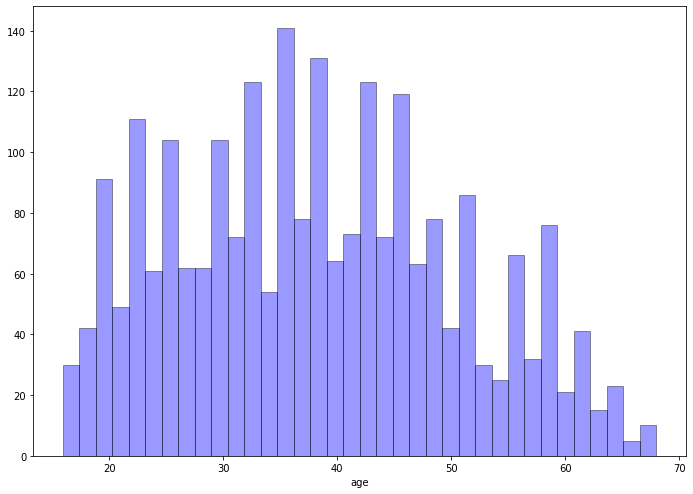

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


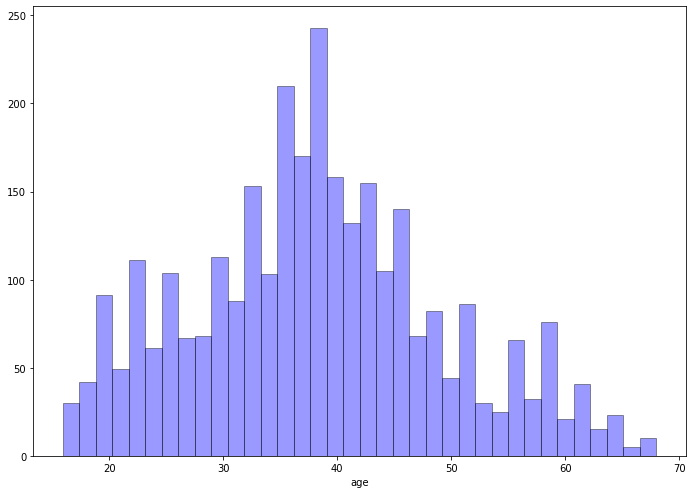

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Fnlwgt

In [ ]:
data = currentDirtyAdultsZS['fnlwgt'].values

outlier_index = ZS(data,0.095)
currentDirtyAdultsZS['fnlwgt'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-701884.2078258693, -1665045.722544307, 1002830.629979649, -8476377.595610421, -7538308.006969813, 5897346.00069435, -3914852.612659002, -3144674.30366508, -2685351.534925376, 9386101.749564024, -1522358.813294039, 3545150.2734567327, 2576087.3148127394, 9588566.185747825, 1001730.7335063108, -1969564.493676479, -9131541.44112026, 6589453.242014851, -6032794.201952636, -1095060.6000841567, 4550116.7019430585, 4496496.569393139, -8203530.124261906, -7992524.952755254, 516337.0, 2769734.2867074264, -9019403.414625632, 4821272.197748421, 6628278.287642223, 5870890.953479095, 2944707.5458057434, -2866326.453380864, -9356291.127441308, 3948126.979752734, -859780.5058474913, 5742565.195046695, 5138935.731025189, 1716022.7528102405, 7615486.651905949, -311812.2394107431, -3666263.465785512, 2315453.2533732937, -1197779.8246372882, 4753318.587042517, -274806.7623063754, -2557588.1052866867, 8611482.476755355, 6970919.758748422, -341748.7184314169, 7914394.367899658

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


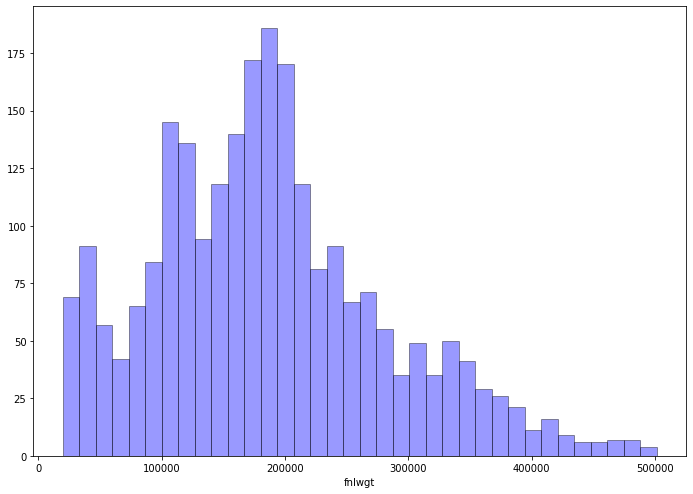

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


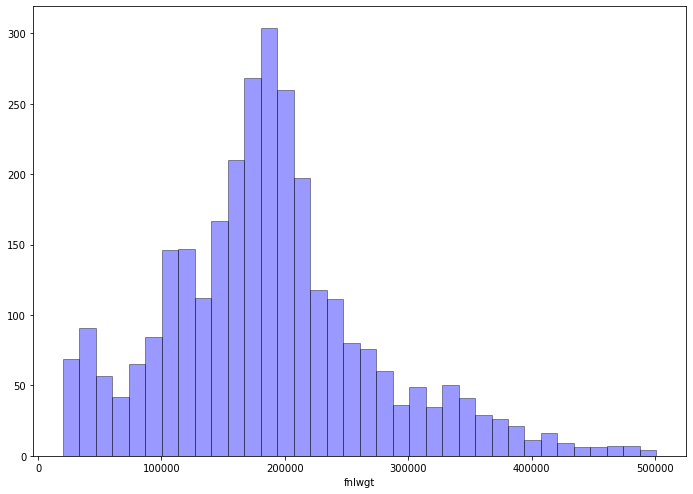

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Education-num

In [ ]:
data = currentDirtyAdultsZS['education-num'].values

outlier_index = ZS(data,0.12)
currentDirtyAdultsZS['education-num'].iloc[outlier_index] = np.NaN

The detected outliers are:  [24.316359330184717, 57.63369801882199, 156.16794481030806, 15.0, 3.0, -79.41160694911842, 4.0, -141.83867879603264, 139.27067914981276, -24.730046591228017, 84.54983920790495, 87.92496307989742, -75.09373043280337, -106.57608947122895, 72.9415911511032, 24.786973836187244, 15.0, 124.68125511547308, -57.46149960213789, 15.0, -55.499222945334125, -52.614434487567, 4.0, -91.33664242999524, 113.18155503780076, 15.0, 65.02199199363359, -86.43208927471119, -148.9758499820532, 45.19104213404782, -97.77202942800594, -126.66529456604484, 88.83712847714533, 158.9276955034912, -125.39981802708417, 103.25833178518904, -55.656882797368965, -30.07560504767345, -130.7282607290773, 148.0415487911323, -46.834524706965865, 16.0, -131.0456980724091, -16.544226469138806, 43.33412836292455, 105.17306927605684, 120.32672327384404, -115.45495686327686, 143.31842191350262, 4.0, 16.0, 4.0, -78.800558112097, 87.29227842781265, 88.33513673704644, 3.0, -136.78460640755318, 129.0234939

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


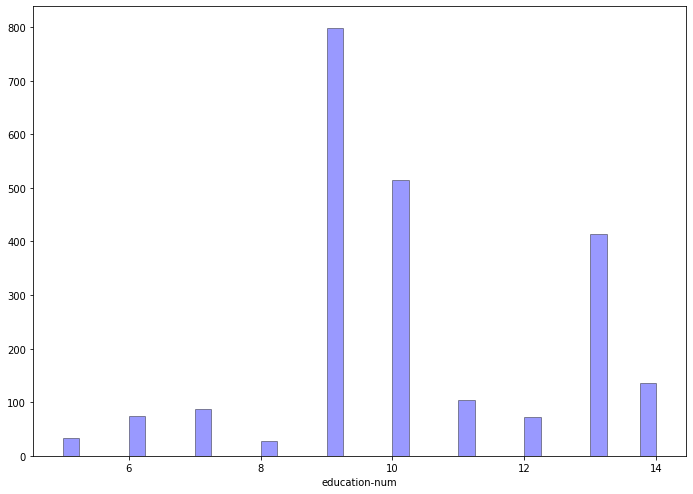

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


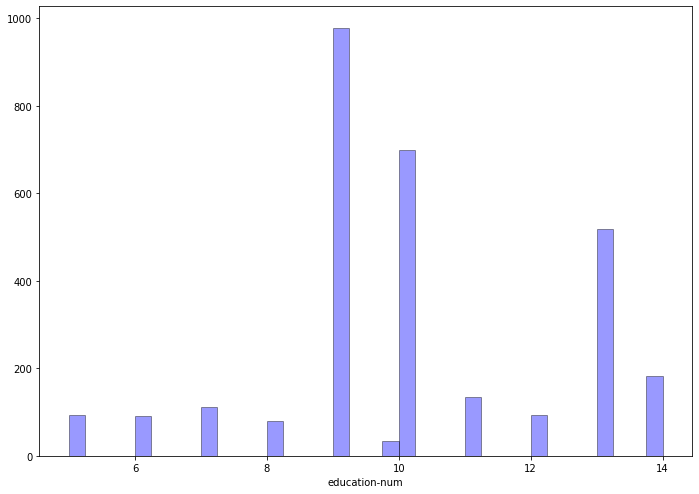

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

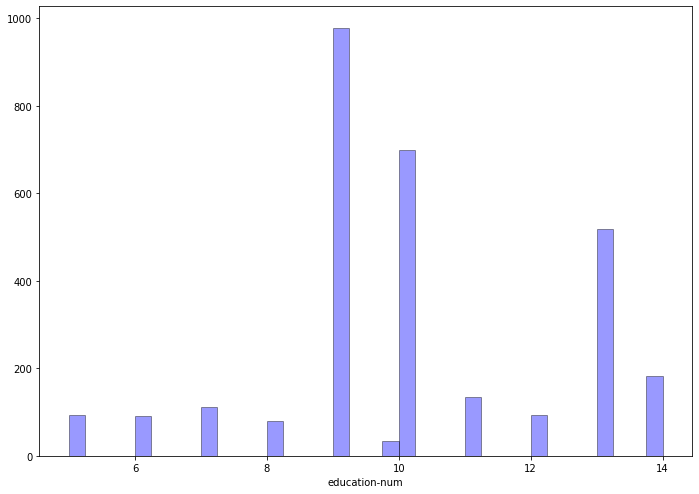

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-loss

In [ ]:
data = currentDirtyAdultsZS['capital-loss'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['capital-loss'].iloc[outlier_index] = np.NaN

The detected outliers are:  [28616.56750255143, -15325.068278917226, -12752.17243050414, -20568.700313263547, 13467.765743889837, 3889.774369019855, 1741.0, -278.0939279320446, -21043.243249625182, -10306.495720106976, 1848.0, 23339.30189373864, 27516.165732505007, 9111.44504154041, -11913.122844161066, 7112.37311596936, 9543.078271636412, 23037.40512531796, -7424.338434775851, 7247.609175935419, 24294.26560129379, 11790.73450655278, 8063.379200612429, 23756.21800769211, -21215.470754750528, 28640.00522588806, 15200.336273706593, -15204.918663603448, -983.9757027778652, -14167.71948756652, 16462.131776178074, 2870.892090726254, -24048.00038964505, -23743.616641966124, -3171.293523235156, 10218.959793824384, 14584.895059880626, -23188.45010949545, 14664.62506214367, 2179.0, -21645.727216286006, 29241.92256254328, 1762.0, 1579.0, 21052.761151543866, 22652.596551883187, 12211.354494311669, 3159.316219931744, 2823.5704499926524, 14621.495630167488, -21996.072042611464, 4474.924754840253, 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


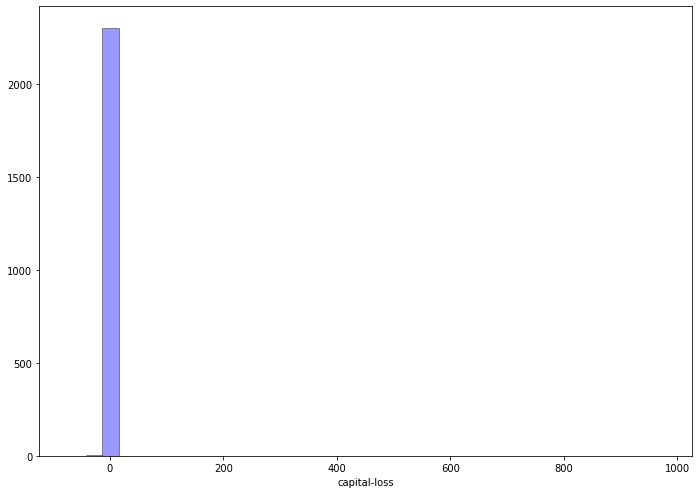

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-loss'] = currentDirtyAdultsZS['capital-loss'].mode()[0]

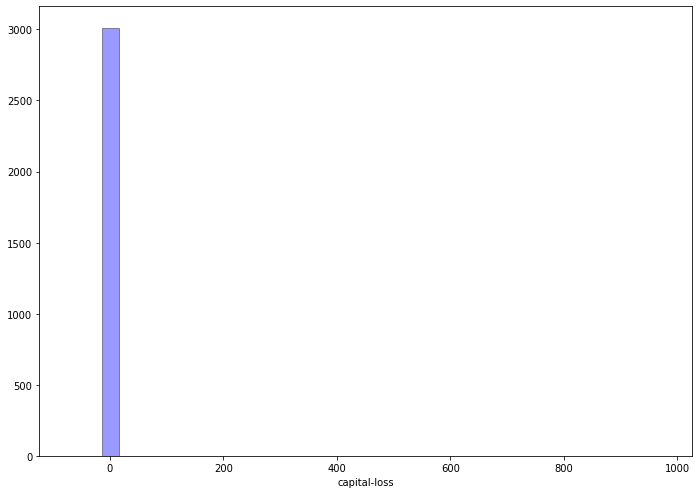

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-gain

In [ ]:
data = currentDirtyAdultsZS['capital-gain'].values

outlier_index = ZS(data,0.09)
currentDirtyAdultsZS['capital-gain'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-454825.4300294621, 521751.732405982, 846902.9907397144, 1074448.165939224, 775386.5263159055, 1056740.070944843, 1028714.9708713568, 725795.2725850301, -413577.3085225198, -600522.2937953402, -558501.6968650017, 393927.3496392585, 492195.2153134676, 929309.7294144912, 99999.0, 315290.1915230104, 168715.3756619977, 128885.7551146628, 598431.2894002115, -14678.970836752094, 315314.2601177619, -655108.8936810766, 216361.73011952487, 343012.6430665964, 136543.06660990487, 474194.3736479416, -557233.1733574781, 99999.0, -802067.7495822577, 496731.8914993612, -773790.4381466466, -531545.1264461388, -568346.946650082, -93858.90456691828, -300986.1815573338, 324875.71427869087, 856144.8702943401, -389936.8802839924, 1061471.6283469158, 748624.710064626, 637859.5973765556, -72286.77991142333, -670511.4960391913, -908415.7913667496, 809550.7604126438, -401769.4061133861, 976862.1953010344, -129608.81018659286, 365540.640127516, 219607.59580922464, 286615.8590811071,

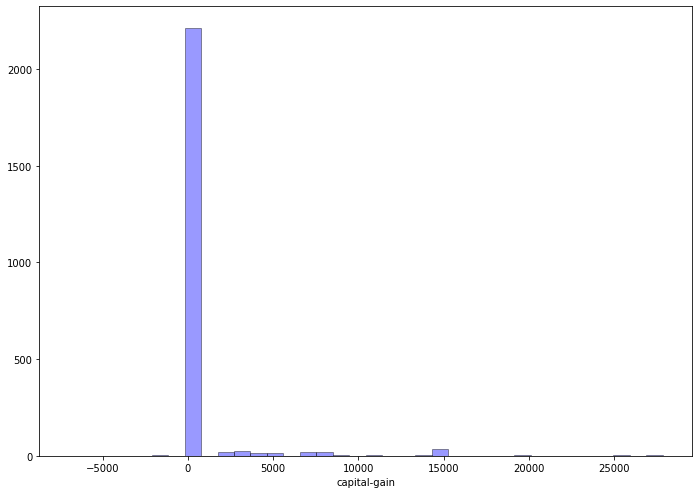

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-gain'] = currentDirtyAdultsZS['capital-gain'].mode()[0]

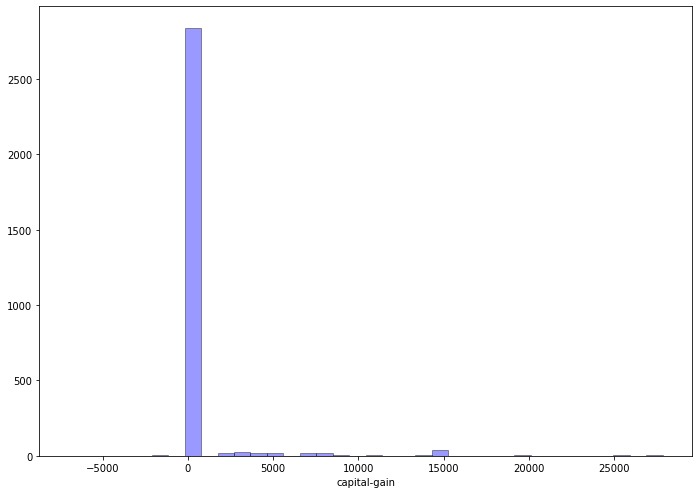

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Hours-per-week

In [ ]:
data = currentDirtyAdultsZS['hours-per-week'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['hours-per-week'].iloc[outlier_index] = np.NaN

The detected outliers are:  [926.4031772355823, 289.4343125154478, -623.0660404347367, 19.0, 84.0, 204.4471591562836, 771.6358739427383, 12.0, 940.4805355436768, 547.5764169669367, 376.9360298221449, 132.15534917356538, 1003.3567219465956, 915.735124020804, 458.2386246544588, -284.2031813540606, 18.0, 171.70540990191745, 436.6165564483949, 85.0, -644.0924962249821, 175.2691222361958, 72.0, 819.820804031733, 539.5540231589123, -911.264979355017, 72.0, -598.7421658878368, 3.0, 15.0, 91.0, -488.4904037219378, -724.19670013664, 150.91975137710824, 158.59687803633958, 12.0, 18.0, -557.7134808670853, -780.7795561001686, -289.48145729456303, 156.64726034106474, -637.6229019653624, -347.1590830534101, -768.9264241002309, -653.6377638089905, 84.0, -403.1512515765352, -638.6329662563564, 75.0, -890.8205693142795, 374.18703237943015, -914.2344841050432, 72.0, 15.0, 699.7342996239928, -104.04989705853244, 16.0, 838.0328155135895, 615.7192902236469, -658.932748529705, 937.6904263690108, 291.1355496

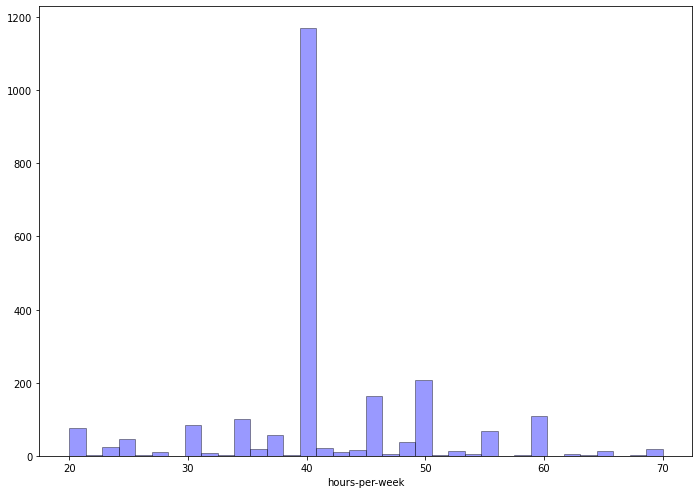

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


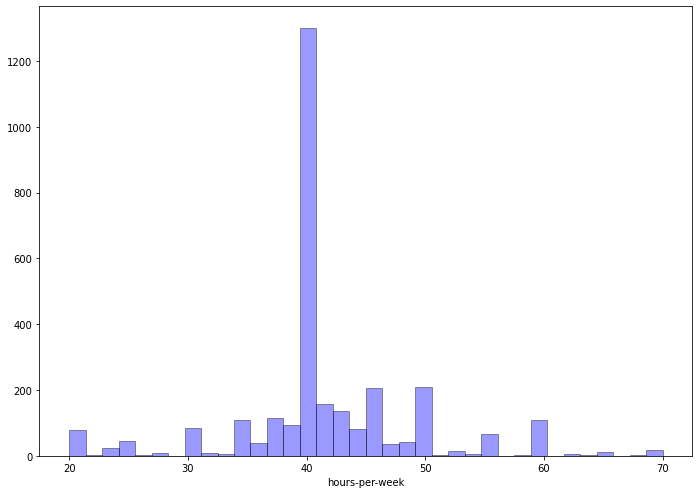

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})



### KNN



In [ ]:
# Dataset to clear

currentDirtyAdultsKNN = dirty_adults[3].copy()

Age

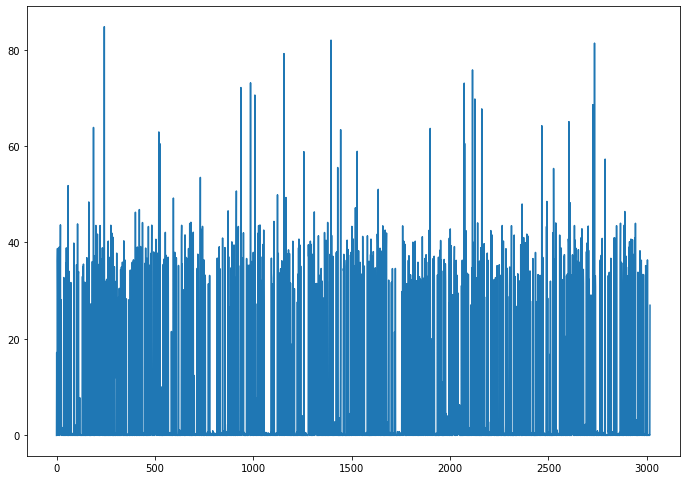

In [ ]:
Xval = currentDirtyAdultsKNN['age'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

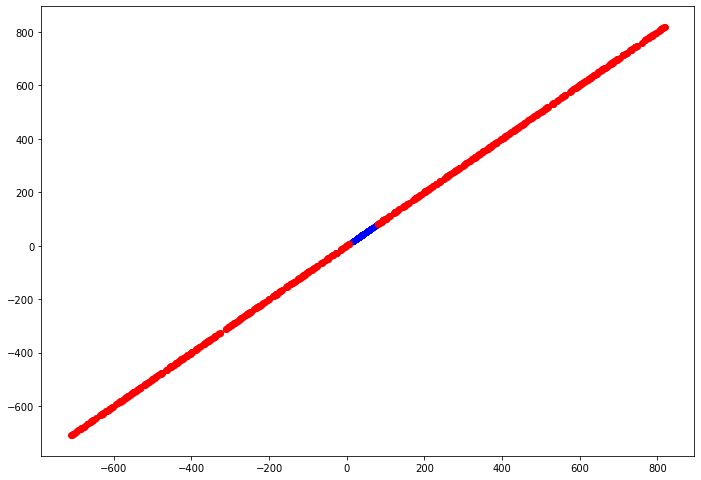

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 9)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["age"], outlier_values["age"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['age'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


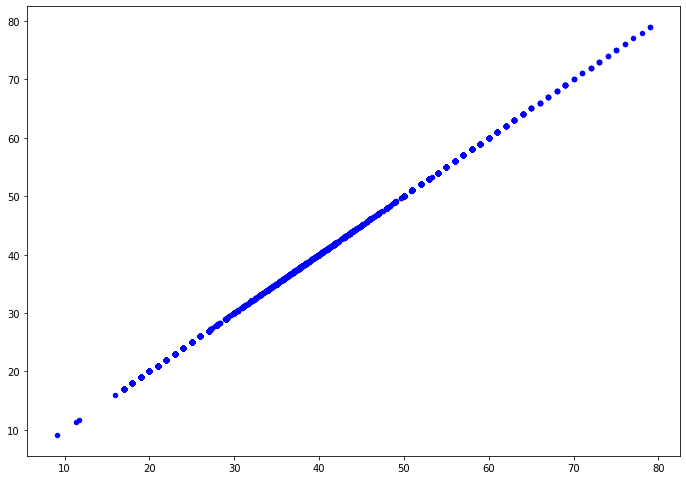

In [ ]:
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

Fnlwgt

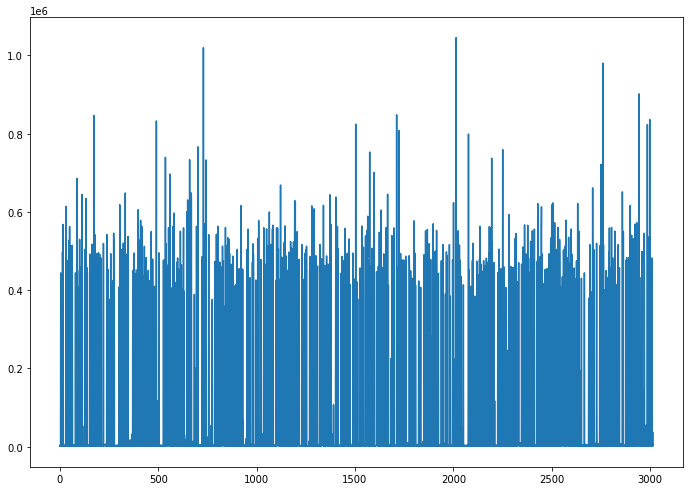

In [ ]:
Xval = currentDirtyAdultsKNN['fnlwgt'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

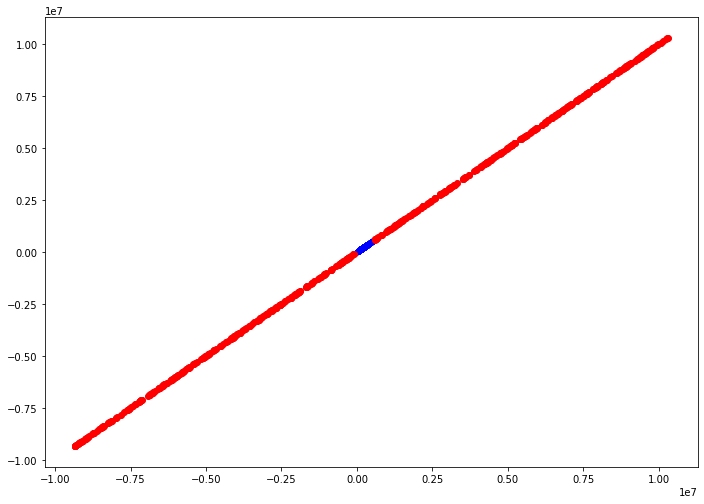

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 100000)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["fnlwgt"], outlier_values["fnlwgt"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['fnlwgt'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


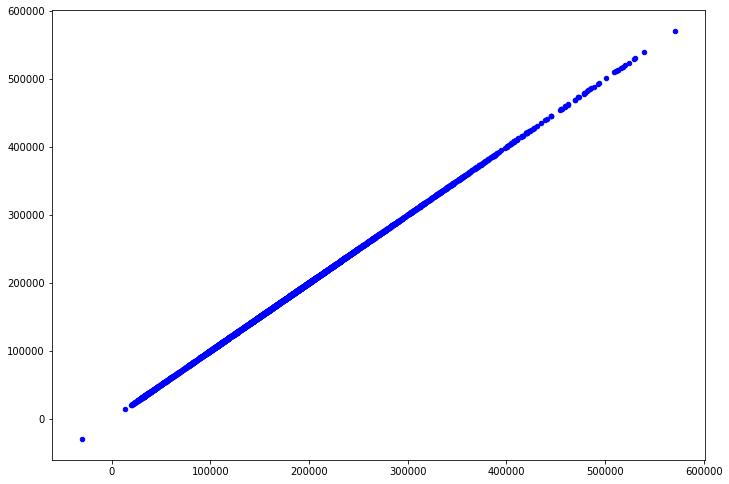

In [ ]:
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

Education-num

<ipython-input-536-3698d60971bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xval["education"] = lb.fit_transform(Xval['education'])


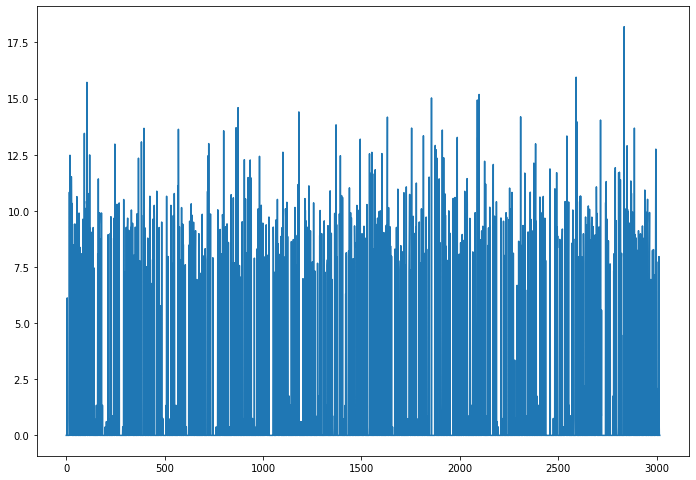

In [ ]:
Xval = currentDirtyAdultsKNN[['education-num', 'education']]
Xval["education"] = lb.fit_transform(Xval['education'])
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

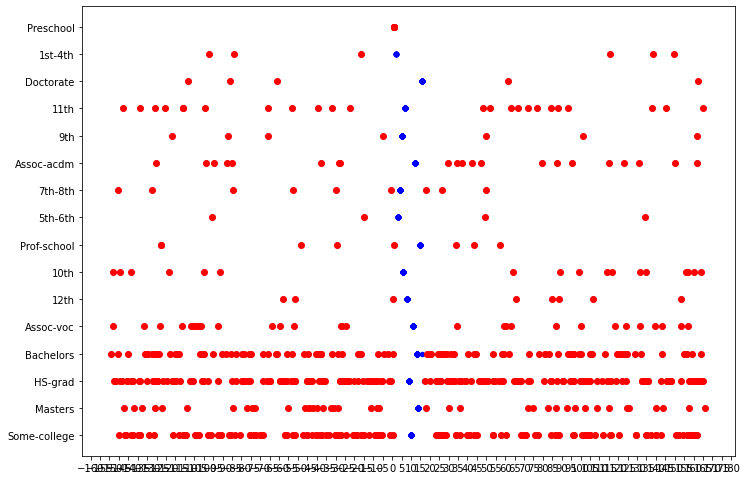

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 2.3)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# plot data
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["education-num"], outlier_values["education"], color = "r")

In [ ]:
# impute values for outliers
currentDirtyAdultsKNN['education-num'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


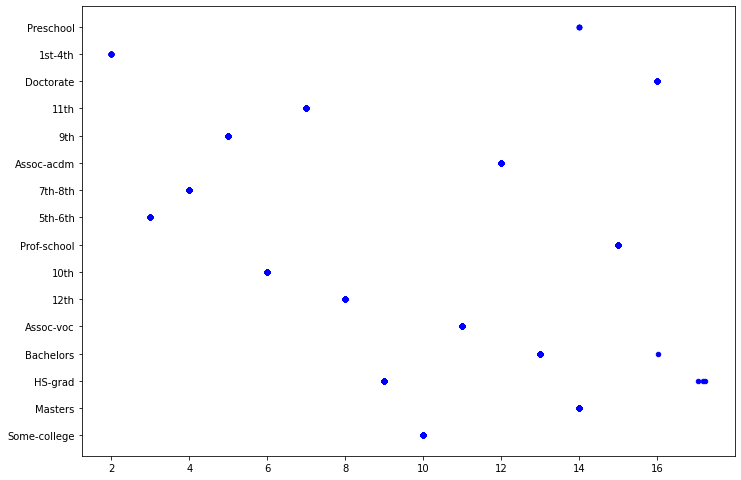

In [ ]:
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

Capital-loss

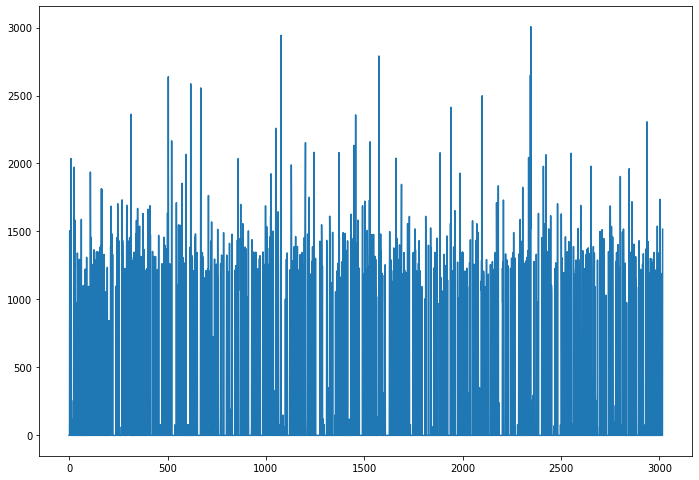

In [ ]:
Xval = currentDirtyAdultsKNN['capital-loss'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

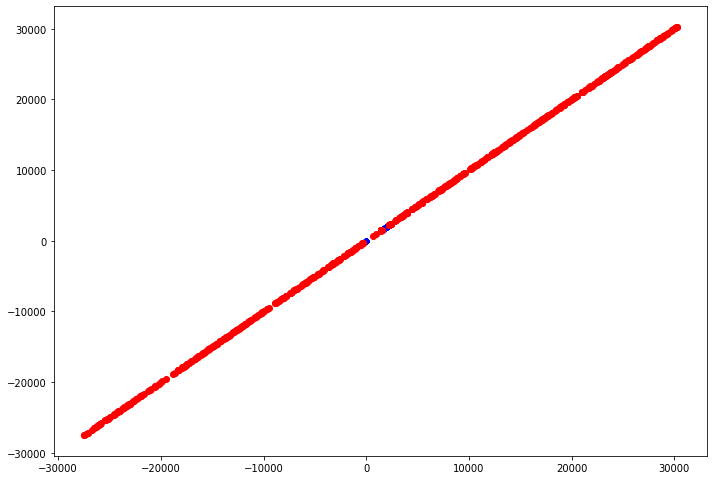

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 200)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-loss"], outlier_values["capital-loss"], color = "r")

In [ ]:
# imputation with the mode of the capital-losses

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-loss'] = currentDirtyAdultsKNN['capital-loss'].mode()[0]

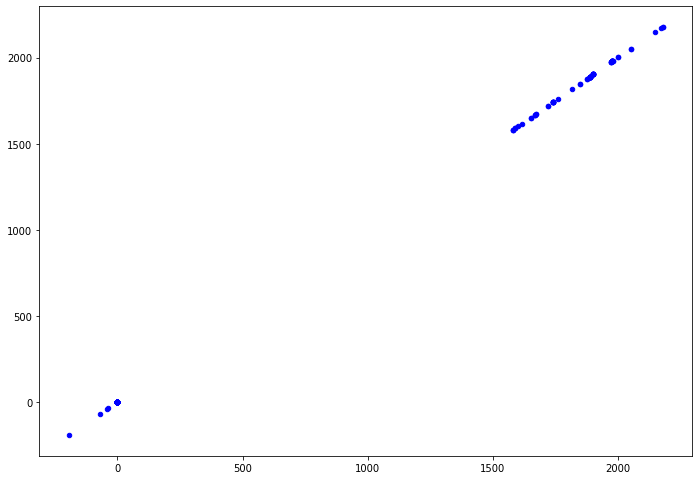

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

Capital-gain

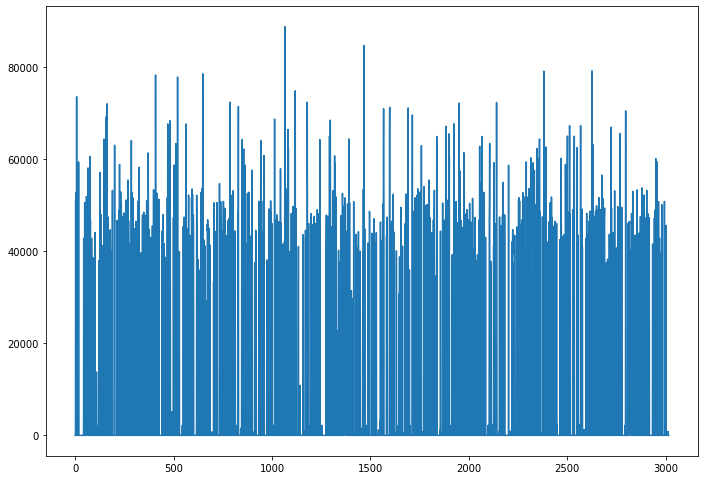

In [ ]:
Xval = currentDirtyAdultsKNN['capital-gain'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

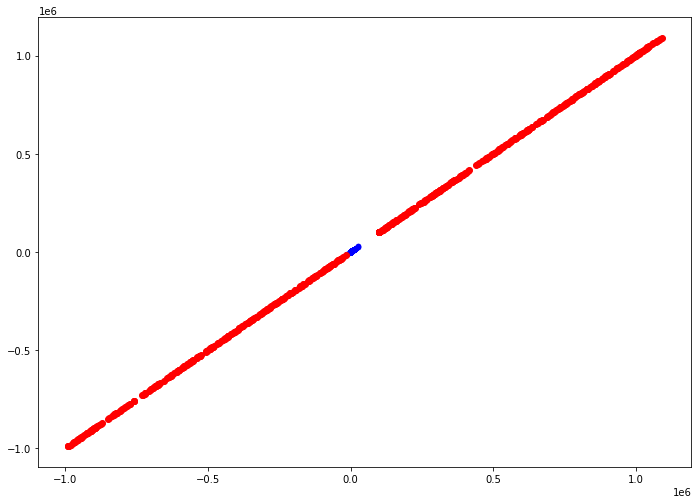

In [ ]:
#find the outliers 

outlier_index = np.where(distances.mean(axis = 1) > 13500)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-gain"], outlier_values["capital-gain"], color = "r")

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-gain'] = currentDirtyAdultsKNN['capital-gain'].mode()[0]

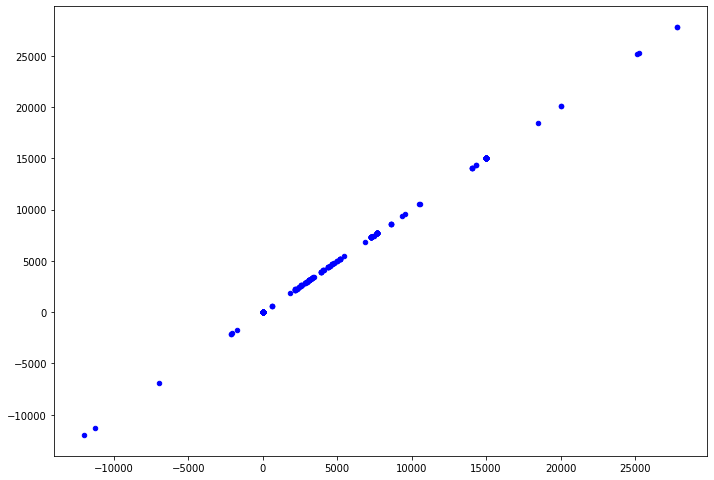

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

Hours-per-week

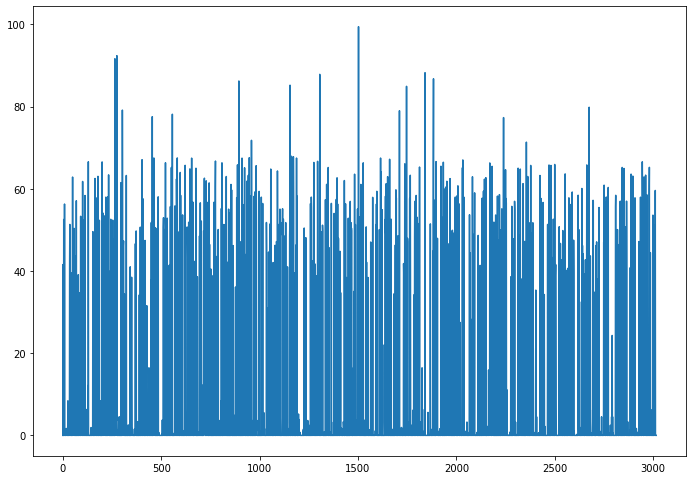

In [ ]:
Xval = currentDirtyAdultsKNN['hours-per-week'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

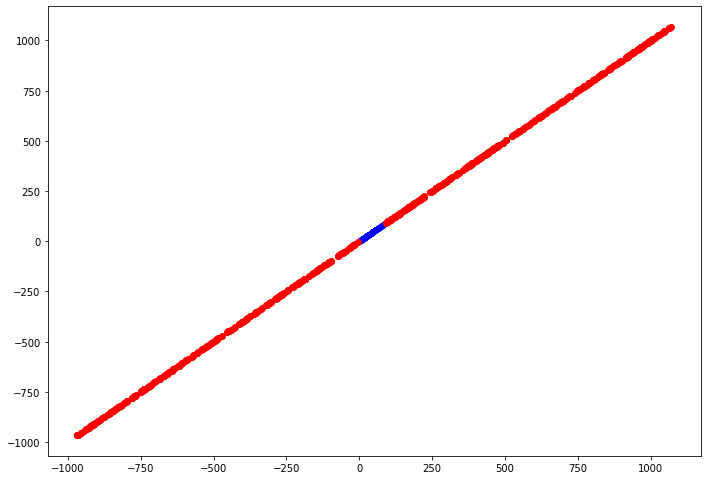

In [ ]:
#find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 12)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["hours-per-week"], outlier_values["hours-per-week"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['hours-per-week'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


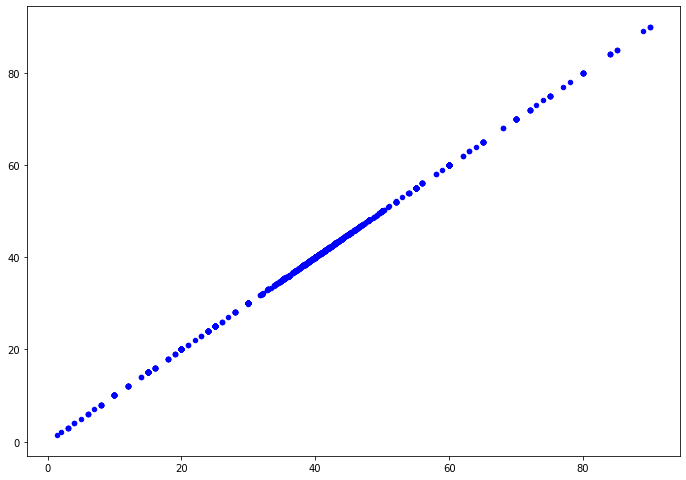

In [ ]:
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

### ML algorithm after outlier detection

Z-Score

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsZS)

In [ ]:
# evaluate ZS with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8137222406363938
Recall   : 0.4702774108322325
Precision: 0.688588007736944
F1 score : 0.5588697017268446


In [ ]:
# evaluate ZS with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.9171362280411004
Recall   : 0.8612945838837517
Precision: 0.8180677540777918
F1 score : 0.8391248391248392


KNN

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsKNN)

In [ ]:
# evaluate KNN with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8213457076566125
Recall   : 0.4134742404227213
Precision: 0.7671568627450981
F1 score : 0.5373390557939914


In [ ]:
# evaluate KNN with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.9294000662910176
Recall   : 0.8718626155878467
Precision: 0.8505154639175257
F1 score : 0.8610567514677104


## Accuracy 90%

### ML algorithm before outlier detection

In [ ]:
X_train, y_train = adultsSplitML(dirty_adults[4])

In [ ]:
# evaluate with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.7487570434206166
Recall   : 0.001321003963011889
Precision: 0.3333333333333333
F1 score : 0.002631578947368421


In [ ]:
# evaluate with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.9317202519058667
Recall   : 0.8586525759577279
Precision: 0.8678237650200267
F1 score : 0.8632138114209827




### Z-Score



In [ ]:
currentDirtyAdultsZS = dirty_adults[4].copy()

Age

In [ ]:
data = currentDirtyAdultsZS['age'].values

outlier_index = ZS(data,0.28)
currentDirtyAdultsZS['age'].iloc[outlier_index] = np.NaN

The detected outliers are:  [524.4614651878144, -449.8490488640424, 705.7750277497629, -605.1028155575425, 572.6590932484559, -75.92534696443761, -519.5068307698207, 158.58188567584148, 518.4799057306452, -438.5090250292544, 208.94006584793027, 374.1233813590232, -616.7598380871527, -245.4591437836155, 98.45476914945034, -19.301531232347543, 314.4292662151596, -489.6686956900752, -159.8023810862785, -651.2298705599554, 440.79912910650825, -180.3789215707432, 377.3143218707576, -567.355751421562, -123.56843395154168, -444.3142365329164, 80.0, -300.74730661340385, 84.0, -8.042365407943521, 397.2347172605148, 453.7112824156454, -34.95912984272684, 757.7029775691822, 350.7606795793108, 241.0264094886761, -456.7513215564045, 599.9634968208566, -283.5300497072547, 661.8609199972361, -51.00148549955759, 131.07111907067048, 143.6934929522023, 150.55341032164037, 796.9630795821321, 318.7124840203992, 473.8898107123929, 544.0554629760957, 80.0, -244.76878162754133, -621.6809318824036, 357.527186

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


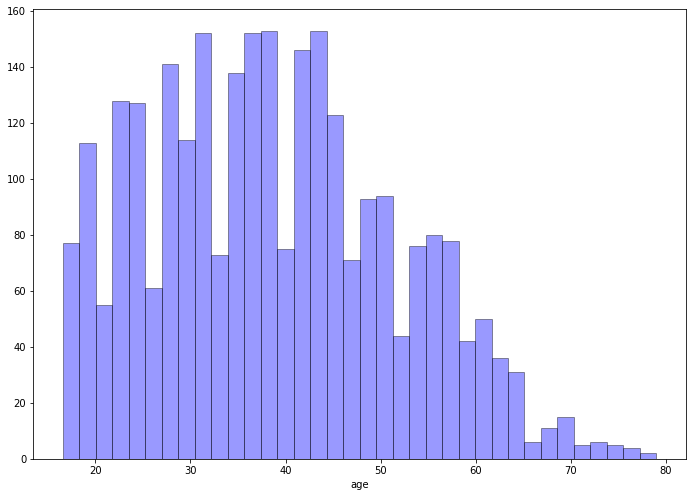

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


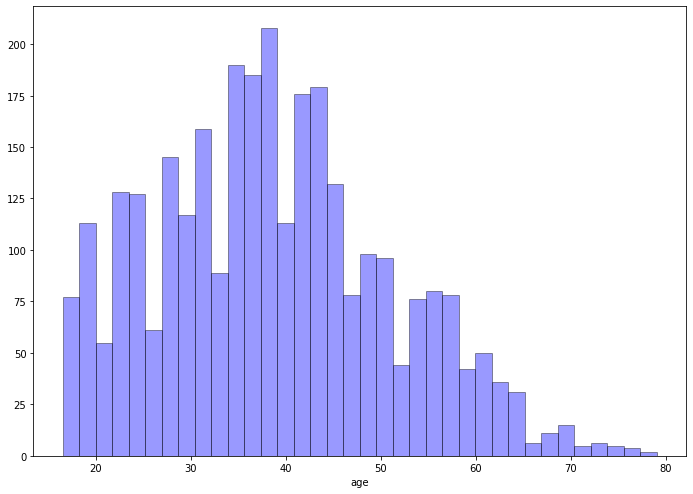

In [ ]:
sns.distplot(currentDirtyAdultsZS['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Fnlwgt

In [ ]:
data = currentDirtyAdultsZS['fnlwgt'].values

outlier_index = ZS(data,0.095)
currentDirtyAdultsZS['fnlwgt'].iloc[outlier_index] = np.NaN

The detected outliers are:  [36539.0, 24872.0, 49715.0, 3662065.0915033207, 48055.0, -1184366.9847333478, 25631.0, -5272541.536064144, 55395.0, 3018575.189117823, 8701533.299167575, 26999.0, 27067.0, 90127.0, 91547.0, 1844868.6890471024, 2834753.51577051, -4998548.614046755, 91501.0, 68781.0, 84648.0, 8344088.669160355, 70623.0, 90042.0, 5388424.850301308, 75227.0, 5449033.851049074, 82815.0, 516337.0, -8488873.44124502, 36592.0, 2435603.3906876417, -5644392.051875681, -1789056.3302798085, 473547.0, -5329512.962360209, 9666538.637570878, 75742.0, 8496199.220228221, 6680773.326621377, 43003.0, 9475613.003213942, 45891.0, 55508.0, 93415.0, 29591.0, 2195556.478766742, -2464641.482209468, -2639728.9369364865, 42900.0, -8278824.021837553, 45093.0, 36209.0, -3530540.9055734137, -1257890.929832752, 7987766.612839197, 4758091.843109382, -3481216.458930551, 37250.0, 21792.0, 4969681.432327348, 8898668.45677074, 32528.0, 493034.0, 459189.0, -5353848.346159392, 20101.0, -7204718.347797659, 66434.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


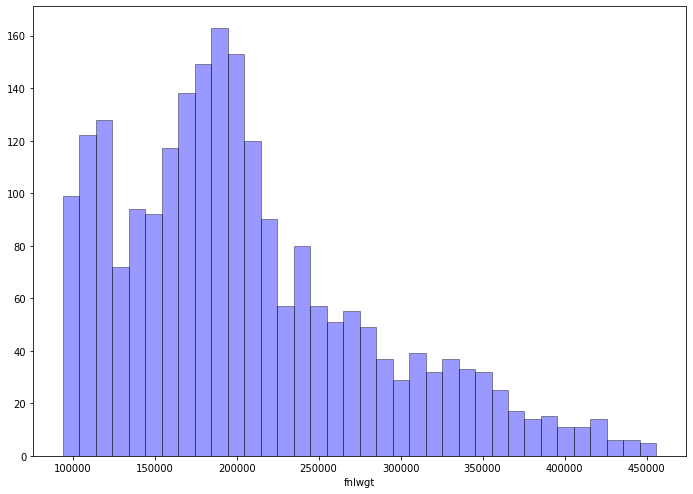

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


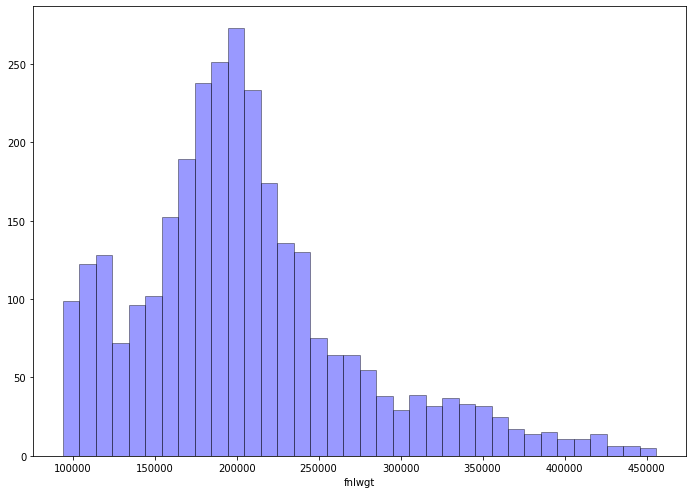

In [ ]:
sns.distplot(currentDirtyAdultsZS['fnlwgt'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Education-num

In [ ]:
data = currentDirtyAdultsZS['education-num'].values

outlier_index = ZS(data,0.14)
currentDirtyAdultsZS['education-num'].iloc[outlier_index] = np.NaN

The detected outliers are:  [-136.8906387424936, -45.70778766657148, -53.28720291190331, -71.07054127332378, 15.0, 3.0, 128.0196971220209, 37.73790196749851, -110.7538469958316, 5.0, 158.92827742939292, 15.0, -82.84483636398467, -66.08308131490988, 15.0, 141.52239747210098, 4.0, 4.0, -37.40345376604046, 82.9216400506407, -131.71276352695682, -122.19253221118892, 153.70934932485082, -39.928460816102486, 16.0, 40.36816016223115, 2.0, 5.0, 72.99726445118436, 4.0, -21.953282457531444, 16.0, -13.99409783911085, -147.94650366164208, -24.840863513929197, -148.9187106281905, 3.0, 5.0, 164.74013256675377, 15.0, -28.27131024602357, 4.0, -86.37628255963935, 149.83904427421746, 17.125501297945398, 54.47220999390167, -17.045765659714363, -78.57417439935539, 80.3910468605005, -12.869892101267284, 15.0, -135.24678388510003, 3.0, 4.0, -87.0134868872799, 5.0, 136.79475309302603, 5.0, 133.724504663657, 16.0, -7.179223643886331, 2.0, 15.0, 16.0, 110.27154491469943, 28.766118595910108, -63.68639197509482,

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


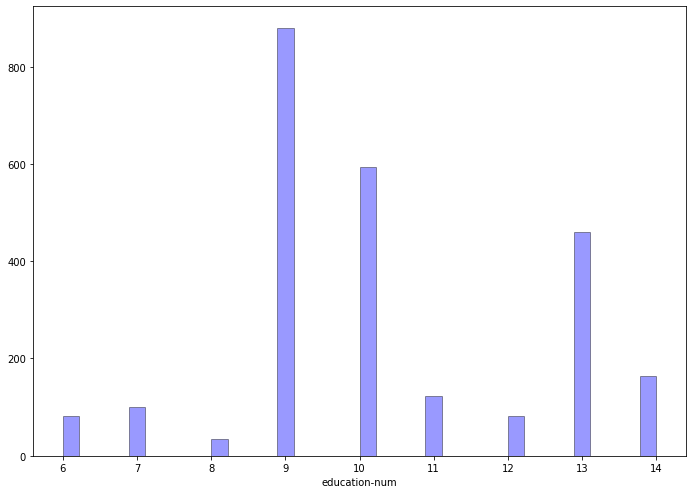

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


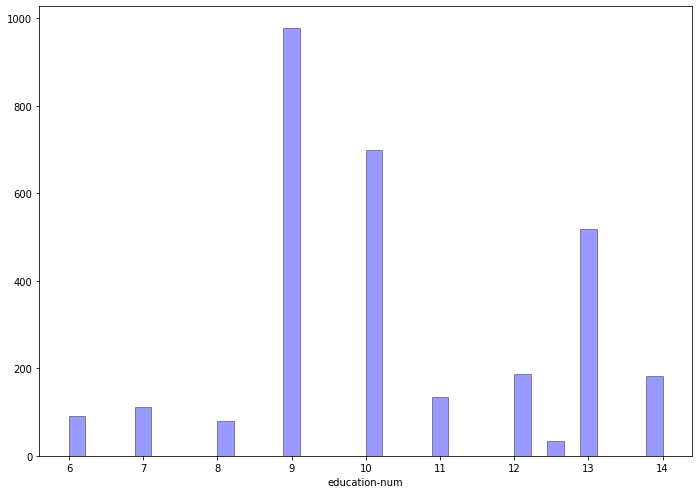

In [ ]:
sns.distplot(currentDirtyAdultsZS['education-num'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-loss

In [ ]:
data = currentDirtyAdultsZS['capital-loss'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['capital-loss'].iloc[outlier_index] = np.NaN

The detected outliers are:  [14343.715232498616, 22745.878010039345, 1741.0, -21325.799601594663, -13781.12319849921, -24129.458689746916, 26561.093840032445, -8521.704591721467, 3831.198859415853, -15228.8702060735, -10899.70780277237, 2051.0, -19432.75701732592, 2258.0, 2179.0, -27099.201475782455, 1762.0, 1579.0, 21532.026756961644, 5473.522262856868, 16429.56368748517, 26938.729143210043, -19637.60317819505, 4542.5934482817065, 10151.911587698993, 13326.519555978502, -1481.875691980822, -6534.480633914565, -23794.64577883117, -24127.12146806396, 1617.0, 2149.0, 1848.0, 1902.0, 1977.0, -223.4268638285212, 2258.0, 2754.0, 1887.0, 9524.07495799215, -15468.192487587565, -21450.916063660665, 1887.0, -11486.765379438968, 1887.0, -4718.211884813529, 1887.0, 14250.958057859436, -23667.41378079288, 1902.0, 13070.980114250717, 16045.38456671317, 1977.0, -13124.09844130882, -5635.8547482816175, -559.2916696499233, 2258.0, -22674.483301182976, 1876.0, 29318.07578549985, 16023.1359687135, 2002.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


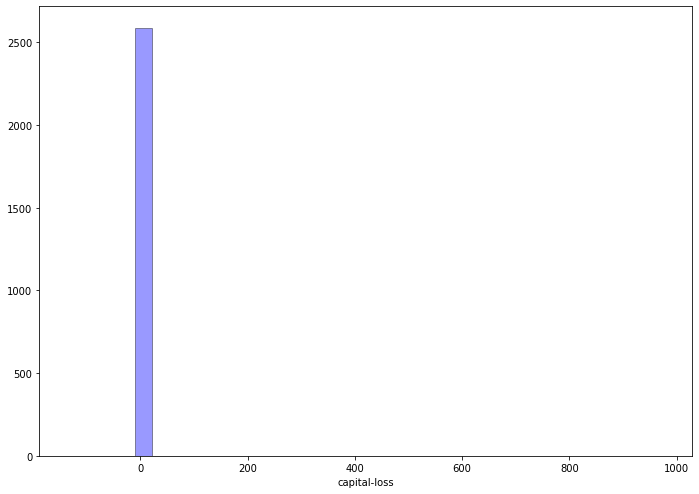

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-loss'] = currentDirtyAdultsZS['capital-loss'].mode()[0]

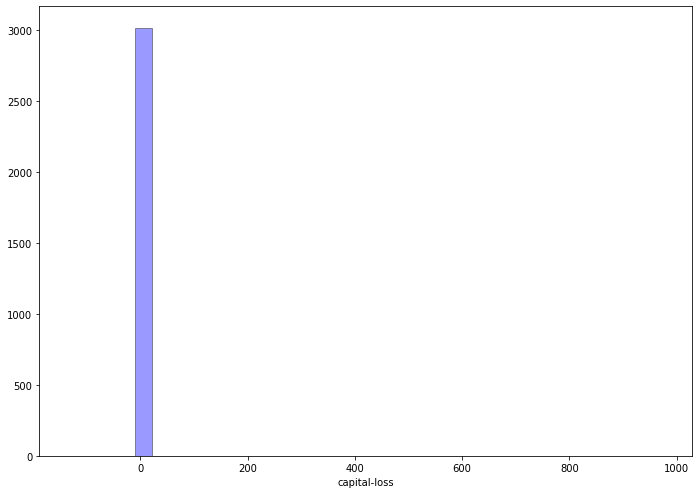

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-loss'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Capital-gain

In [ ]:
data = currentDirtyAdultsZS['capital-gain'].values

outlier_index = ZS(data,0.09)
currentDirtyAdultsZS['capital-gain'].iloc[outlier_index] = np.NaN

The detected outliers are:  [736403.1195956648, -280789.9857441047, 322407.81345246953, -302656.12641707365, 389227.5916652549, 1022930.9083206218, 953971.21989782, 770368.5148042298, -394506.0919673034, 99999.0, 811448.3477808875, -232390.9106127331, -287412.9165133084, 417955.1117496772, 776232.0283642423, 99999.0, 517825.93730931386, -940133.6349124603, 595557.6397467842, -325772.73172345967, 167107.7723131894, 535123.3591806712, -121770.25355531054, 975181.6600875332, 604727.2677915801, -522298.16375936026, -439900.6627115557, -788293.0304271525, 812486.8561215121, 428488.2269841427, 229905.5629562949, -283289.40339509747, 99999.0, -609181.982938451, 163470.50085781363, 824565.6121945968, 1006828.1693248616, 687309.5948829432, 147888.4948457051, 581250.5498587049, 142758.13895319143, 182660.30906875493, 99999.0, -98615.73294960358, 222711.8627293417, 268216.8075287619, -840387.8824356387, -177095.98869004834, -247260.65005092835, -444032.88511372136, -199221.72898923335, 99999.0, -

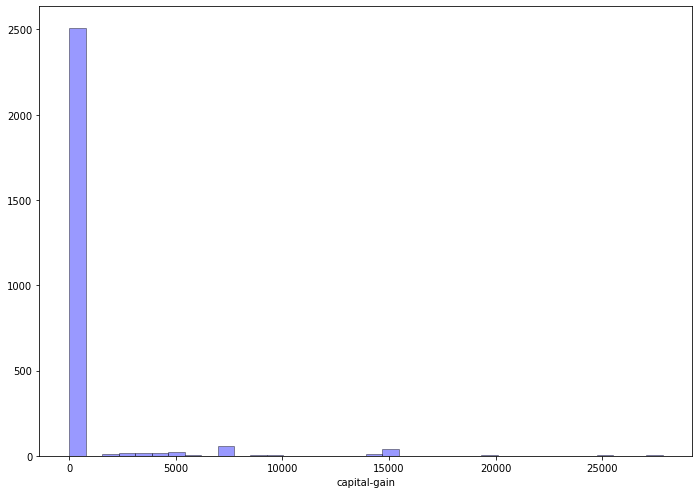

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsZS.loc[i,'capital-gain'] = currentDirtyAdultsZS['capital-gain'].mode()[0]

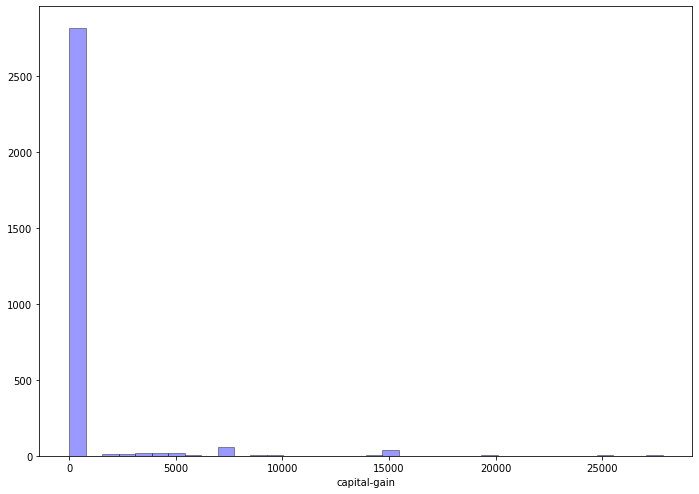

In [ ]:
sns.distplot(currentDirtyAdultsZS['capital-gain'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Hours-per-week

In [ ]:
data = currentDirtyAdultsZS['hours-per-week'].values

outlier_index = ZS(data,0.1)
currentDirtyAdultsZS['hours-per-week'].iloc[outlier_index] = np.NaN

The detected outliers are:  [65.0, -464.5388786507327, 336.72240833647265, -89.24337891143898, 19.0, -781.5362079583274, 84.0, 504.8998040564264, 12.0, -912.619930589552, -498.8561366978024, 215.41604762206936, 965.9791758130618, -183.08075501764108, 70.0, 20.0, 359.93608877881354, 492.6905069890212, 741.9203587927526, -496.7375372913368, 1024.4211807243423, 18.0, 85.0, 72.0, 800.4158352673786, 20.0, 178.9378462995009, 72.0, 3.0, 20.0, 15.0, 820.1307293858713, 91.0, 458.01129171963646, 337.5417790392321, 62.0, 868.2619998427787, -307.7760340262914, 65.0, 20.0, 699.5293665863276, 18.0, -604.9107072368114, -705.0629859441328, 84.0, 75.0, -737.7331507524336, 22.0, 72.0, 15.0, -657.2656827445752, 16.0, 989.1890375900974, 10.0, -642.4849922102233, 186.13207656879592, 20.0, 898.2103828306026, -284.09109407625715, 437.5803208472153, 763.2877429640218, 1053.8335784850478, 10.0, 975.9078455602992, 70.0, -173.07240431444734, -756.9613259006429, 75.0, -694.1775880592525, 12.0, 20.0, -958.51595618

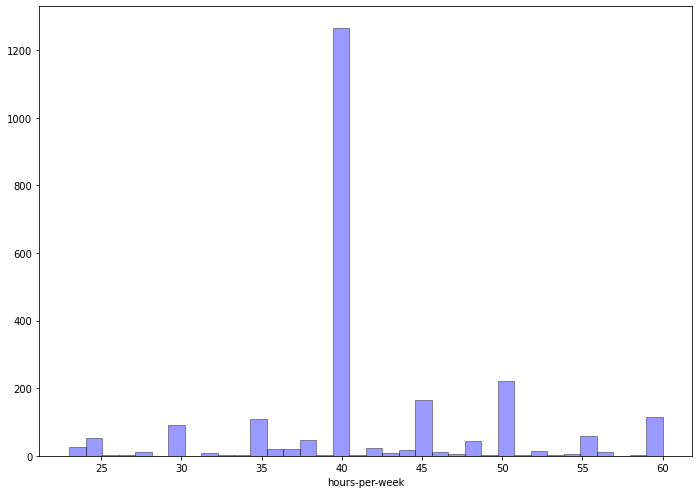

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
# impute values for outliers

dfNoString = adultsNoString(currentDirtyAdultsZS)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsZS["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


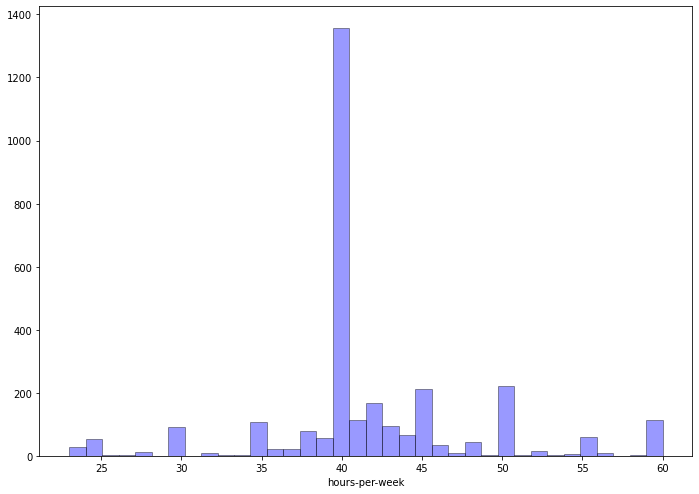

In [ ]:
sns.distplot(currentDirtyAdultsZS['hours-per-week'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})



### KNN



In [ ]:
# Dataset to clear

currentDirtyAdultsKNN = dirty_adults[4].copy()

Age

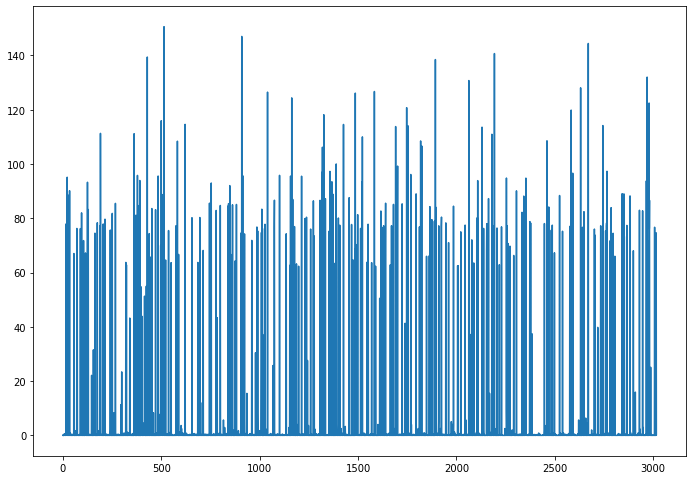

In [ ]:
Xval = currentDirtyAdultsKNN['age'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

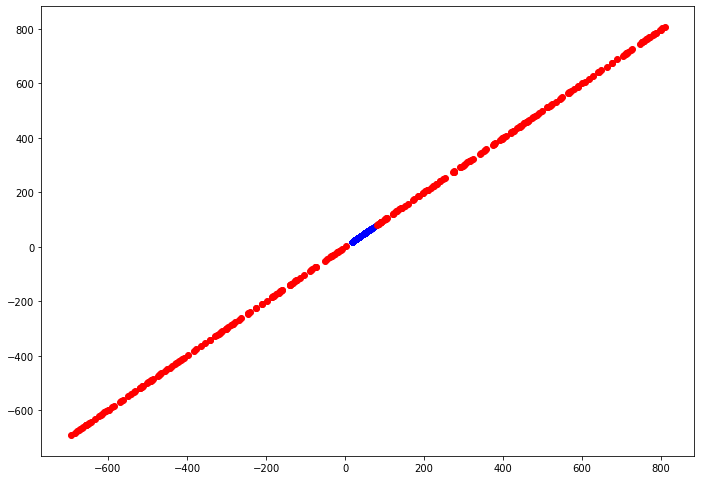

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 9)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["age"], outlier_values["age"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['age'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["age"] = df_mice["age"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


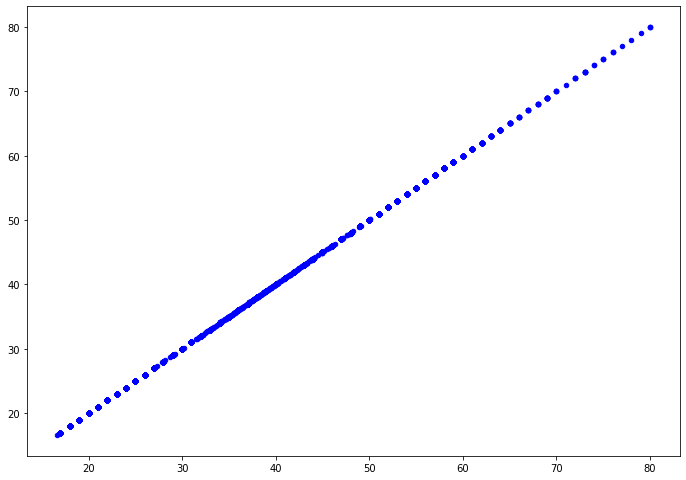

In [ ]:
plt.scatter(currentDirtyAdultsKNN["age"], currentDirtyAdultsKNN["age"], color = "b", s = 20)

Fnlwgt

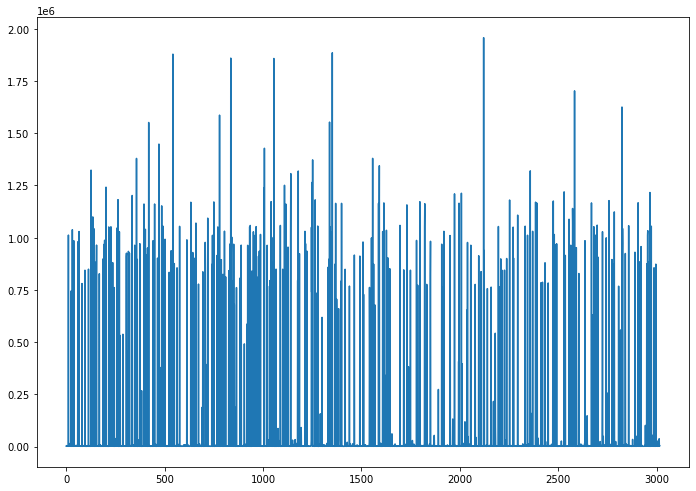

In [ ]:
Xval = currentDirtyAdultsKNN['fnlwgt'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)
# fit model
nbrs.fit(Xval)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

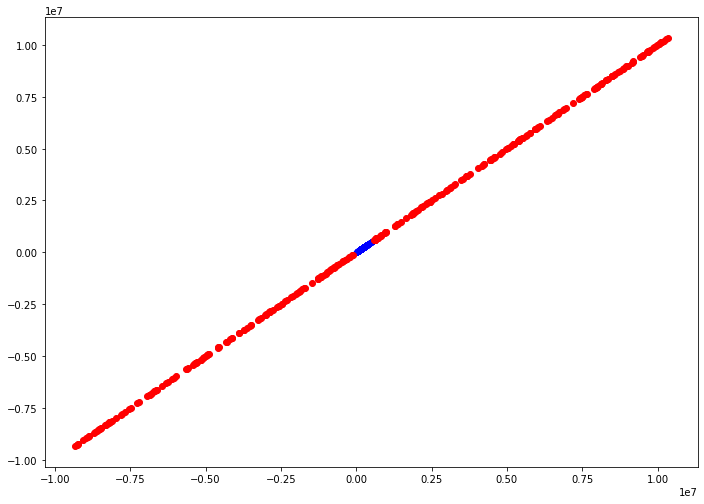

In [ ]:
# find the outliers
outlier_index = np.where(distances.mean(axis = 1) > 100000)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["fnlwgt"], outlier_values["fnlwgt"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['fnlwgt'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["fnlwgt"] = df_mice["fnlwgt"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


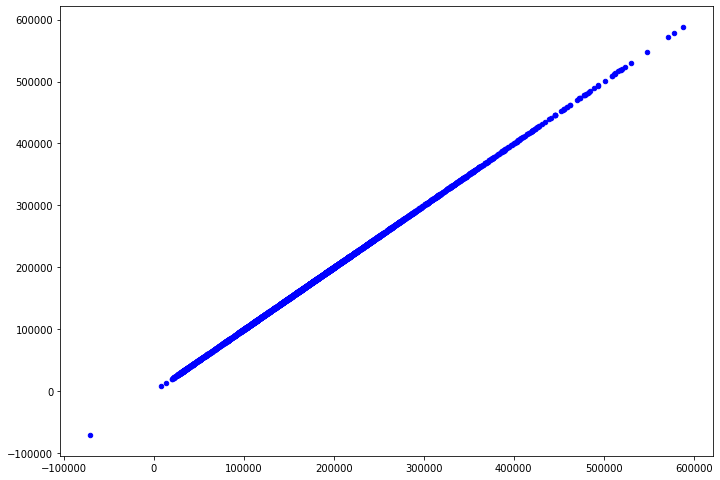

In [ ]:
plt.scatter(currentDirtyAdultsKNN["fnlwgt"], currentDirtyAdultsKNN["fnlwgt"], color = "b", s = 20)

Education-num

<ipython-input-595-3698d60971bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xval["education"] = lb.fit_transform(Xval['education'])


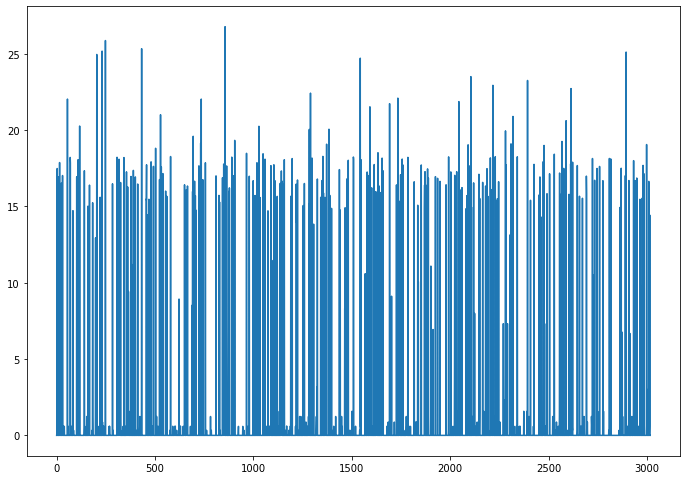

In [ ]:
Xval = currentDirtyAdultsKNN[['education-num', 'education']]
Xval["education"] = lb.fit_transform(Xval['education'])
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

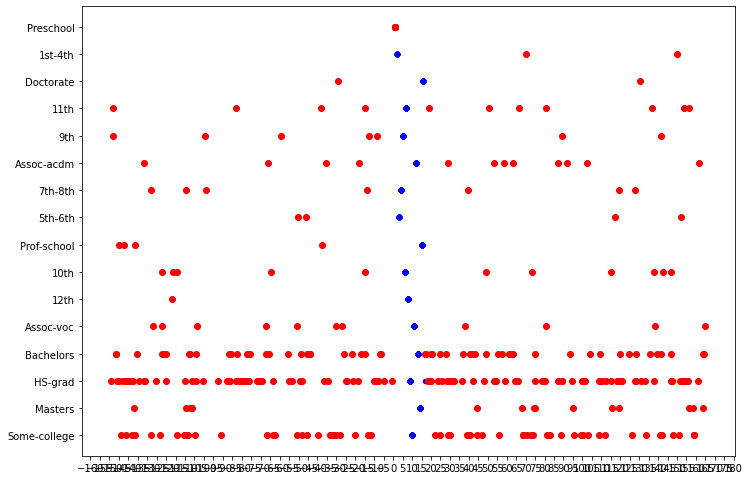

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 2.3)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# plot data
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["education-num"], outlier_values["education"], color = "r")

In [ ]:
# impute values for outliers
currentDirtyAdultsKNN['education-num'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
dfNoString = dfNoString[["education", "education-num"]]
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["education-num"] = df_mice["education-num"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


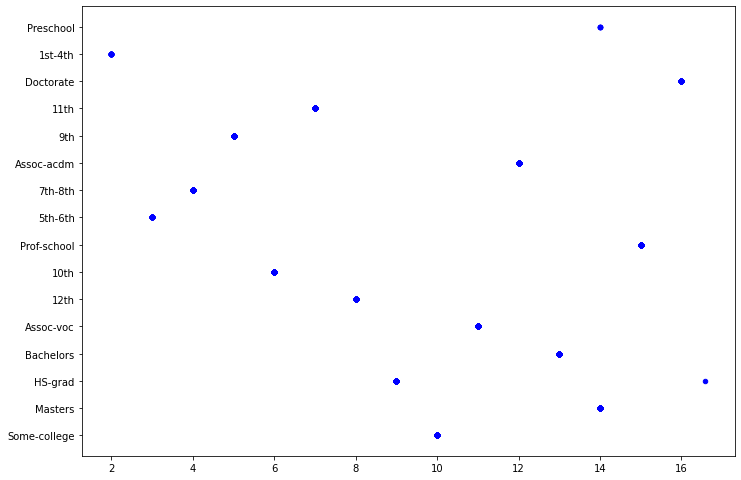

In [ ]:
plt.scatter(currentDirtyAdultsKNN["education-num"],currentDirtyAdultsKNN["education"], color = "b", s = 20)

Capital-loss

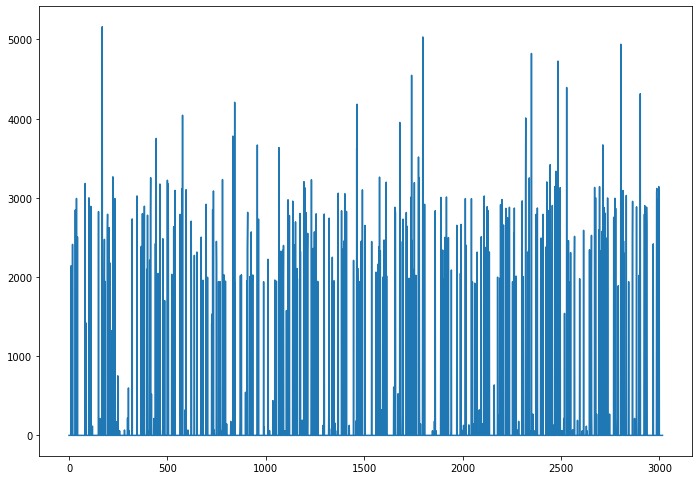

In [ ]:
Xval = currentDirtyAdultsKNN['capital-loss'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

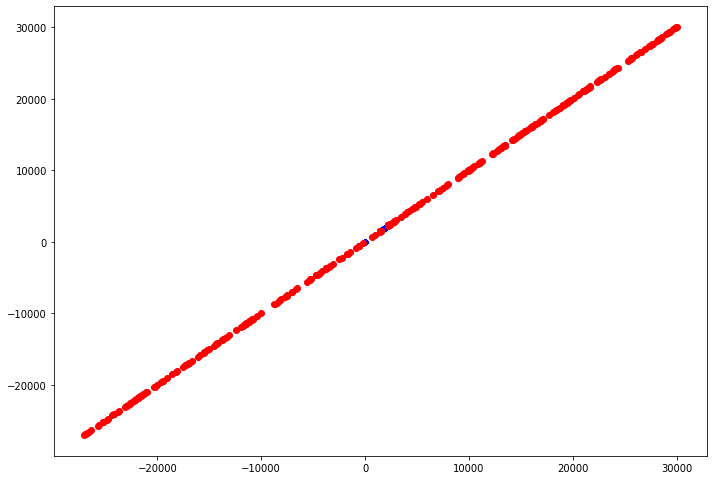

In [ ]:
# find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 200)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-loss"], outlier_values["capital-loss"], color = "r")

In [ ]:
# imputation with the mode of the capital-losses

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-loss'] = currentDirtyAdultsKNN['capital-loss'].mode()[0]

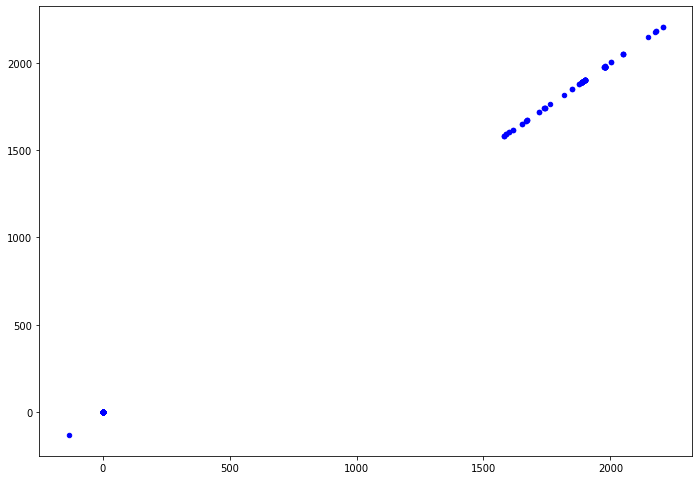

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-loss"], currentDirtyAdultsKNN["capital-loss"], color = "b", s = 20)

Capital-gain

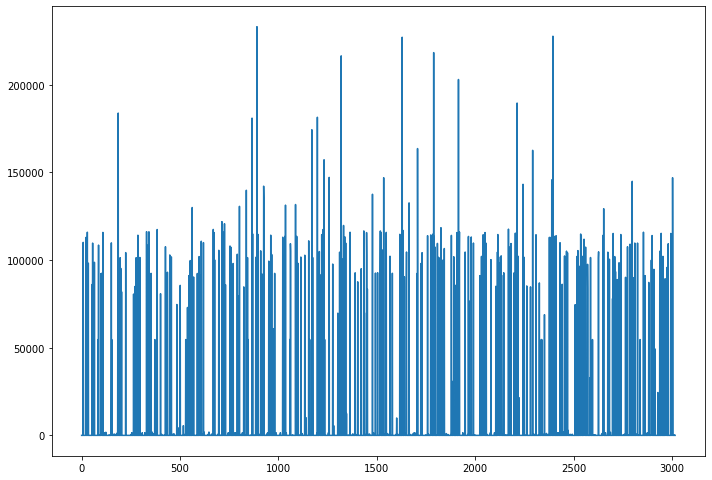

In [ ]:
Xval = currentDirtyAdultsKNN['capital-gain'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

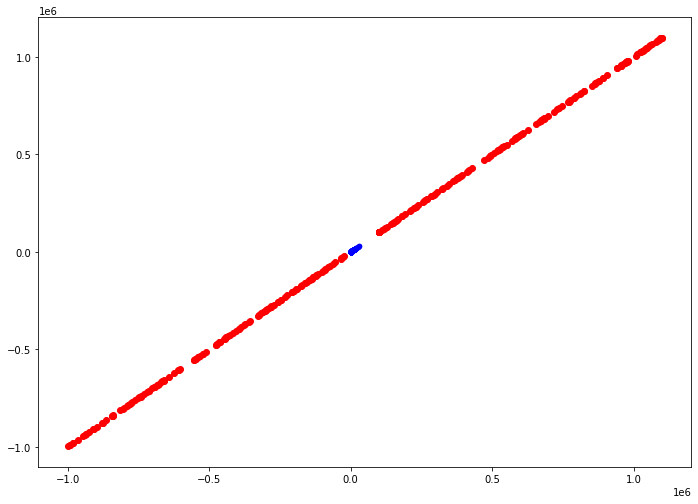

In [ ]:
#find the outliers 

outlier_index = np.where(distances.mean(axis = 1) > 13500)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["capital-gain"], outlier_values["capital-gain"], color = "r")

In [ ]:
#impute with the mode of the capital-gains

for i in outlier_index:
  currentDirtyAdultsKNN.loc[i,'capital-gain'] = currentDirtyAdultsKNN['capital-gain'].mode()[0]

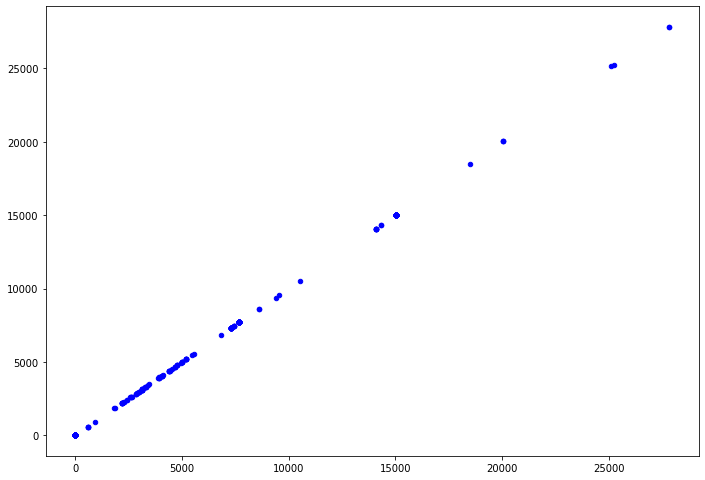

In [ ]:
plt.scatter(currentDirtyAdultsKNN["capital-gain"], currentDirtyAdultsKNN["capital-gain"], color = "b", s = 20)

Hours-per-week

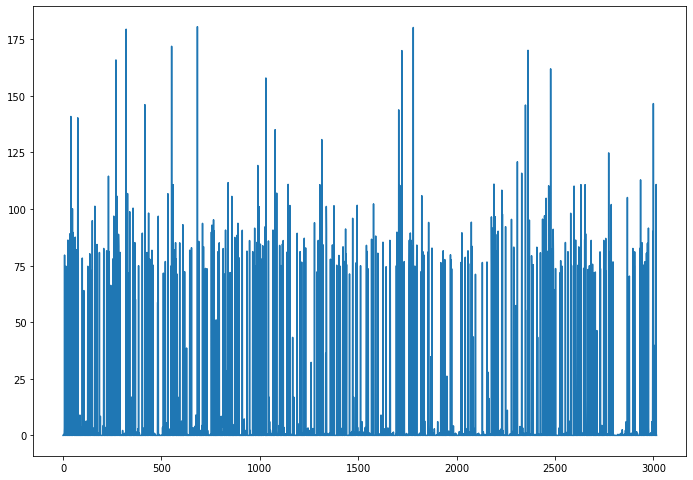

In [ ]:
Xval = currentDirtyAdultsKNN['hours-per-week'].values.reshape(-1,1)
nbrs = NearestNeighbors(n_neighbors = 60)

# fit model
nbrs.fit(Xval)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(Xval)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

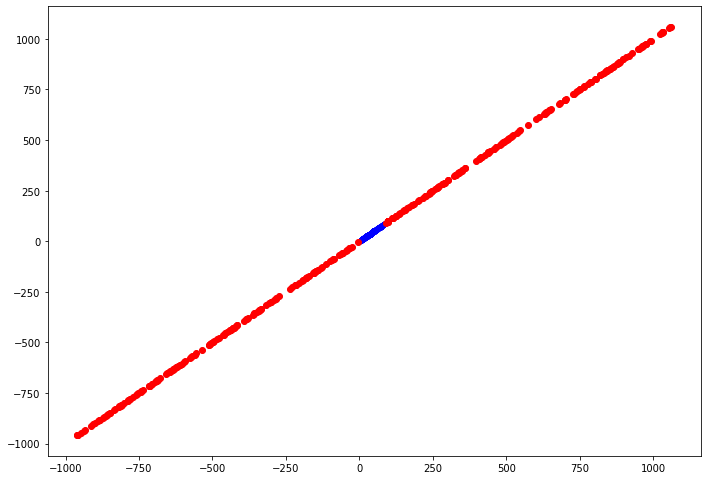

In [ ]:
#find the outliers

outlier_index = np.where(distances.mean(axis = 1) > 12)
outlier_values = currentDirtyAdultsKNN.iloc[outlier_index]

# plot data
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

# plot outlier values
plt.scatter(outlier_values["hours-per-week"], outlier_values["hours-per-week"], color = "r")

In [ ]:
# impute values for outliers

currentDirtyAdultsKNN['hours-per-week'].iloc[outlier_index] = np.NaN

dfNoString = adultsNoString(currentDirtyAdultsKNN)
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), dfNoString.columns)])
df_mice = multivariate_impute_pipe.fit_transform(dfNoString)
df_mice = pd.DataFrame(df_mice, columns=dfNoString.columns)

currentDirtyAdultsKNN["hours-per-week"] = df_mice["hours-per-week"]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


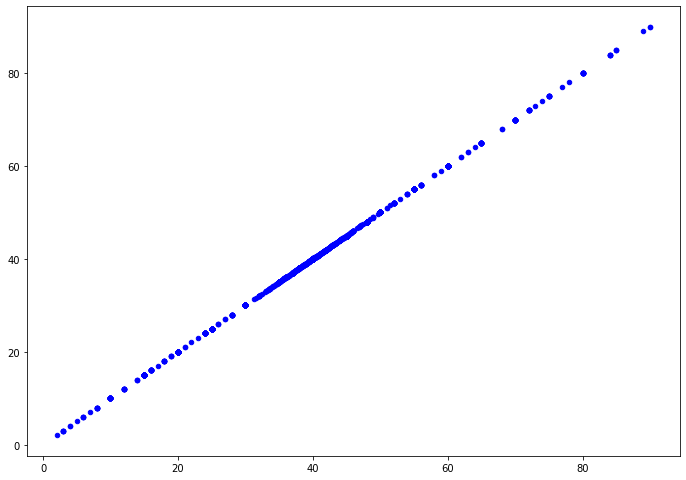

In [ ]:
plt.scatter(currentDirtyAdultsKNN["hours-per-week"], currentDirtyAdultsKNN["hours-per-week"], color = "b", s = 20)

### ML algorithm after outlier detection

Z-Score

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsZS)

In [ ]:
# evaluate ZS with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8087504143188597
Recall   : 0.42140026420079263
Precision: 0.6965065502183406
F1 score : 0.5251028806584362


In [ ]:
# evaluate ZS with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.9128273118992376
Recall   : 0.845442536327609
Precision: 0.8142493638676844
F1 score : 0.829552819183409


KNN

In [ ]:
X_train, y_train = adultsSplitML(currentDirtyAdultsKNN)

In [ ]:
# evaluate KNN with RidgeClassifier

clf1 = RidgeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf1.predict(X_test)))
print("Recall   :", recall_score(y_test, clf1.predict(X_test)))
print("Precision:", precision_score(y_test, clf1.predict(X_test)))
print("F1 score :", f1_score(y_test, clf1.predict(X_test)))

Accuracy : 0.8167053364269141
Recall   : 0.3963011889035667
Precision: 0.7575757575757576
F1 score : 0.5203816131830008


In [ ]:
# evaluate KNN with DecisionTreeClassifier

clf2 = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, clf2.predict(X_test)))
print("Recall   :", recall_score(y_test, clf2.predict(X_test)))
print("Precision:", precision_score(y_test, clf2.predict(X_test)))
print("F1 score :", f1_score(y_test, clf2.predict(X_test)))

Accuracy : 0.9638713954259198
Recall   : 0.9313077939233818
Precision: 0.9251968503937008
F1 score : 0.9282422646477947
